In [ ]:
# importing necessary lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

# Importing Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/eccentricity.csv"
df_ecc = pd.read_csv(path)
df_ecc.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.522315  2.431974  2023-05-03 20:31:39.000000  8.332031           0   
1  2.523629  2.431317  2023-05-03 20:31:39.000200  8.332031           0   
2  2.522644  2.428032  2023-05-03 20:31:39.000400  8.332031           0   
3  2.521987  2.430660  2023-05-03 20:31:39.000600  8.332031           0   
4  2.522808  2.430168  2023-05-03 20:31:39.000800  8.332031           0   

  gear_fault_desc  
0    eccentricity  
1    eccentricity  
2    eccentricity  
3    eccentricity  
4    eccentricity

In [ ]:
df_ecc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sensor1          150000 non-null  float64
 1   sensor2          150000 non-null  float64
 2   time_x           150000 non-null  object 
 3   speedSet         150000 non-null  float64
 4   load_value       150000 non-null  int64  
 5   gear_fault_desc  150000 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
df_ecc.shape

(150000, 6)

In [ ]:
# Checking for any missing values

df_ecc.isnull().sum()

sensor1            0
sensor2            0
time_x             0
speedSet           0
load_value         0
gear_fault_desc    0
dtype: int64

In [ ]:
path="/content/drive/MyDrive/missing_tooth.csv"
df_miss = pd.read_csv(path)
df_miss.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.520016  2.430496  2023-05-03 13:06:37.000000  8.332031           0   
1  2.521822  2.430660  2023-05-03 13:06:37.000200  8.332031           0   
2  2.519194  2.429511  2023-05-03 13:06:37.000400  8.332031           0   
3  2.519851  2.428853  2023-05-03 13:06:37.000600  8.332031           0   
4  2.518701  2.429346  2023-05-03 13:06:37.000800  8.332031           0   

  gear_fault_desc  
0   missing tooth  
1   missing tooth  
2   missing tooth  
3   missing tooth  
4   missing tooth

In [ ]:
df_miss.shape

(150000, 6)

In [ ]:
# Checking for any missing values
df_miss.isnull().sum()

sensor1            0
sensor2            0
time_x             0
speedSet           0
load_value         0
gear_fault_desc    0
dtype: int64

In [ ]:
path="/content/drive/MyDrive/no_fault.csv"
df_no = pd.read_csv(path)
df_no.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.523465  2.430168  2023-05-03 21:47:31.000000  8.332031           0   
1  2.521494  2.430003  2023-05-03 21:47:31.000200  8.332031           0   
2  2.522479  2.429675  2023-05-03 21:47:31.000400  8.332031           0   
3  2.521330  2.431810  2023-05-03 21:47:31.000600  8.332031           0   
4  2.522479  2.431317  2023-05-03 21:47:31.000800  8.332031           0   

  gear_fault_desc  
0        No fault  
1        No fault  
2        No fault  
3        No fault  
4        No fault

In [ ]:
df_no.shape

(150000, 6)

In [ ]:
# Checking for any missing values
df_no.isnull().sum()

sensor1            0
sensor2            0
time_x             0
speedSet           0
load_value         0
gear_fault_desc    0
dtype: int64

In [ ]:
path="/content/drive/MyDrive/root_crack.csv"
df_root = pd.read_csv(path)
df_root.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.519358  2.429675  2023-05-03 14:41:31.000000  8.332031           0   
1  2.519358  2.429839  2023-05-03 14:41:31.000200  8.332031           0   
2  2.521165  2.430496  2023-05-03 14:41:31.000400  8.332031           0   
3  2.520508  2.428853  2023-05-03 14:41:31.000600  8.332031           0   
4  2.519358  2.428689  2023-05-03 14:41:31.000800  8.332031           0   

  gear_fault_desc  
0      Root crack  
1      Root crack  
2      Root crack  
3      Root crack  
4      Root crack

In [ ]:
df_root.shape

(150000, 6)

In [ ]:
# Checking for any missing values
df_root.isnull().sum()

sensor1            0
sensor2            0
time_x             0
speedSet           0
load_value         0
gear_fault_desc    0
dtype: int64

In [ ]:
path="/content/drive/MyDrive/surface_fault.csv"
df_sur = pd.read_csv(path)
df_sur.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.521001  2.427539  2023-05-02 14:35:14.000000  8.332031           0   
1  2.519851  2.428196  2023-05-02 14:35:14.000200  8.332031           0   
2  2.520016  2.426225  2023-05-02 14:35:14.000400  8.332031           0   
3  2.520016  2.428689  2023-05-02 14:35:14.000600  8.332031           0   
4  2.521165  2.427047  2023-05-02 14:35:14.000800  8.332031           0   

  gear_fault_desc  
0  surface defect  
1  surface defect  
2  surface defect  
3  surface defect  
4  surface defect

In [ ]:
df_sur.shape

(150000, 6)

In [ ]:
# Checking for any missing values
df_sur.isnull().sum()

sensor1            0
sensor2            0
time_x             0
speedSet           0
load_value         0
gear_fault_desc    0
dtype: int64

In [ ]:
path="/content/drive/MyDrive/tooth_chipped_fault.csv"
df_tooth = pd.read_csv(path)
df_tooth.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.518209  2.430496  2023-05-02 15:53:07.000000  8.332031           0   
1  2.517880  2.429839  2023-05-02 15:53:07.000200  8.332031           0   
2  2.516402  2.427211  2023-05-02 15:53:07.000400  8.332031           0   
3  2.518537  2.427704  2023-05-02 15:53:07.000600  8.332031           0   
4  2.518701  2.427539  2023-05-02 15:53:07.000800  8.332031           0   

  gear_fault_desc  
0   chipped tooth  
1   chipped tooth  
2   chipped tooth  
3   chipped tooth  
4   chipped tooth

# Analysis for Eccentricity

In [ ]:
#Finding outliers
Q1 = df_ecc[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.25)
Q3 = df_ecc[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = (df_ecc[['sensor1', 'sensor2', 'speedSet', 'load_value']] < lower_bound) | (df_ecc[['sensor1', 'sensor2', 'speedSet', 'load_value']] > upper_bound)

# Get rows with any outliers
outliers_data_iqr = df_ecc[outliers_iqr.any(axis=1)]
print(outliers_data_iqr)


         sensor1   sensor2                      time_x  speedSet  load_value  \
50043   2.511310  2.428853  2023-05-03 20:20:00.008600      25.0           0   
50063   2.510817  2.422119  2023-05-03 20:20:00.012600      25.0           0   
50078   2.509996  2.433453  2023-05-03 20:20:00.015600      25.0           0   
50297   2.522972  2.418341  2023-05-03 20:20:00.059400      25.0           0   
50347   2.520837  2.416534  2023-05-03 20:20:00.069400      25.0           0   
...          ...       ...                         ...       ...         ...   
149994  2.502276  2.436409  2023-05-03 20:29:39.998800      40.0          80   
149995  2.525272  2.451028  2023-05-03 20:29:39.999000      40.0          80   
149996  2.529542  2.442815  2023-05-03 20:29:39.999200      40.0          80   
149997  2.519851  2.447579  2023-05-03 20:29:39.999400      40.0          80   
149999  2.517059  2.442979  2023-05-03 20:29:39.999800      40.0          80   

       gear_fault_desc  
50043     ecce

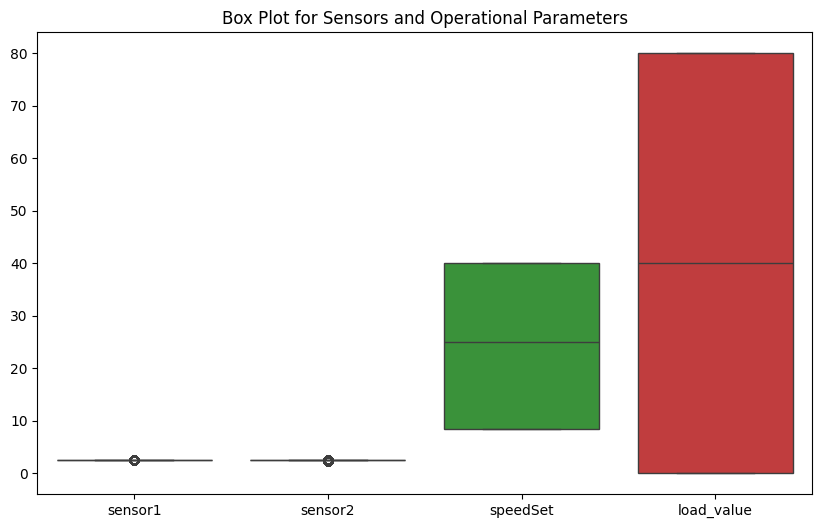

In [ ]:
# Creating box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ecc[['sensor1', 'sensor2', 'speedSet', 'load_value']])
plt.title('Box Plot for Sensors and Operational Parameters')
plt.show()


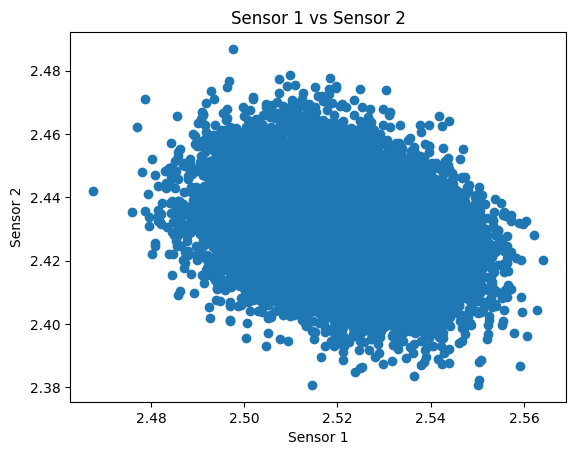

In [ ]:
# Scatter plot between sensor1 and sensor2
plt.scatter(df_ecc['sensor1'], df_ecc['sensor2'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Sensor 1 vs Sensor 2')
plt.show()


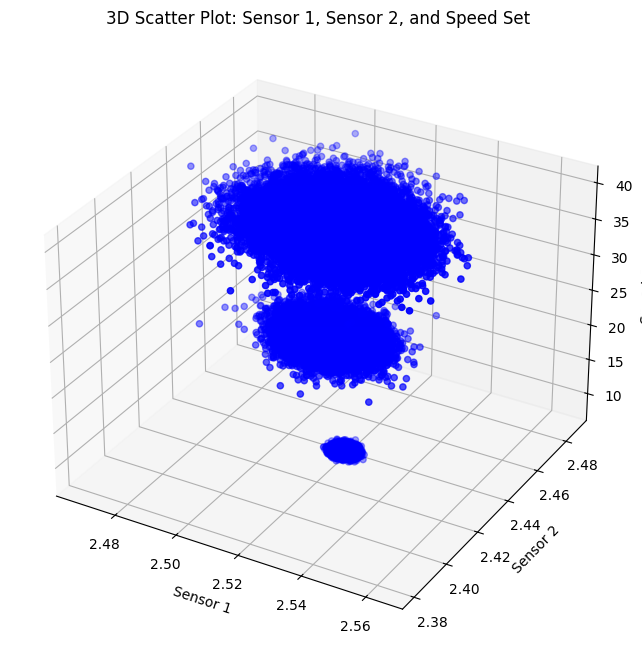

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting sensor1, sensor2, and speedSet in 3D space
ax.scatter(df_ecc['sensor1'], df_ecc['sensor2'], df_ecc['speedSet'], c='b', marker='o')
ax.set_xlabel('Sensor 1')
ax.set_ylabel('Sensor 2')
ax.set_zlabel('Speed Set')
plt.title('3D Scatter Plot: Sensor 1, Sensor 2, and Speed Set')
plt.show()


In [ ]:


# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df_ecc[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.25)
Q3 = df_ecc[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Use a larger multiplier to reduce strictness of outlier bounds
multiplier = 2.5  # This can be adjusted to 3 or other values to relax the bounds

# Define the bounds for outliers
lower_bound = Q1 - multiplier * IQR
upper_bound = Q3 + multiplier * IQR

# Check how many outliers exist for each column before removal
print("Outliers before removal (count per column):")
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    outliers_column = (df_ecc[column] < lower_bound[column]) | (df_ecc[column] > upper_bound[column])
    num_outliers_column = outliers_column.sum()
    print(f"{column}: {num_outliers_column} outliers")

# Filter the data to keep only the rows where the values are within the bounds for each column individually
cleaned_df_ecc = df_ecc.copy()

# Apply the filter column by column
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    cleaned_df_ecc = cleaned_df_ecc[(cleaned_df_ecc[column] >= lower_bound[column]) & (cleaned_df_ecc[column] <= upper_bound[column])]

# Drop rows with NaN values, which may appear if any rows are completely removed from any column
cleaned_df_ecc = cleaned_df_ecc.dropna()

# Count the number of rows removed
num_rows_removed = len(df_ecc) - len(cleaned_df_ecc)

# Count the number of outliers removed
outliers_condition = (df_ecc[['sensor1', 'sensor2', 'speedSet', 'load_value']] < lower_bound) | (df_ecc[['sensor1', 'sensor2', 'speedSet', 'load_value']] > upper_bound)
num_outliers = outliers_condition.any(axis=1).sum()

# Print the number of outliers and rows removed
print(f"\nNumber of outliers removed: {num_outliers}")
print(f"Number of rows removed: {num_rows_removed}")




Outliers before removal (count per column):
sensor1: 6078 outliers
sensor2: 4984 outliers
speedSet: 0 outliers
load_value: 0 outliers

Number of outliers removed: 9913
Number of rows removed: 9913


In [ ]:
cleaned_df_ecc.shape


(140087, 6)

In [ ]:
cleaned_df_ecc.describe()

sensor1        sensor2       speedSet     load_value
count  140087.000000  140087.000000  140087.000000  140087.000000
mean        2.521342       2.430166      23.469891      37.500125
std         0.004681       0.004997      12.771286      39.921949
min         2.506547       2.413906       8.332031       0.000000
25%         2.519194       2.427704       8.332031       0.000000
50%         2.521822       2.430825      25.000000       0.000000
75%         2.523629       2.432631      40.000000      80.000000
max         2.535948       2.446265      40.000000      80.000000

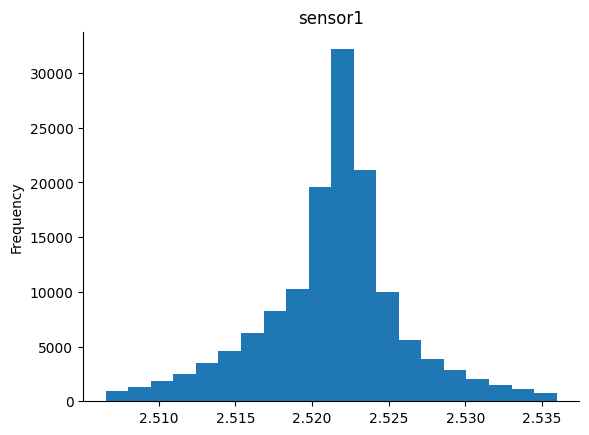

In [ ]:
cleaned_df_ecc['sensor1'].plot(kind='hist', bins=20, title='sensor1')
plt.gca().spines[['top', 'right',]].set_visible(False)

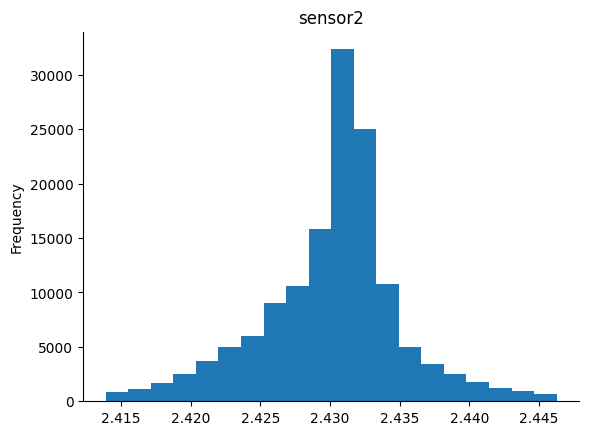

In [ ]:
cleaned_df_ecc['sensor2'].plot(kind='hist', bins=20, title='sensor2')
plt.gca().spines[['top', 'right',]].set_visible(False)

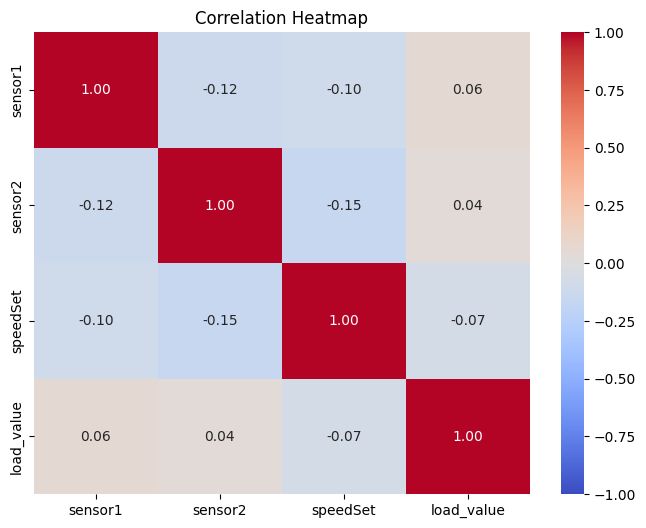

In [ ]:
# Correlation HeatMap
numerical_cols = ['sensor1', 'sensor2', 'speedSet', 'load_value']
corr_matrix = cleaned_df_ecc[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


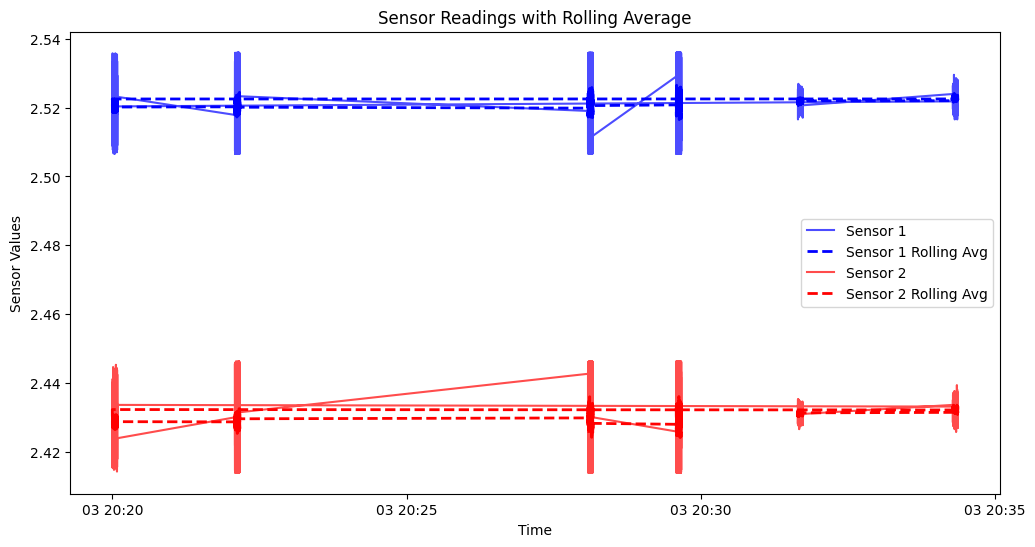

In [ ]:
# Apply rolling average to smooth the time series
# Use a window of 24 hours for rolling average (adjust as needed)
cleaned_df_ecc['sensor1_rolling_avg'] = cleaned_df_ecc['sensor1'].rolling(window=24).mean()
cleaned_df_ecc['sensor2_rolling_avg'] = cleaned_df_ecc['sensor2'].rolling(window=24).mean()

# Plot rolling average
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_ecc['sensor1'], label='Sensor 1', color='b', alpha=0.7)
plt.plot(cleaned_df_ecc['sensor1_rolling_avg'], label='Sensor 1 Rolling Avg', color='b', linestyle='--', linewidth=2)
plt.plot(cleaned_df_ecc['sensor2'], label='Sensor 2', color='r', alpha=0.7)
plt.plot(cleaned_df_ecc['sensor2_rolling_avg'], label='Sensor 2 Rolling Avg', color='r', linestyle='--', linewidth=2)
plt.title("Sensor Readings with Rolling Average")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()




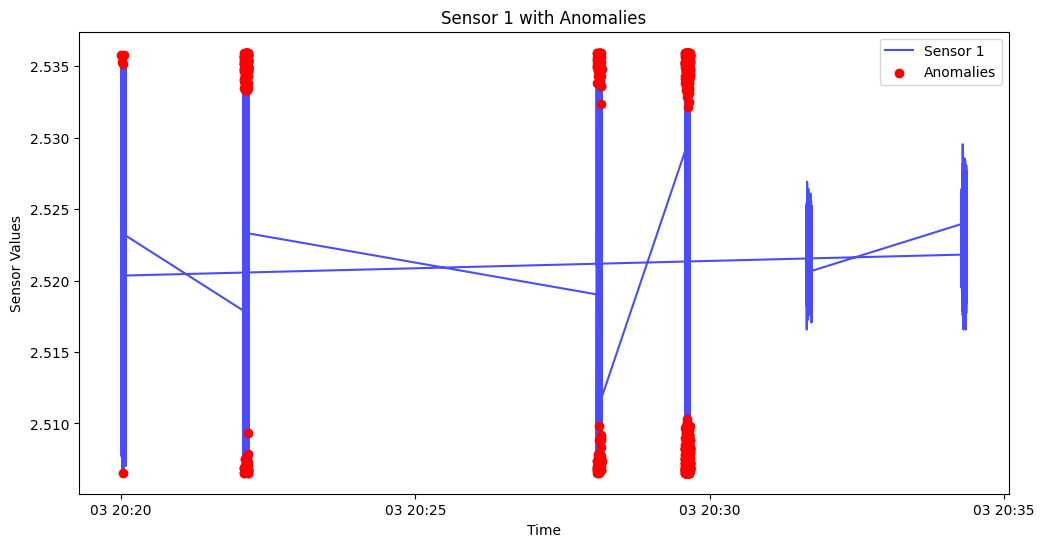

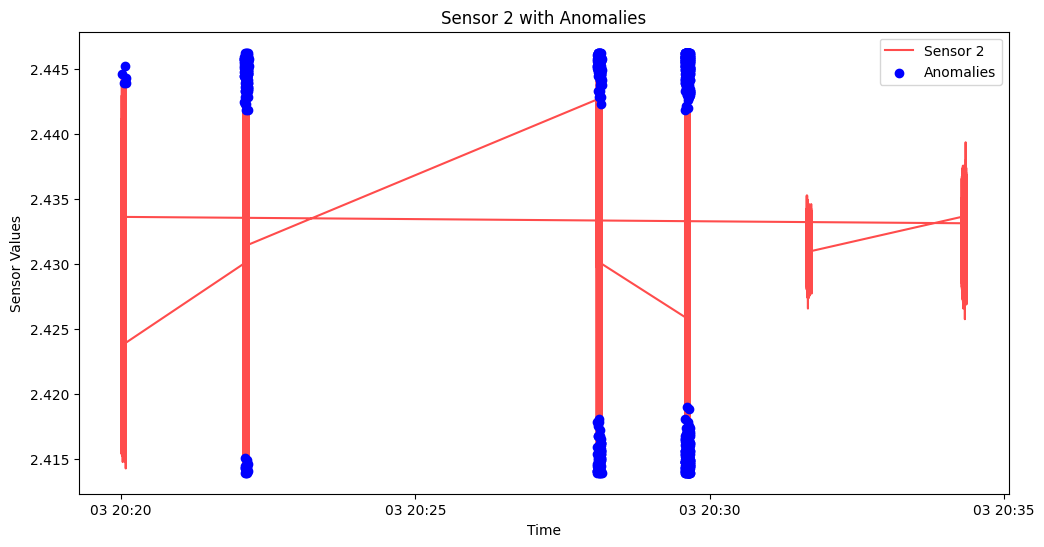

In [ ]:
#. Anomaly Detection: Look for outliers or sudden changes in the sensor data
# You can simply use a threshold-based method for anomaly detection, for example, using a rolling mean
threshold = 3  # Number of standard deviations from the mean
cleaned_df_ecc['sensor1_anomaly'] = (cleaned_df_ecc['sensor1'] - cleaned_df_ecc['sensor1'].rolling(window=24).mean()).abs() > threshold * cleaned_df_ecc['sensor1'].std()
cleaned_df_ecc['sensor2_anomaly'] = (cleaned_df_ecc['sensor2'] - cleaned_df_ecc['sensor2'].rolling(window=24).mean()).abs() > threshold * cleaned_df_ecc['sensor2'].std()

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_ecc['sensor1'], label='Sensor 1', color='b', alpha=0.7)
plt.scatter(cleaned_df_ecc.index[cleaned_df_ecc['sensor1_anomaly']], cleaned_df_ecc['sensor1'][cleaned_df_ecc['sensor1_anomaly']], color='r', label='Anomalies', zorder=5)
plt.title("Sensor 1 with Anomalies")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

# Similarly for Sensor 2
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_ecc['sensor2'], label='Sensor 2', color='r', alpha=0.7)
plt.scatter(cleaned_df_ecc.index[cleaned_df_ecc['sensor2_anomaly']], cleaned_df_ecc['sensor2'][cleaned_df_ecc['sensor2_anomaly']], color='b', label='Anomalies', zorder=5)
plt.title("Sensor 2 with Anomalies")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

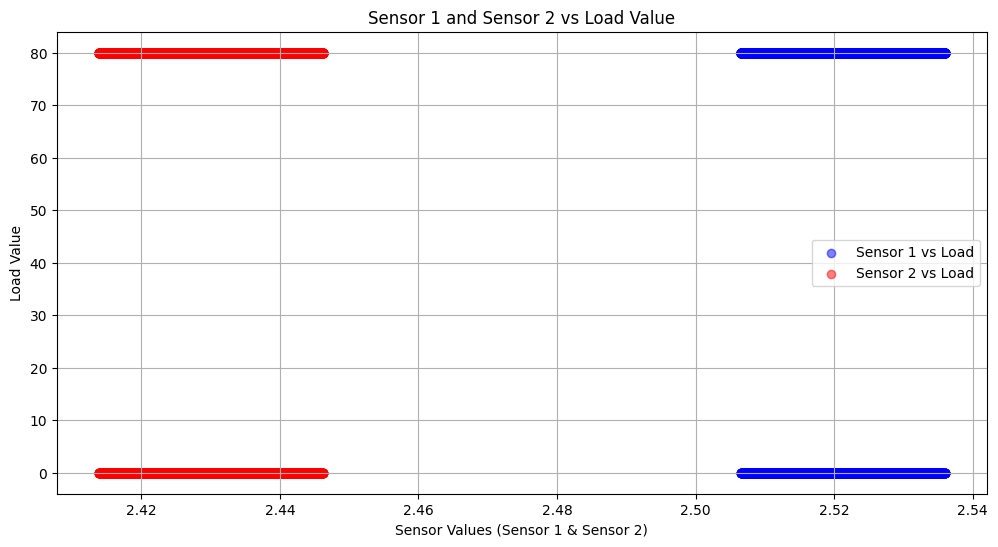

In [ ]:
# Scatter plot of sensor1 vs load_value
plt.figure(figsize=(12, 6))
plt.scatter(cleaned_df_ecc['sensor1'], cleaned_df_ecc['load_value'], color='b', alpha=0.5, label='Sensor 1 vs Load')
plt.scatter(cleaned_df_ecc['sensor2'], cleaned_df_ecc['load_value'], color='r', alpha=0.5, label='Sensor 2 vs Load')
plt.title("Sensor 1 and Sensor 2 vs Load Value")
plt.xlabel("Sensor Values (Sensor 1 & Sensor 2)")
plt.ylabel("Load Value")
plt.legend(loc='best')
plt.grid(True)
plt.show()


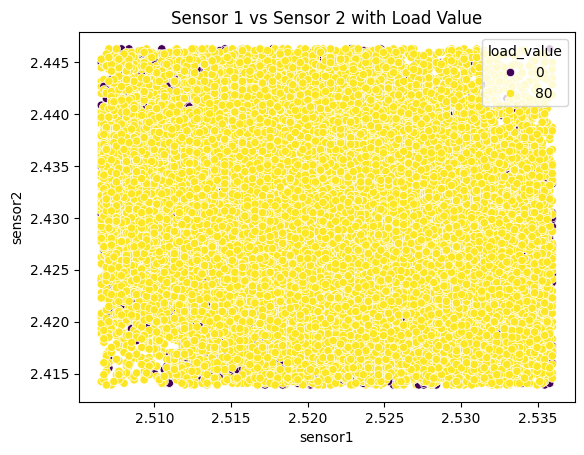

In [ ]:
sns.scatterplot(x='sensor1', y='sensor2', data=cleaned_df_ecc, hue='load_value',palette='viridis')
plt.title('Sensor 1 vs Sensor 2 with Load Value')
plt.show()


<ipython-input-62-4869c39dec5c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='load_value', data=cleaned_df_ecc, palette='viridis')


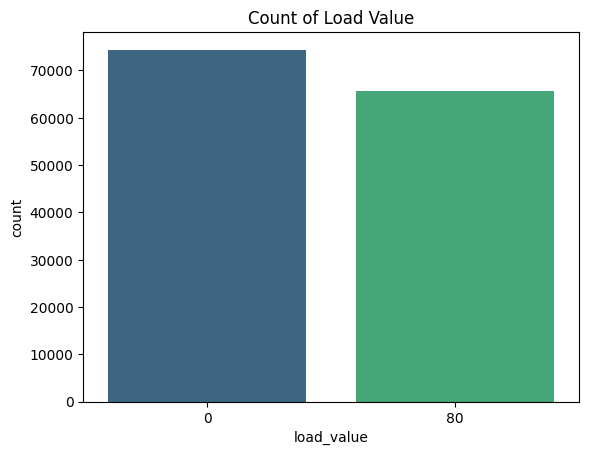

In [ ]:
sns.countplot(x='load_value', data=cleaned_df_ecc, palette='viridis')
plt.title('Count of Load Value')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


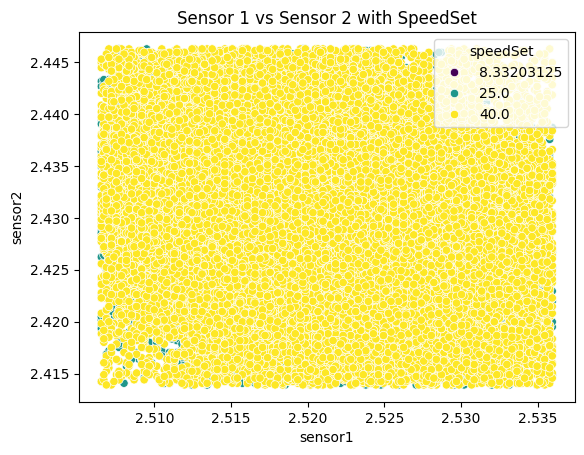

In [ ]:
sns.scatterplot(x='sensor1', y='sensor2', data=cleaned_df_ecc, hue='speedSet',palette='viridis')
plt.title('Sensor 1 vs Sensor 2 with SpeedSet')
plt.show()

<ipython-input-61-b282c626a340>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='speedSet', data=cleaned_df_ecc, palette='viridis')


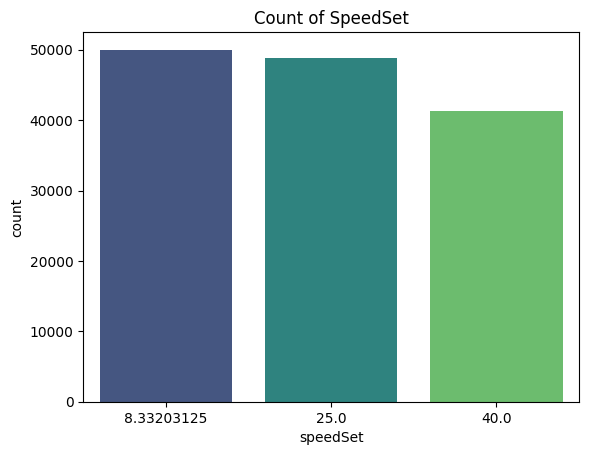

In [ ]:
sns.countplot(x='speedSet', data=cleaned_df_ecc, palette='viridis')
plt.title('Count of SpeedSet')
plt.show()

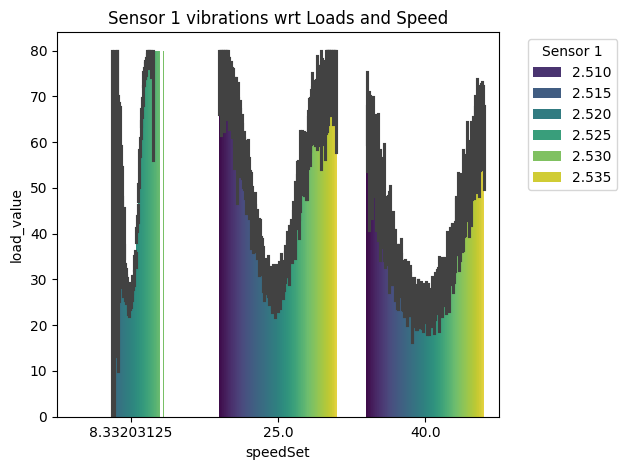

In [ ]:
sns.barplot(x='speedSet', y='load_value', data=cleaned_df_ecc, hue='sensor1', palette='viridis')
plt.title('Sensor 1 vibrations wrt Loads and Speed')
plt.legend(title='Sensor 1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

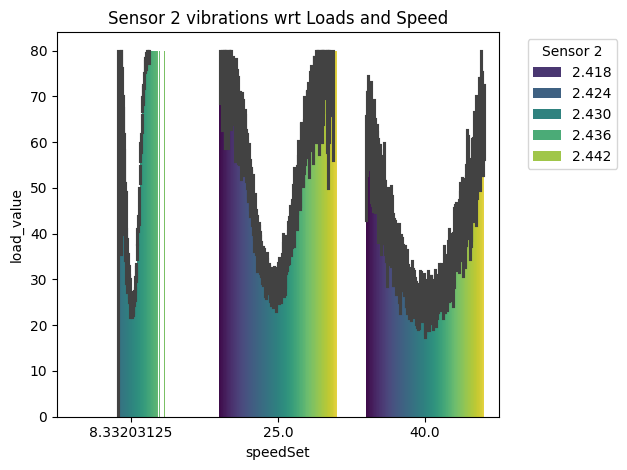

In [ ]:
sns.barplot(x='speedSet', y='load_value', data=cleaned_df_ecc, hue='sensor2', palette='viridis')
plt.title('Sensor 2 vibrations wrt Loads and Speed')
plt.legend(title='Sensor 2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Speed/Load Performance

In [ ]:


# Group by speedSet and calculate summary statistics for sensor1 and sensor2
speed_summary = cleaned_df_ecc.groupby('speedSet')[['sensor1', 'sensor2']].agg(['mean', 'median', 'std', 'min', 'max'])

# Display the summary statistics
print(speed_summary)


            sensor1                                           sensor2  \
               mean    median       std       min       max      mean   
speedSet                                                                
8.332031   2.522301  2.522151  0.001323  2.516566  2.529542  2.431682   
25.000000  2.520430  2.520344  0.004929  2.506547  2.535948  2.428749   
40.000000  2.521260  2.521330  0.006436  2.506547  2.535948  2.430004   

                                                   
             median       std       min       max  
speedSet                                           
8.332031   2.431646  0.001345  2.425733  2.439366  
25.000000  2.428689  0.004981  2.413906  2.446265  
40.000000  2.430003  0.006931  2.413906  2.446265  


In [ ]:
# Group by load_value and calculate summary statistics for sensor1 and sensor2
load_summary = cleaned_df_ecc.groupby('load_value')[['sensor1', 'sensor2']].agg(['mean', 'median', 'std', 'min', 'max'])

# Display the summary statistics
print(load_summary)


             sensor1                                           sensor2  \
                mean    median       std       min       max      mean   
load_value                                                               
0           2.521094  2.521494  0.003912  2.506547  2.535948  2.429992   
80          2.521624  2.522315  0.005410  2.506547  2.535948  2.430362   

                                                    
              median       std       min       max  
load_value                                          
0           2.430660  0.004201  2.413906  2.446265  
80          2.431317  0.005762  2.413906  2.446265  


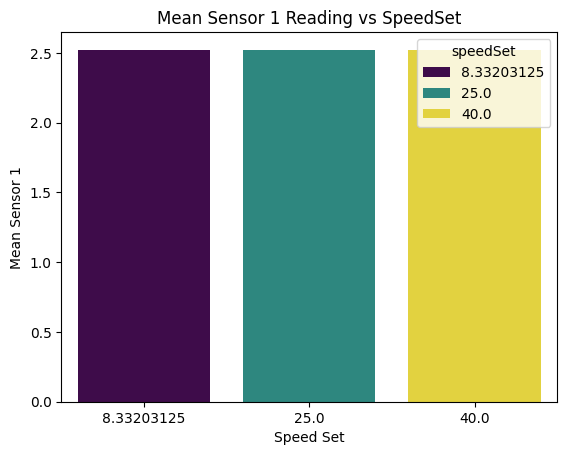

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean of sensor1 for each speedSet level
speed_mean_sensor1 = cleaned_df_ecc.groupby('speedSet')['sensor1'].mean().reset_index()

# Plot the bar chart
sns.barplot(x='speedSet', y='sensor1', data=speed_mean_sensor1,hue='speedSet', palette='viridis')

# Add labels and title
plt.title('Mean Sensor 1 Reading vs SpeedSet')
plt.xlabel('Speed Set')
plt.ylabel('Mean Sensor 1')

# Show the plot
plt.show()


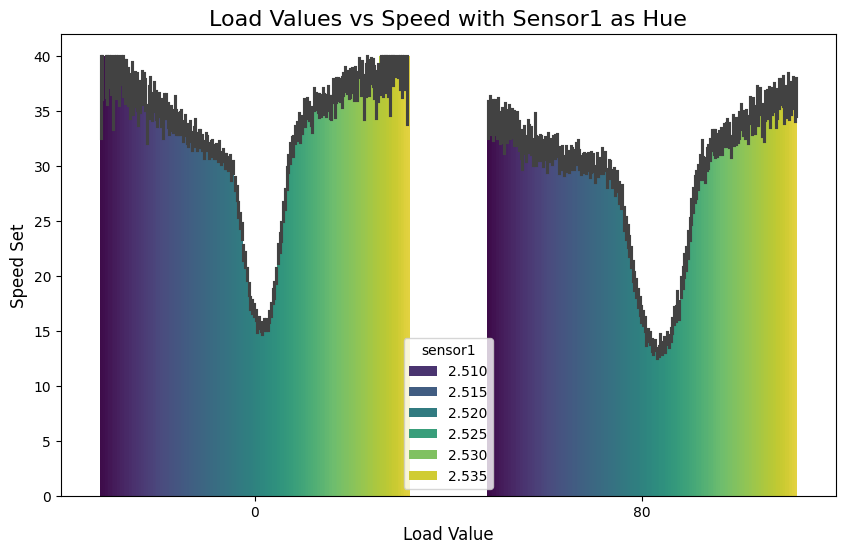

In [ ]:
# Create a bar plot with load_value on the x-axis, speedSet on the y-axis, and sensor1 as hue (color representation)
plt.figure(figsize=(10, 6))

sns.barplot(x='load_value', y='speedSet', hue='sensor1', data=cleaned_df_ecc, palette='viridis')

# Add title and labels
plt.title('Load Values vs Speed with Sensor1 as Hue', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Speed Set', fontsize=12)

# Show the plot
plt.show()


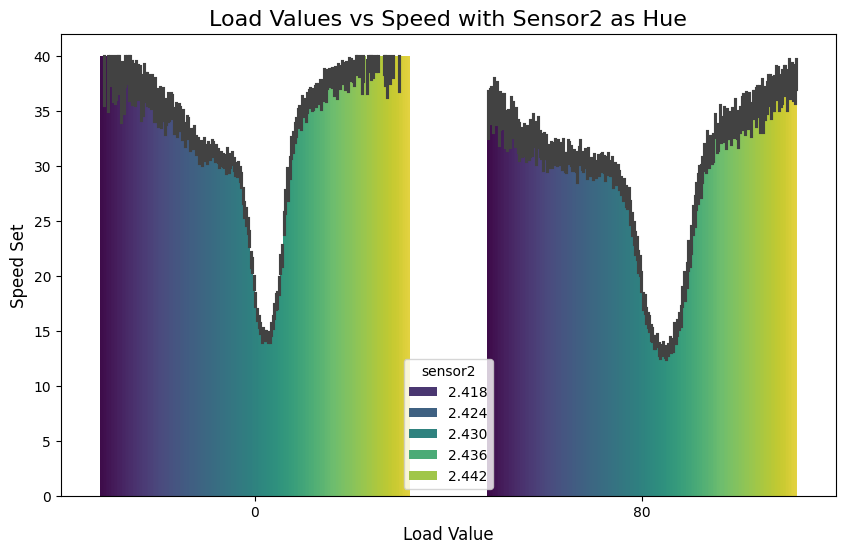

In [ ]:
# Create a bar plot with load_value on the x-axis, speedSet on the y-axis, and sensor1 as hue (color representation)
plt.figure(figsize=(10, 6))

sns.barplot(x='load_value', y='speedSet', hue='sensor2', data=cleaned_df_ecc, palette='viridis')

# Add title and labels
plt.title('Load Values vs Speed with Sensor2 as Hue', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Speed Set', fontsize=12)

# Show the plot
plt.show()

<ipython-input-84-00e6609505e0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='load_value', y='sensor1', data=eccentricity_data, palette='Set2')


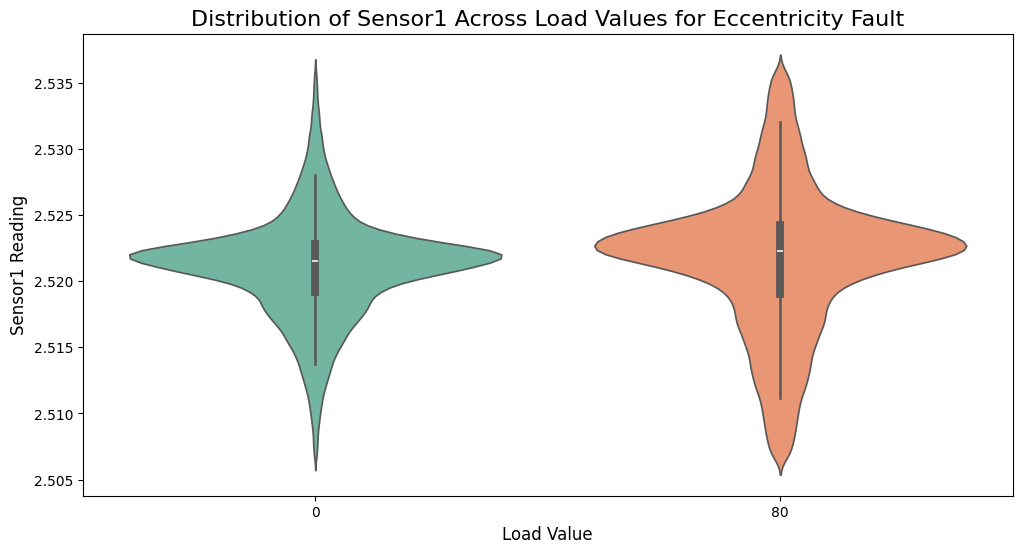

In [ ]:


# Filter the data for eccentricity fault type
eccentricity_data = cleaned_df_ecc[cleaned_df_ecc['gear_fault_desc'] == 'eccentricity']

# Violin plot for sensor1 and load_value
plt.figure(figsize=(12, 6))

# Plotting Sensor1
sns.violinplot(x='load_value', y='sensor1', data=eccentricity_data, palette='Set2')

# Add title and labels
plt.title('Distribution of Sensor1 Across Load Values for Eccentricity Fault', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Sensor1 Reading', fontsize=12)

# Show the plot
plt.show()


# Analysis for Missing Tooth

In [ ]:
df_miss.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.520016  2.430496  2023-05-03 13:06:37.000000  8.332031           0   
1  2.521822  2.430660  2023-05-03 13:06:37.000200  8.332031           0   
2  2.519194  2.429511  2023-05-03 13:06:37.000400  8.332031           0   
3  2.519851  2.428853  2023-05-03 13:06:37.000600  8.332031           0   
4  2.518701  2.429346  2023-05-03 13:06:37.000800  8.332031           0   

  gear_fault_desc  
0   missing tooth  
1   missing tooth  
2   missing tooth  
3   missing tooth  
4   missing tooth

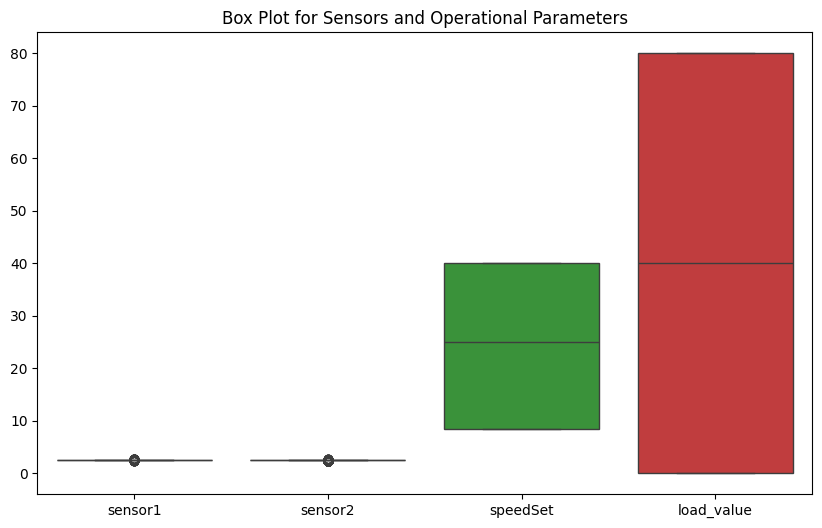

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_miss[['sensor1', 'sensor2', 'speedSet', 'load_value']])
plt.title('Box Plot for Sensors and Operational Parameters')
plt.show()

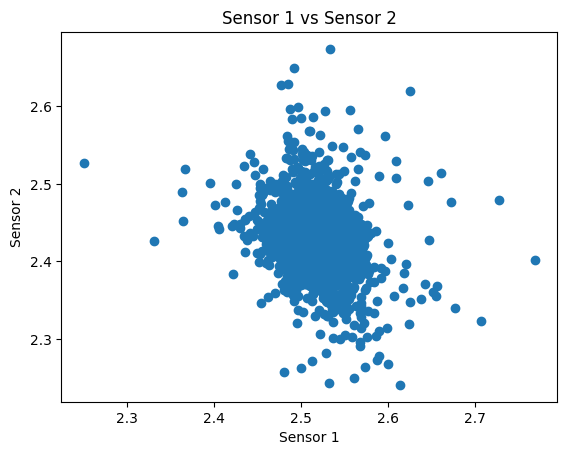

In [ ]:
# Scatter plot between sensor1 and sensor2
plt.scatter(df_miss['sensor1'], df_miss['sensor2'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Sensor 1 vs Sensor 2')
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1_miss = df_miss[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.25)
Q3_miss = df_miss[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR_miss = Q3_miss - Q1_miss

# Use a larger multiplier to reduce strictness of outlier bounds
multiplier_miss = 2.5  # This multiplier can be adjusted for stricter or relaxed outlier detection

# Define the bounds for outliers
lower_bound_miss = Q1_miss - multiplier_miss * IQR_miss
upper_bound_miss = Q3_miss + multiplier_miss * IQR_miss

# Check how many outliers exist for each column before removal
print("Outliers before removal (count per column):")
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    outliers_column_miss = (df_miss[column] < lower_bound_miss[column]) | (df_miss[column] > upper_bound_miss[column])
    num_outliers_column_miss = outliers_column_miss.sum()
    print(f"{column}: {num_outliers_column_miss} outliers")

# Filter the data to keep only the rows where the values are within the bounds for each column individually
cleaned_df_miss = df_miss.copy()

# Apply the filter column by column
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    cleaned_df_miss = cleaned_df_miss[(cleaned_df_miss[column] >= lower_bound_miss[column]) & (cleaned_df_miss[column] <= upper_bound_miss[column])]

# Drop rows with NaN values, which may appear if any rows are completely removed from any column
cleaned_df_miss = cleaned_df_miss.dropna()

# Count the number of rows removed
num_rows_removed_miss = len(df_miss) - len(cleaned_df_miss)

# Count the number of outliers removed
outliers_condition_miss = (df_miss[['sensor1', 'sensor2', 'speedSet', 'load_value']] < lower_bound_miss) | (df_miss[['sensor1', 'sensor2', 'speedSet', 'load_value']] > upper_bound_miss)
num_outliers_miss = outliers_condition_miss.any(axis=1).sum()

# Print the number of outliers and rows removed
print(f"\nNumber of outliers removed: {num_outliers_miss}")
print(f"Number of rows removed: {num_rows_removed_miss}")


Outliers before removal (count per column):
sensor1: 9361 outliers
sensor2: 9149 outliers
speedSet: 0 outliers
load_value: 0 outliers

Number of outliers removed: 16143
Number of rows removed: 16143


In [ ]:
cleaned_df_miss.shape

(133857, 6)

In [ ]:
cleaned_df_miss.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.520016  2.430496  2023-05-03 13:06:37.000000  8.332031           0   
1  2.521822  2.430660  2023-05-03 13:06:37.000200  8.332031           0   
2  2.519194  2.429511  2023-05-03 13:06:37.000400  8.332031           0   
3  2.519851  2.428853  2023-05-03 13:06:37.000600  8.332031           0   
4  2.518701  2.429346  2023-05-03 13:06:37.000800  8.332031           0   

  gear_fault_desc  
0   missing tooth  
1   missing tooth  
2   missing tooth  
3   missing tooth  
4   missing tooth

In [ ]:
cleaned_df_miss.describe()

sensor1        sensor2       speedSet     load_value
count  133857.000000  133857.000000  133857.000000  133857.000000
mean        2.519242       2.429632      22.948557      36.195044
std         0.005093       0.004833      12.730777      39.818766
min         2.503426       2.414235       8.332031       0.000000
25%         2.517059       2.427704       8.332031       0.000000
50%         2.519687       2.430168      25.000000       0.000000
75%         2.521494       2.431810      40.000000      80.000000
max         2.534799       2.444622      40.000000      80.000000

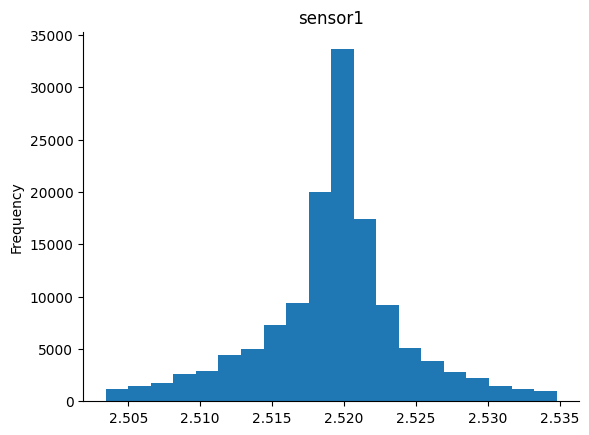

In [ ]:
cleaned_df_miss['sensor1'].plot(kind='hist', bins=20, title='sensor1')
plt.gca().spines[['top', 'right',]].set_visible(False)

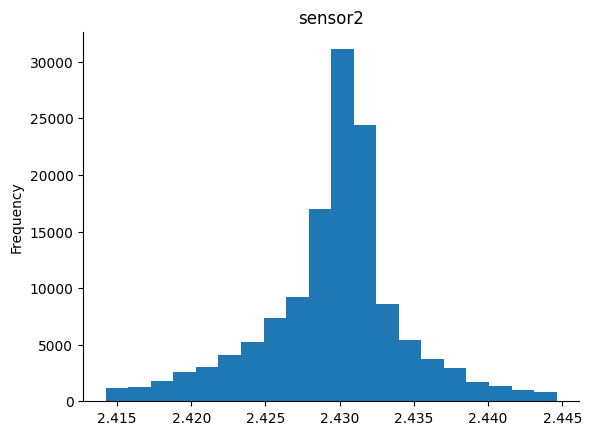

In [ ]:
cleaned_df_miss['sensor2'].plot(kind='hist', bins=20, title='sensor2')
plt.gca().spines[['top', 'right',]].set_visible(False)

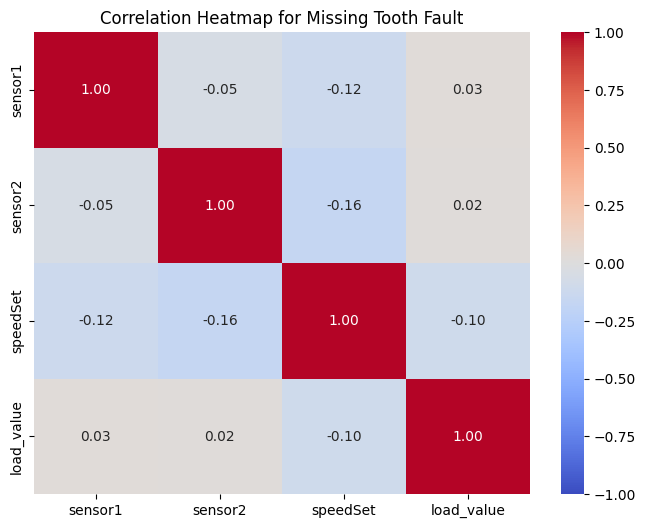

In [ ]:


# Define numerical columns to calculate the correlation matrix
numerical_cols_miss = ['sensor1', 'sensor2', 'speedSet', 'load_value']  # Adjust columns if needed

# Calculate the correlation matrix
corr_matrix_miss = cleaned_df_miss[numerical_cols_miss].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_miss, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Add title and labels
plt.title("Correlation Heatmap for Missing Tooth Fault")
plt.show()


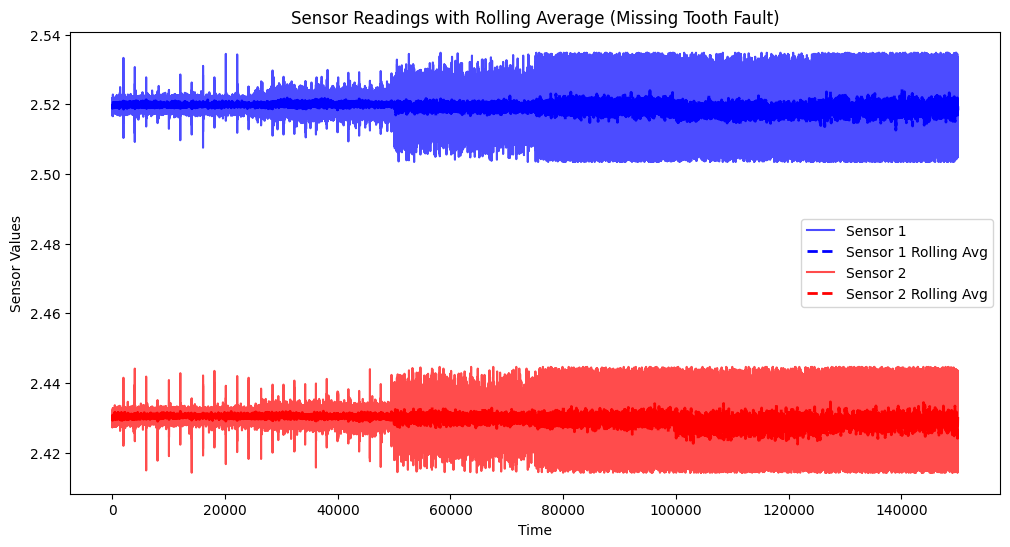

In [ ]:
# Calculate rolling averages for sensor1 and sensor2 (for Missing Tooth data)
cleaned_df_miss['sensor1_rolling_avg'] = cleaned_df_miss['sensor1'].rolling(window=24).mean()
cleaned_df_miss['sensor2_rolling_avg'] = cleaned_df_miss['sensor2'].rolling(window=24).mean()

# Plot rolling average for the Missing Tooth dataset
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_miss['sensor1'], label='Sensor 1', color='b', alpha=0.7)
plt.plot(cleaned_df_miss['sensor1_rolling_avg'], label='Sensor 1 Rolling Avg', color='b', linestyle='--', linewidth=2)
plt.plot(cleaned_df_miss['sensor2'], label='Sensor 2', color='r', alpha=0.7)
plt.plot(cleaned_df_miss['sensor2_rolling_avg'], label='Sensor 2 Rolling Avg', color='r', linestyle='--', linewidth=2)
plt.title("Sensor Readings with Rolling Average (Missing Tooth Fault)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()


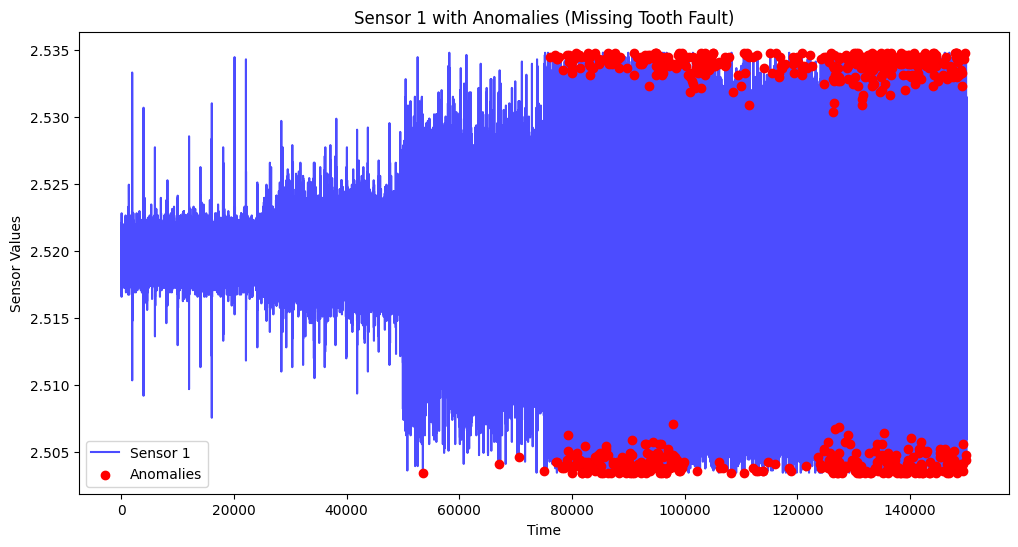

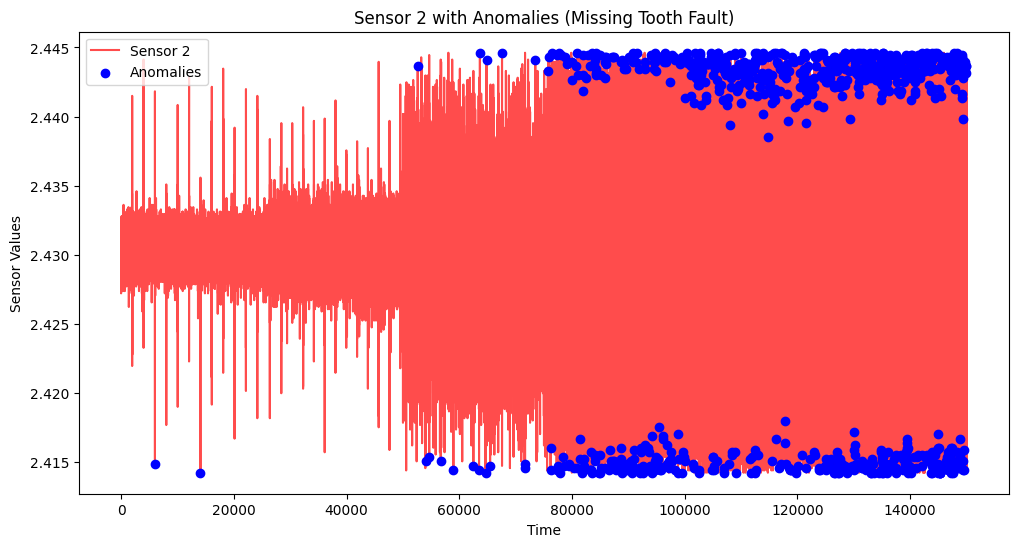

In [ ]:
threshold = 3  # Number of standard deviations from the mean

# Detect anomalies for sensor1 and sensor2 (Missing Tooth dataset)
cleaned_df_miss['sensor1_anomaly'] = (cleaned_df_miss['sensor1'] - cleaned_df_miss['sensor1'].rolling(window=24).mean()).abs() > threshold * cleaned_df_miss['sensor1'].std()
cleaned_df_miss['sensor2_anomaly'] = (cleaned_df_miss['sensor2'] - cleaned_df_miss['sensor2'].rolling(window=24).mean()).abs() > threshold * cleaned_df_miss['sensor2'].std()

# Plot anomalies for Sensor 1 (Missing Tooth Fault)
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_miss['sensor1'], label='Sensor 1', color='b', alpha=0.7)
plt.scatter(cleaned_df_miss.index[cleaned_df_miss['sensor1_anomaly']], cleaned_df_miss['sensor1'][cleaned_df_miss['sensor1_anomaly']], color='r', label='Anomalies', zorder=5)
plt.title("Sensor 1 with Anomalies (Missing Tooth Fault)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

# Similarly for Sensor 2 (Missing Tooth Fault)
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_miss['sensor2'], label='Sensor 2', color='r', alpha=0.7)
plt.scatter(cleaned_df_miss.index[cleaned_df_miss['sensor2_anomaly']], cleaned_df_miss['sensor2'][cleaned_df_miss['sensor2_anomaly']], color='b', label='Anomalies', zorder=5)
plt.title("Sensor 2 with Anomalies (Missing Tooth Fault)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()


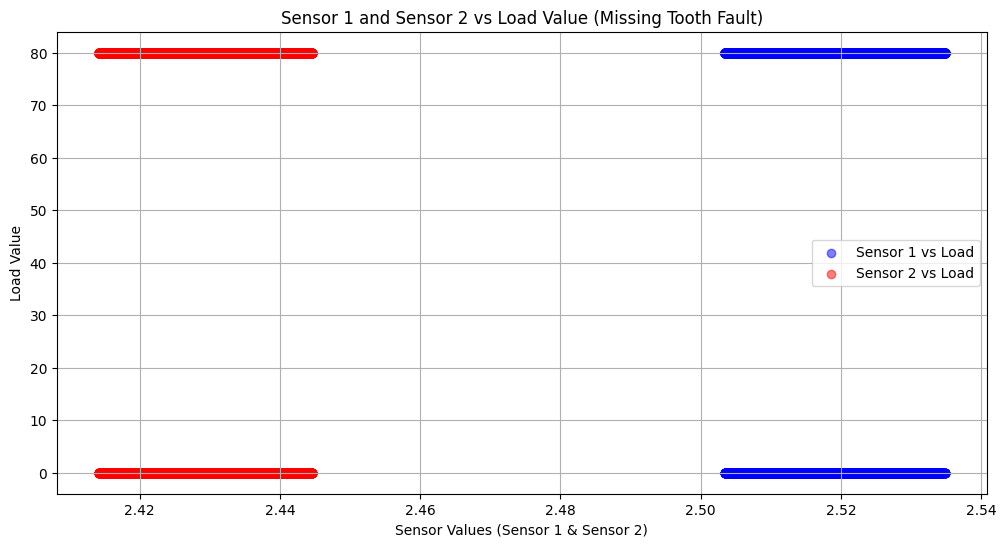

In [ ]:
# Scatter plot of sensor1 vs load_value for Missing Tooth dataset
plt.figure(figsize=(12, 6))
plt.scatter(cleaned_df_miss['sensor1'], cleaned_df_miss['load_value'], color='b', alpha=0.5, label='Sensor 1 vs Load')
plt.scatter(cleaned_df_miss['sensor2'], cleaned_df_miss['load_value'], color='r', alpha=0.5, label='Sensor 2 vs Load')
plt.title("Sensor 1 and Sensor 2 vs Load Value (Missing Tooth Fault)")
plt.xlabel("Sensor Values (Sensor 1 & Sensor 2)")
plt.ylabel("Load Value")
plt.legend(loc='best')
plt.grid(True)
plt.show()


<ipython-input-113-145ff4388367>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='load_value', data=cleaned_df_miss, palette='viridis')


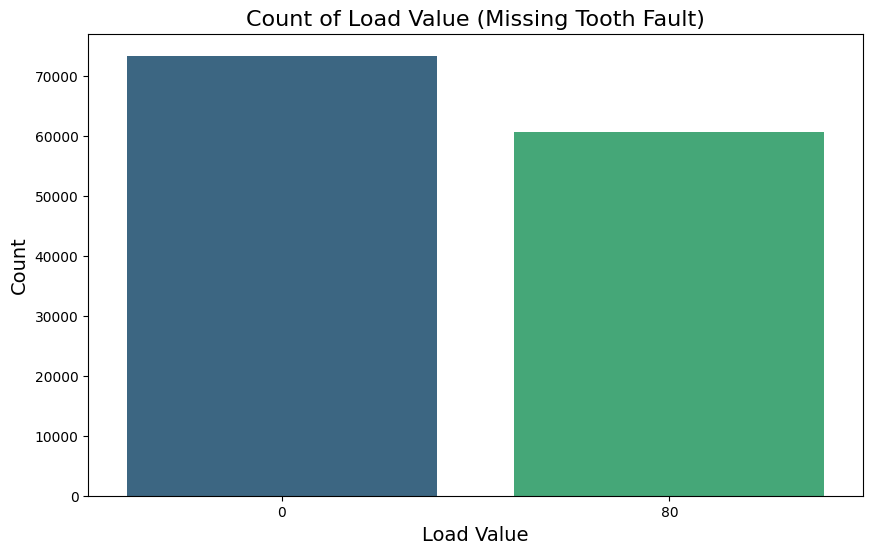

In [ ]:


# Create the count plot for load_value in Missing Tooth data
plt.figure(figsize=(10, 6))
sns.countplot(x='load_value', data=cleaned_df_miss, palette='viridis')

# Add title and labels
plt.title('Count of Load Value (Missing Tooth Fault)', fontsize=16)
plt.xlabel('Load Value', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()


<ipython-input-114-3f7aa8c56af3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='speedSet', data=cleaned_df_miss, palette='viridis')


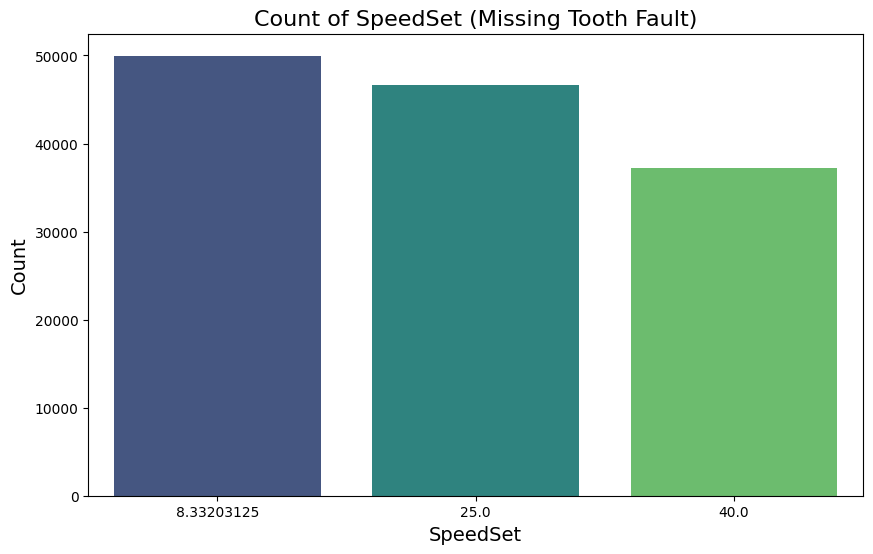

In [ ]:


# Create the count plot for speedSet in Missing Tooth data
plt.figure(figsize=(10, 6))
sns.countplot(x='speedSet', data=cleaned_df_miss, palette='viridis')

# Add title and labels
plt.title('Count of SpeedSet (Missing Tooth Fault)', fontsize=16)
plt.xlabel('SpeedSet', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()


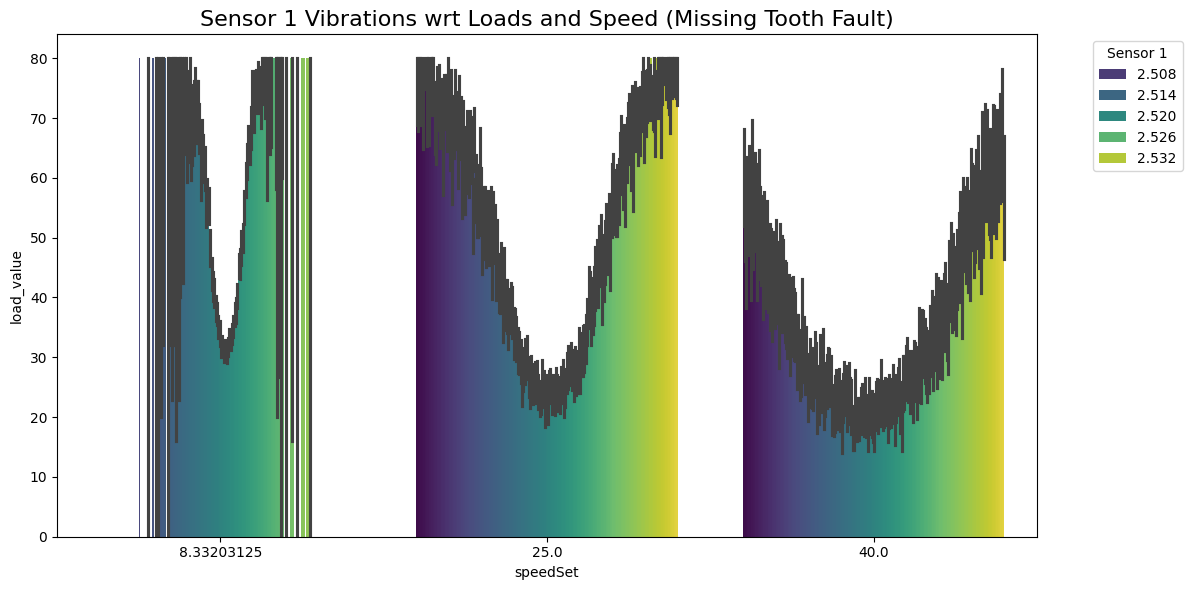

In [ ]:


# Create the bar plot for Missing Tooth dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='speedSet', y='load_value', data=cleaned_df_miss, hue='sensor1', palette='viridis')

# Add title and format the legend
plt.title('Sensor 1 Vibrations wrt Loads and Speed (Missing Tooth Fault)', fontsize=16)
plt.legend(title='Sensor 1', bbox_to_anchor=(1.05, 1), loc='upper left')

# Make sure everything fits in the plot area
plt.tight_layout()

# Show the plot
plt.show()


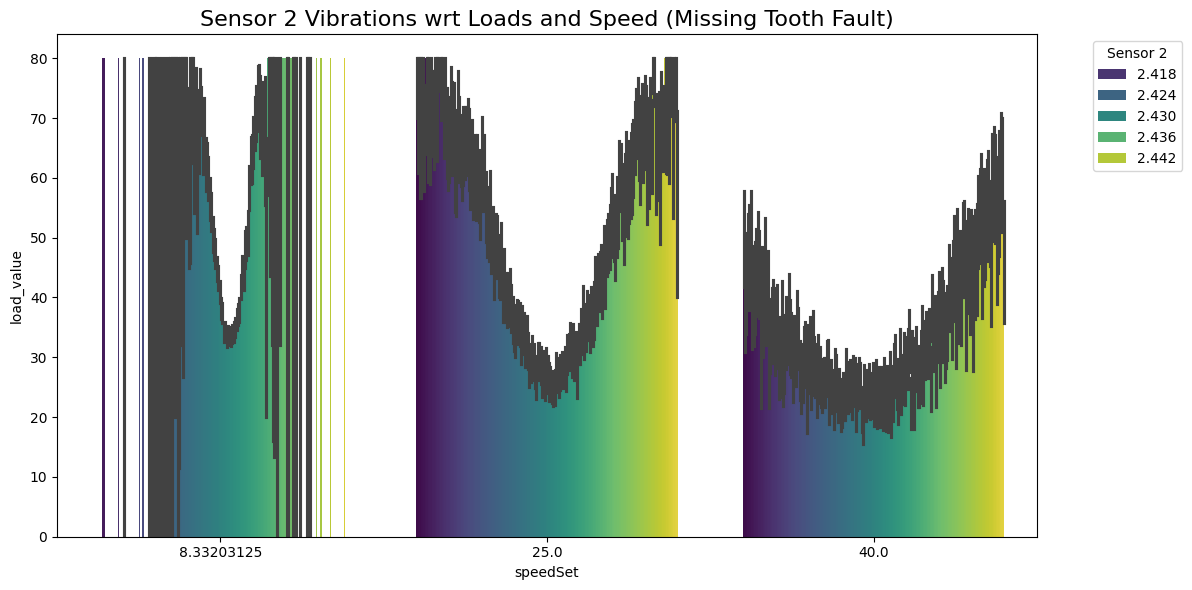

In [ ]:


# Create the bar plot for Missing Tooth dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='speedSet', y='load_value', data=cleaned_df_miss, hue='sensor2', palette='viridis')

# Add title and format the legend
plt.title('Sensor 2 Vibrations wrt Loads and Speed (Missing Tooth Fault)', fontsize=16)
plt.legend(title='Sensor 2', bbox_to_anchor=(1.05, 1), loc='upper left')

# Make sure everything fits in the plot area
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Group by speedSet and calculate summary statistics for sensor1 and sensor2 in the Missing Tooth dataset
speed_summary_miss = cleaned_df_miss.groupby('speedSet')[['sensor1', 'sensor2']].agg(['mean', 'median', 'std', 'min', 'max'])

# Display the summary statistics for Missing Tooth dataset
print(speed_summary_miss)


            sensor1                                           sensor2  \
               mean    median       std       min       max      mean   
speedSet                                                                
8.332031   2.519929  2.519851  0.001516  2.507532  2.534470  2.430455   
25.000000  2.519194  2.519194  0.005695  2.503426  2.534799  2.429703   
40.000000  2.518381  2.518209  0.006940  2.503426  2.534799  2.428437   

                                                   
             median       std       min       max  
speedSet                                           
8.332031   2.430496  0.001364  2.414235  2.444129  
25.000000  2.429839  0.005079  2.414235  2.444622  
40.000000  2.428196  0.006844  2.414235  2.444622  


In [ ]:
# Group by load_value and calculate summary statistics for sensor1 and sensor2 in Missing Tooth dataset
load_summary_miss = cleaned_df_miss.groupby('load_value')[['sensor1', 'sensor2']].agg(['mean', 'median', 'std', 'min', 'max'])

# Display the summary statistics for Missing Tooth
print(load_summary_miss)


             sensor1                                           sensor2  \
                mean    median       std       min       max      mean   
load_value                                                               
0           2.519105  2.519523  0.004216  2.503426  2.534799  2.429536   
80          2.519409  2.519851  0.005981  2.503426  2.534799  2.429748   

                                                    
              median       std       min       max  
load_value                                          
0           2.430168  0.004344  2.414235  2.444622  
80          2.430168  0.005364  2.414235  2.444622  


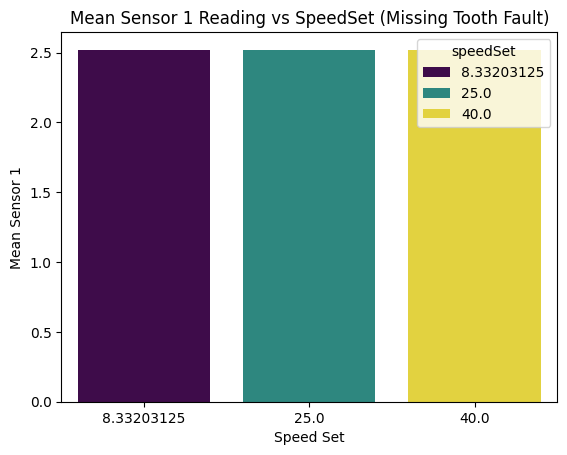

In [ ]:


# Calculate the mean of sensor1 for each speedSet level in Missing Tooth dataset
speed_mean_sensor1_miss = cleaned_df_miss.groupby('speedSet')['sensor1'].mean().reset_index()

# Plot the bar chart for Missing Tooth dataset
sns.barplot(x='speedSet', y='sensor1', data=speed_mean_sensor1_miss, hue='speedSet', palette='viridis')

# Add labels and title
plt.title('Mean Sensor 1 Reading vs SpeedSet (Missing Tooth Fault)')
plt.xlabel('Speed Set')
plt.ylabel('Mean Sensor 1')

# Show the plot
plt.show()


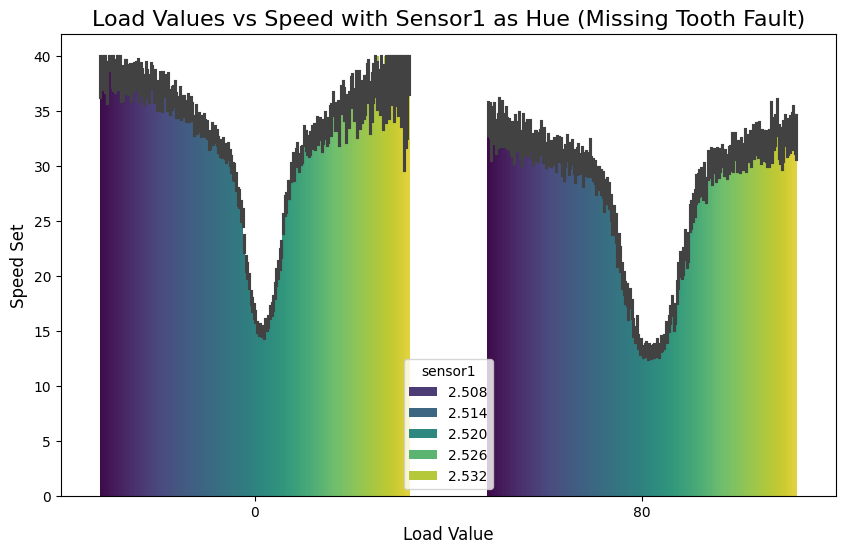

In [ ]:


# Create a bar plot with load_value on the x-axis, speedSet on the y-axis, and sensor1 as hue (color representation)
plt.figure(figsize=(10, 6))

# Plotting for the Missing Tooth dataset
sns.barplot(x='load_value', y='speedSet', hue='sensor1', data=cleaned_df_miss, palette='viridis')

# Add title and labels
plt.title('Load Values vs Speed with Sensor1 as Hue (Missing Tooth Fault)', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Speed Set', fontsize=12)

# Show the plot
plt.show()


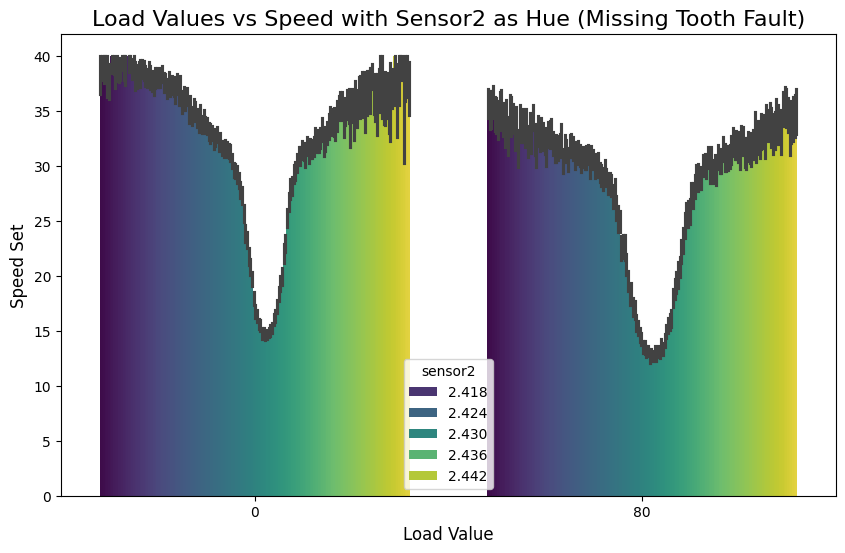

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot with load_value on the x-axis, speedSet on the y-axis, and sensor2 as hue (color representation)
plt.figure(figsize=(10, 6))

# Plotting for the Missing Tooth dataset
sns.barplot(x='load_value', y='speedSet', hue='sensor2', data=cleaned_df_miss, palette='viridis')

# Add title and labels
plt.title('Load Values vs Speed with Sensor2 as Hue (Missing Tooth Fault)', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Speed Set', fontsize=12)

# Show the plot
plt.show()


<ipython-input-122-93de4e36d9df>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='load_value', y='sensor1', data=missing_tooth_data, palette='Set2')


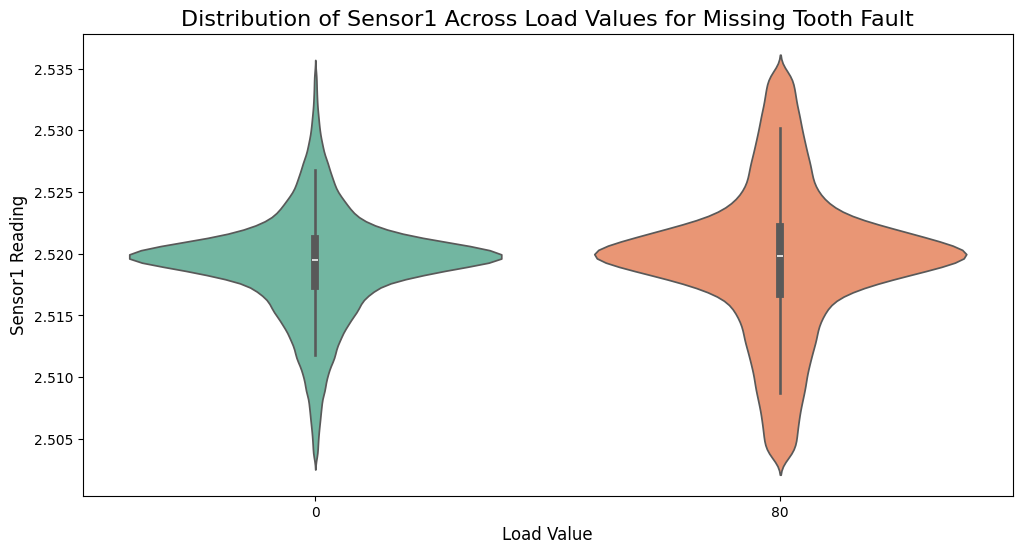

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for missing tooth fault type
missing_tooth_data = cleaned_df_miss[cleaned_df_miss['gear_fault_desc'] == 'missing tooth']

# Violin plot for sensor1 and load_value
plt.figure(figsize=(12, 6))

# Plotting Sensor1
sns.violinplot(x='load_value', y='sensor1', data=missing_tooth_data, palette='Set2')

# Add title and labels
plt.title('Distribution of Sensor1 Across Load Values for Missing Tooth Fault', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Sensor1 Reading', fontsize=12)

# Show the plot
plt.show()


# No Fault Analysis

In [ ]:
df_no.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.523465  2.430168  2023-05-03 21:47:31.000000  8.332031           0   
1  2.521494  2.430003  2023-05-03 21:47:31.000200  8.332031           0   
2  2.522479  2.429675  2023-05-03 21:47:31.000400  8.332031           0   
3  2.521330  2.431810  2023-05-03 21:47:31.000600  8.332031           0   
4  2.522479  2.431317  2023-05-03 21:47:31.000800  8.332031           0   

  gear_fault_desc  
0        No fault  
1        No fault  
2        No fault  
3        No fault  
4        No fault

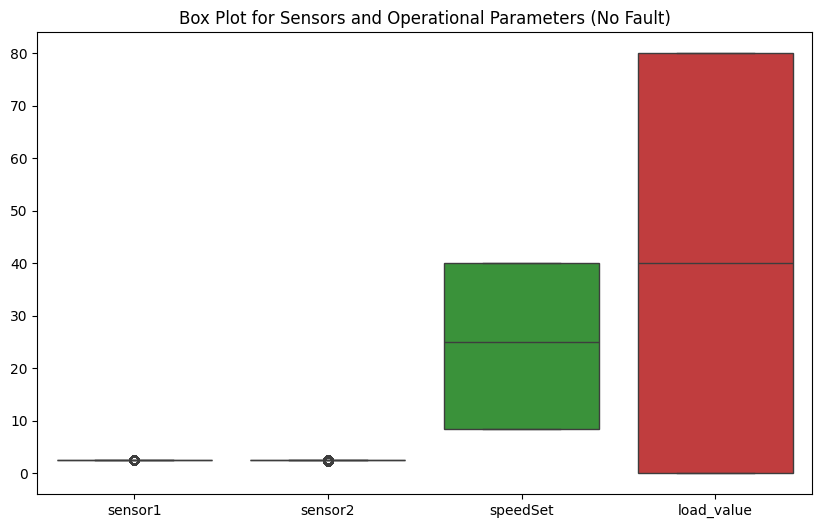

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for Sensors and Operational Parameters (No Fault)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no[['sensor1', 'sensor2', 'speedSet', 'load_value']])
plt.title('Box Plot for Sensors and Operational Parameters (No Fault)')
plt.show()


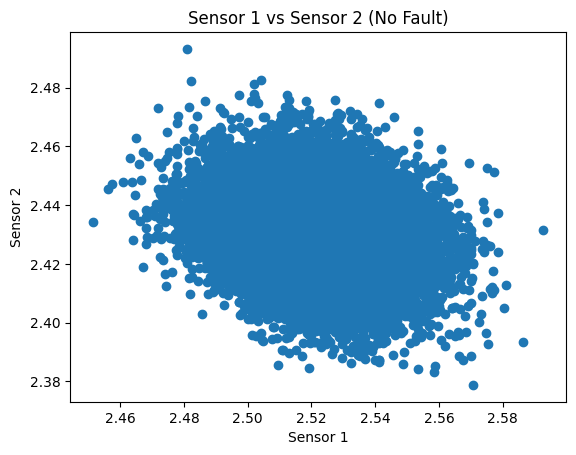

In [ ]:
# Scatter plot between sensor1 and sensor2
plt.scatter(df_no['sensor1'], df_no['sensor2'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Sensor 1 vs Sensor 2 (No Fault)')
plt.show()


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1_no = df_no[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.25)
Q3_no = df_no[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR_no = Q3_no - Q1_no

# Define the bounds for outliers using a multiplier
multiplier_no = 2.5  # Adjust multiplier for strictness of outlier detection
lower_bound_no = Q1_no - multiplier_no * IQR_no
upper_bound_no = Q3_no + multiplier_no * IQR_no

# Check how many outliers exist for each column before removal
print("Outliers before removal (count per column):")
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    outliers_column_no = (df_no[column] < lower_bound_no[column]) | (df_no[column] > upper_bound_no[column])
    num_outliers_column_no = outliers_column_no.sum()
    print(f"{column}: {num_outliers_column_no} outliers")

# Filter the data to remove outliers
cleaned_df_no = df_no.copy()

# Apply the filter column by column
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    cleaned_df_no = cleaned_df_no[(cleaned_df_no[column] >= lower_bound_no[column]) & (cleaned_df_no[column] <= upper_bound_no[column])]

# Drop rows with NaN values
cleaned_df_no = cleaned_df_no.dropna()

# Count the number of rows removed
num_rows_removed_no = len(df_no) - len(cleaned_df_no)

# Count the number of outliers removed
outliers_condition_no = (df_no[['sensor1', 'sensor2', 'speedSet', 'load_value']] < lower_bound_no) | (df_no[['sensor1', 'sensor2', 'speedSet', 'load_value']] > upper_bound_no)
num_outliers_no = outliers_condition_no.any(axis=1).sum()

# Print the number of outliers and rows removed
print(f"\nNumber of outliers removed: {num_outliers_no}")
print(f"Number of rows removed: {num_rows_removed_no}")


Outliers before removal (count per column):
sensor1: 7095 outliers
sensor2: 6690 outliers
speedSet: 0 outliers
load_value: 0 outliers

Number of outliers removed: 12366
Number of rows removed: 12366


In [ ]:
cleaned_df_no.describe()

sensor1        sensor2       speedSet     load_value
count  137634.000000  137634.000000  137634.000000  137634.000000
mean        2.520332       2.429652      23.277835      36.961216
std         0.005601       0.005056      12.765503      39.884550
min         2.502440       2.413742       8.332031       0.000000
25%         2.517552       2.427047       8.332031       0.000000
50%         2.520837       2.430003      25.000000       0.000000
75%         2.522808       2.431810      40.000000      80.000000
max         2.537755       2.445115      40.000000      80.000000

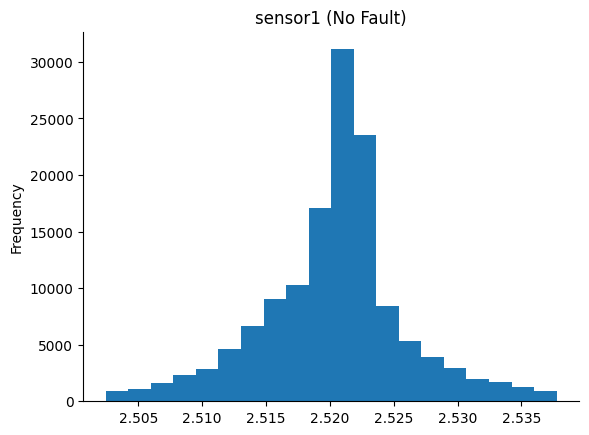

In [ ]:
# Histogram for sensor1
cleaned_df_no['sensor1'].plot(kind='hist', bins=20, title='sensor1 (No Fault)')
plt.gca().spines[['top', 'right']].set_visible(False)


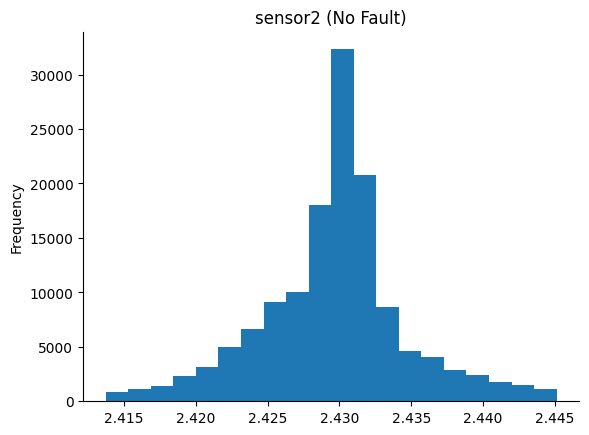

In [ ]:
# Histogram for sensor2
cleaned_df_no['sensor2'].plot(kind='hist', bins=20, title='sensor2 (No Fault)')
plt.gca().spines[['top', 'right']].set_visible(False)


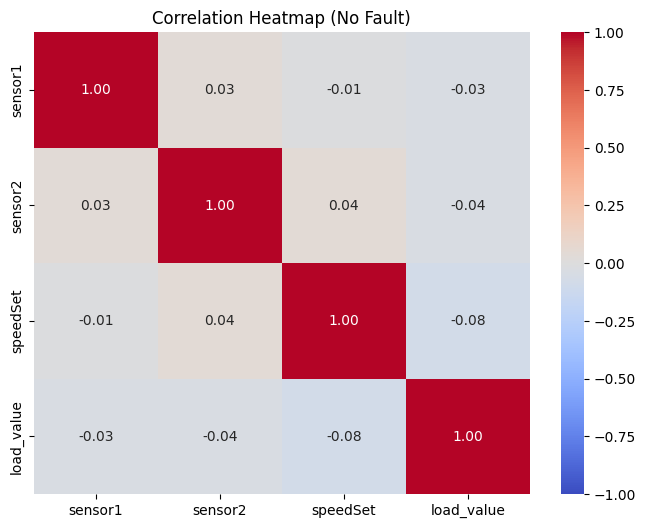

In [ ]:
# Correlation matrix for No Fault dataset
numerical_cols_no = ['sensor1', 'sensor2', 'speedSet', 'load_value']
corr_matrix_no = cleaned_df_no[numerical_cols_no].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_no, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (No Fault)")
plt.show()


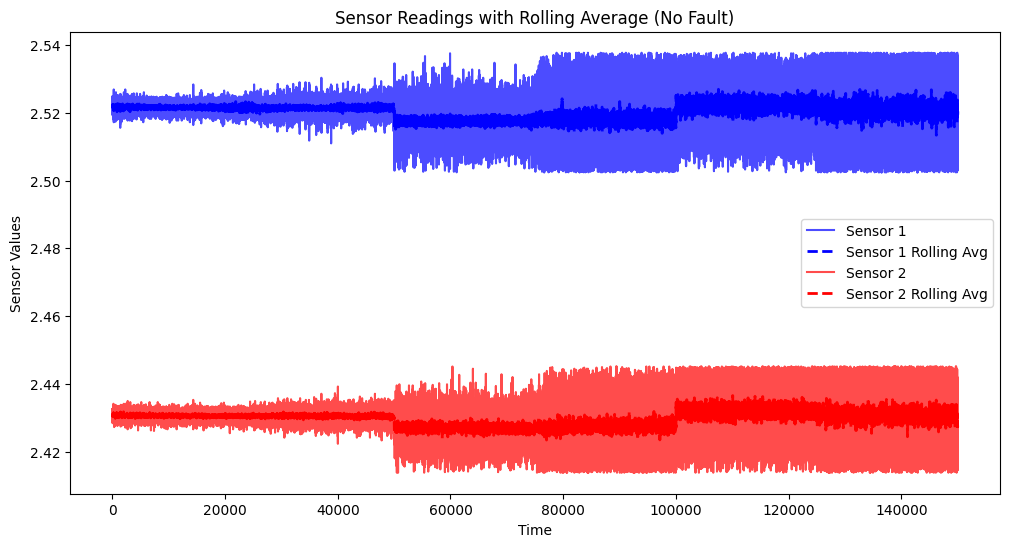

In [ ]:
# Rolling average for sensor1 and sensor2 (for No Fault data)
cleaned_df_no['sensor1_rolling_avg'] = cleaned_df_no['sensor1'].rolling(window=24).mean()
cleaned_df_no['sensor2_rolling_avg'] = cleaned_df_no['sensor2'].rolling(window=24).mean()

# Plot rolling averages
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_no['sensor1'], label='Sensor 1', color='b', alpha=0.7)
plt.plot(cleaned_df_no['sensor1_rolling_avg'], label='Sensor 1 Rolling Avg', color='b', linestyle='--', linewidth=2)
plt.plot(cleaned_df_no['sensor2'], label='Sensor 2', color='r', alpha=0.7)
plt.plot(cleaned_df_no['sensor2_rolling_avg'], label='Sensor 2 Rolling Avg', color='r', linestyle='--', linewidth=2)
plt.title("Sensor Readings with Rolling Average (No Fault)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()


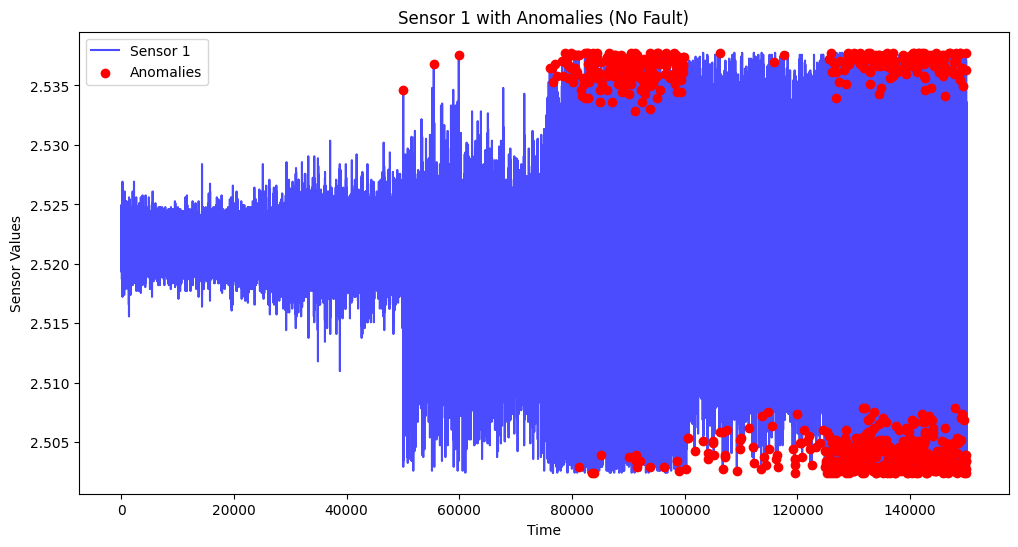

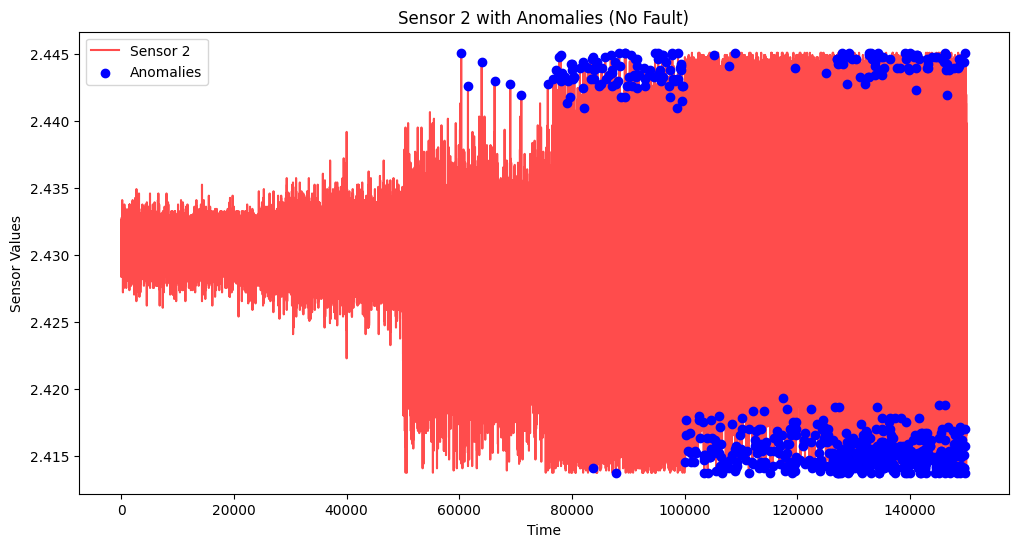

In [ ]:
threshold = 3  # Number of standard deviations from the mean

# Detect anomalies for sensor1 and sensor2 (No Fault dataset)
cleaned_df_no['sensor1_anomaly'] = (cleaned_df_no['sensor1'] - cleaned_df_no['sensor1'].rolling(window=24).mean()).abs() > threshold * cleaned_df_no['sensor1'].std()
cleaned_df_no['sensor2_anomaly'] = (cleaned_df_no['sensor2'] - cleaned_df_no['sensor2'].rolling(window=24).mean()).abs() > threshold * cleaned_df_no['sensor2'].std()

# Plot anomalies for Sensor 1 (No Fault)
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_no['sensor1'], label='Sensor 1', color='b', alpha=0.7)
plt.scatter(cleaned_df_no.index[cleaned_df_no['sensor1_anomaly']], cleaned_df_no['sensor1'][cleaned_df_no['sensor1_anomaly']], color='r', label='Anomalies', zorder=5)
plt.title("Sensor 1 with Anomalies (No Fault)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

# Similarly for Sensor 2 (No Fault)
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_no['sensor2'], label='Sensor 2', color='r', alpha=0.7)
plt.scatter(cleaned_df_no.index[cleaned_df_no['sensor2_anomaly']], cleaned_df_no['sensor2'][cleaned_df_no['sensor2_anomaly']], color='b', label='Anomalies', zorder=5)
plt.title("Sensor 2 with Anomalies (No Fault)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()


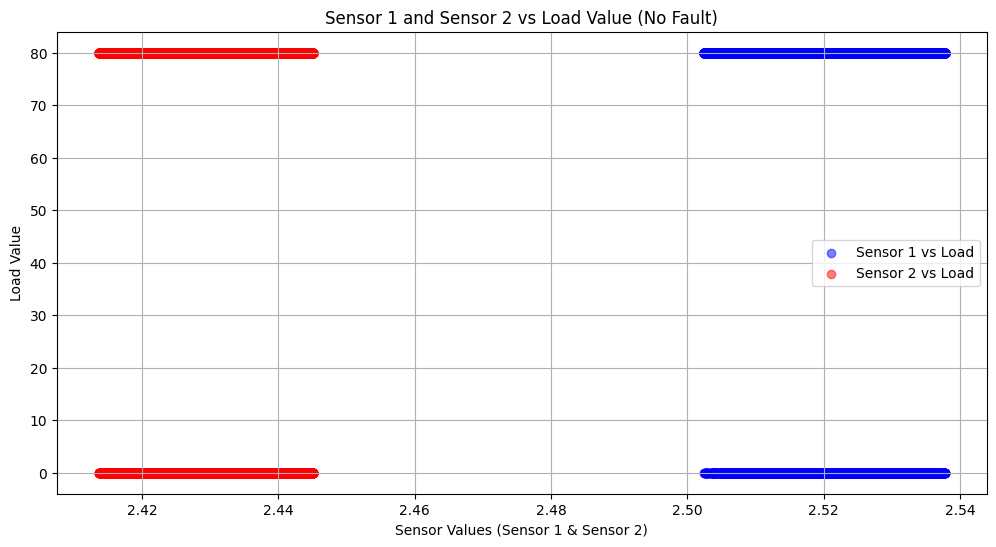

In [ ]:
# Scatter plot of sensor1 vs load_value for No Fault dataset
plt.figure(figsize=(12, 6))
plt.scatter(cleaned_df_no['sensor1'], cleaned_df_no['load_value'], color='b', alpha=0.5, label='Sensor 1 vs Load')
plt.scatter(cleaned_df_no['sensor2'], cleaned_df_no['load_value'], color='r', alpha=0.5, label='Sensor 2 vs Load')
plt.title("Sensor 1 and Sensor 2 vs Load Value (No Fault)")
plt.xlabel("Sensor Values (Sensor 1 & Sensor 2)")
plt.ylabel("Load Value")
plt.legend(loc='best')
plt.grid(True)
plt.show()


<ipython-input-136-54fb7a3d1dc9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='load_value', data=cleaned_df_no, palette='viridis')


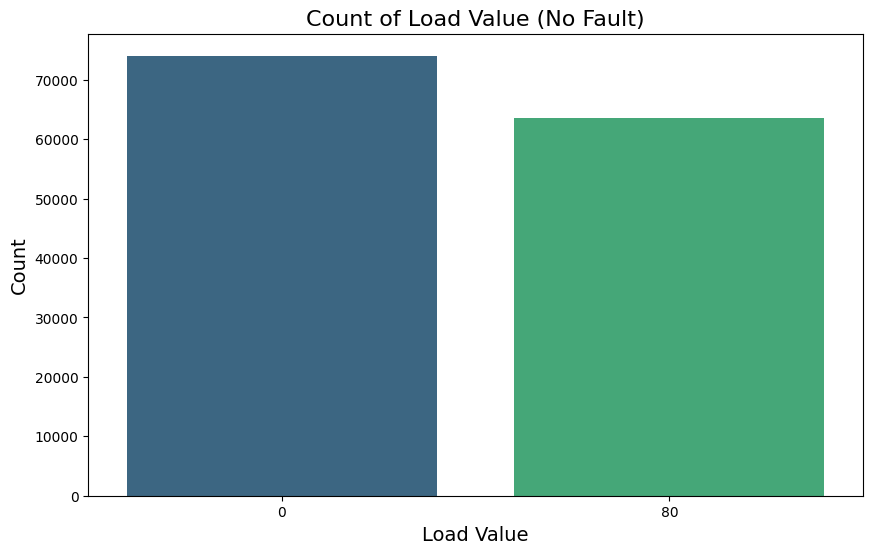

In [ ]:
# Count plot for load_value in No Fault data
plt.figure(figsize=(10, 6))
sns.countplot(x='load_value', data=cleaned_df_no, palette='viridis')
plt.title('Count of Load Value (No Fault)', fontsize=16)
plt.xlabel('Load Value', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


<ipython-input-138-ee03481a9029>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='speedSet', data=cleaned_df_no, palette='viridis')


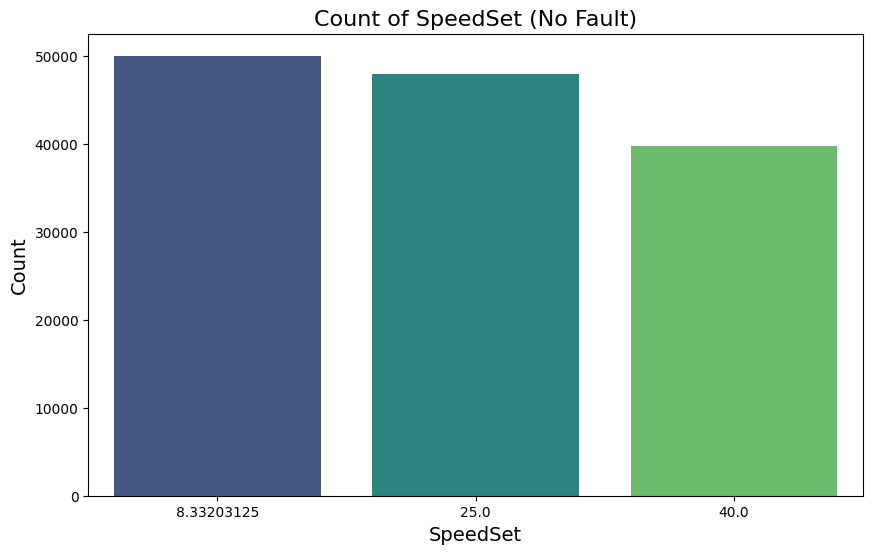

In [ ]:
# Count plot for speedSet in No Fault data
plt.figure(figsize=(10, 6))
sns.countplot(x='speedSet', data=cleaned_df_no, palette='viridis')
plt.title('Count of SpeedSet (No Fault)', fontsize=16)
plt.xlabel('SpeedSet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()



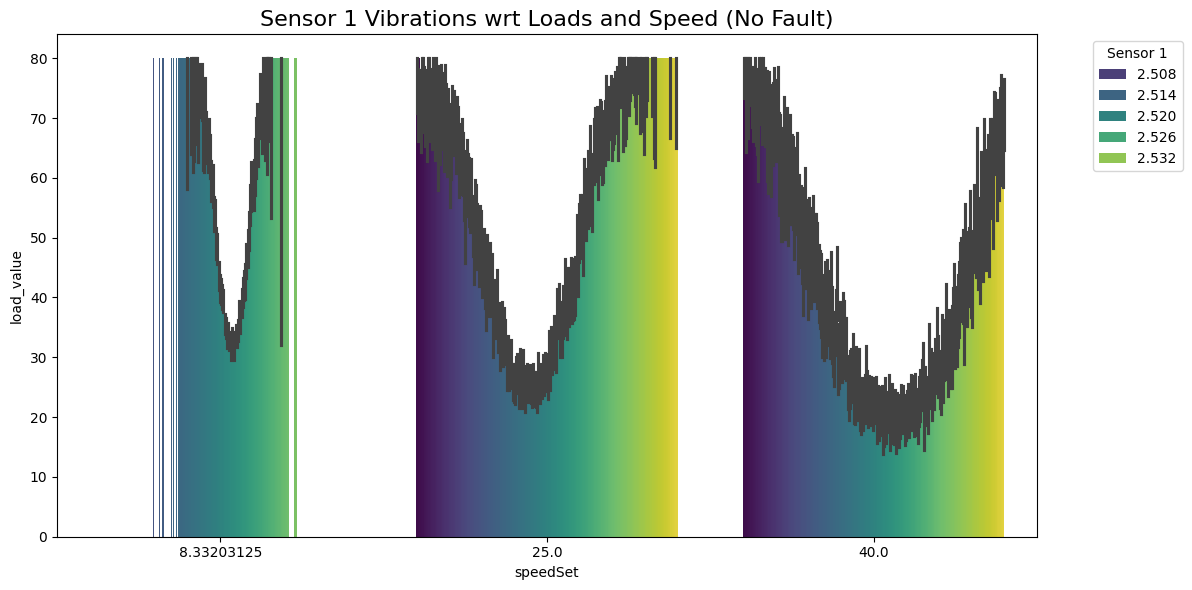

In [ ]:
# Bar plot for Sensor 1 Vibrations wrt Loads and Speed (No Fault)
plt.figure(figsize=(12, 6))
sns.barplot(x='speedSet', y='load_value', data=cleaned_df_no, hue='sensor1', palette='viridis')
plt.title('Sensor 1 Vibrations wrt Loads and Speed (No Fault)', fontsize=16)
plt.legend(title='Sensor 1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


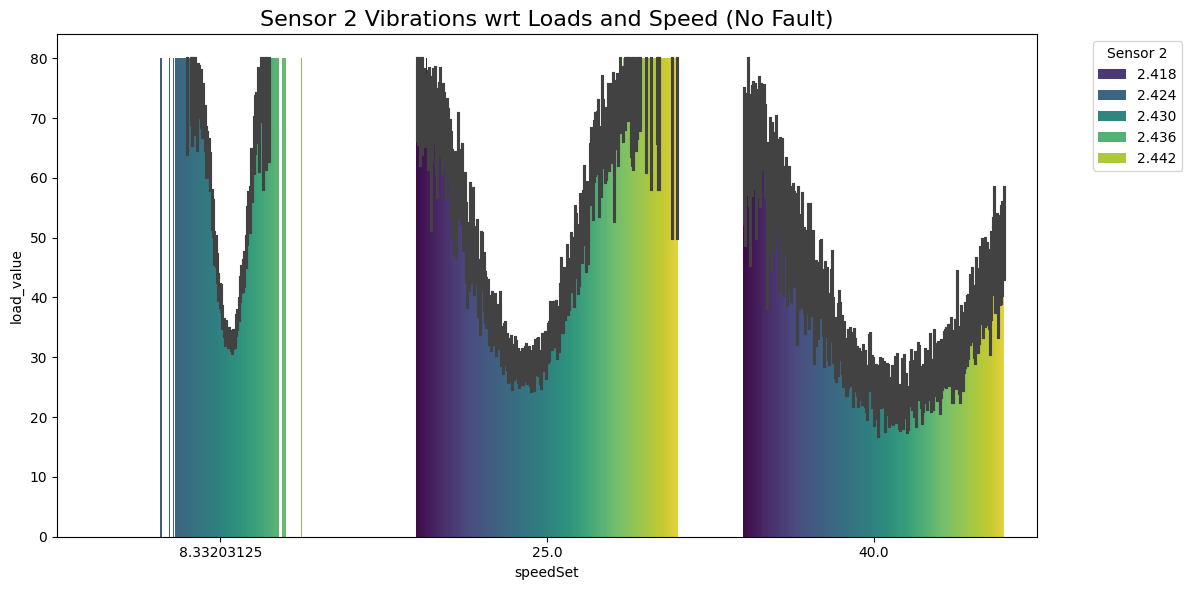

In [ ]:
# Create the bar plot for No Fault dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='speedSet', y='load_value', data=cleaned_df_no, hue='sensor2', palette='viridis')

# Add title and format the legend
plt.title('Sensor 2 Vibrations wrt Loads and Speed (No Fault)', fontsize=16)
plt.legend(title='Sensor 2', bbox_to_anchor=(1.05, 1), loc='upper left')

# Make sure everything fits in the plot area
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
# Group by speedSet and calculate summary statistics for sensor1 and sensor2
speed_summary_no = cleaned_df_no.groupby('speedSet')[['sensor1', 'sensor2']].agg(['mean', 'median', 'std', 'min', 'max'])
print(speed_summary_no)




            sensor1                                           sensor2  \
               mean    median       std       min       max      mean   
speedSet                                                                
8.332031   2.521524  2.521494  0.001543  2.510981  2.530364  2.430539   
25.000000  2.517817  2.517716  0.005757  2.502440  2.537755  2.427170   
40.000000  2.521860  2.522151  0.007346  2.502440  2.537755  2.431523   

                                                   
             median       std       min       max  
speedSet                                           
8.332031   2.430496  0.001320  2.422283  2.439202  
25.000000  2.427211  0.004806  2.413742  2.445115  
40.000000  2.431810  0.006826  2.413742  2.445115  


In [ ]:


# Group by load_value and calculate summary statistics for sensor1 and sensor2
load_summary_no = cleaned_df_no.groupby('load_value')[['sensor1', 'sensor2']].agg(['mean', 'median', 'std', 'min', 'max'])
print(load_summary_no)


             sensor1                                          sensor2  \
                mean    median       std      min       max      mean   
load_value                                                              
0           2.520498  2.520837  0.004568  2.50244  2.537755  2.429831   
80          2.520137  2.520837  0.006598  2.50244  2.537755  2.429443   

                                                    
              median       std       min       max  
load_value                                          
0           2.430003  0.004561  2.413742  2.445115  
80          2.430003  0.005570  2.413742  2.445115  


In [ ]:
speed_mean_sensor1_no = cleaned_df_no.groupby('speedSet')['sensor1'].mean().reset_index()

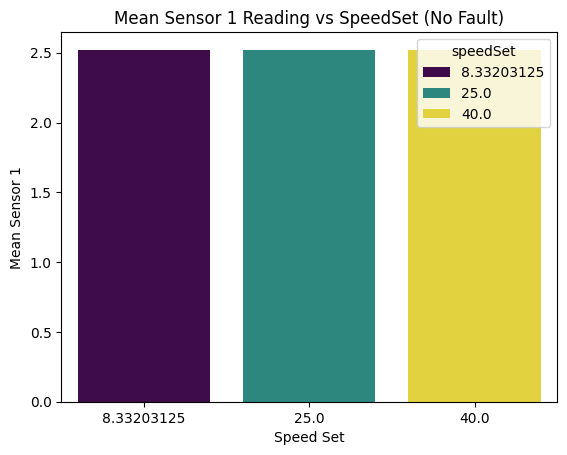

In [ ]:
sns.barplot(x='speedSet', y='sensor1', data=speed_mean_sensor1_no, hue='speedSet', palette='viridis')
plt.title('Mean Sensor 1 Reading vs SpeedSet (No Fault)')
plt.xlabel('Speed Set')
plt.ylabel('Mean Sensor 1')
plt.show()

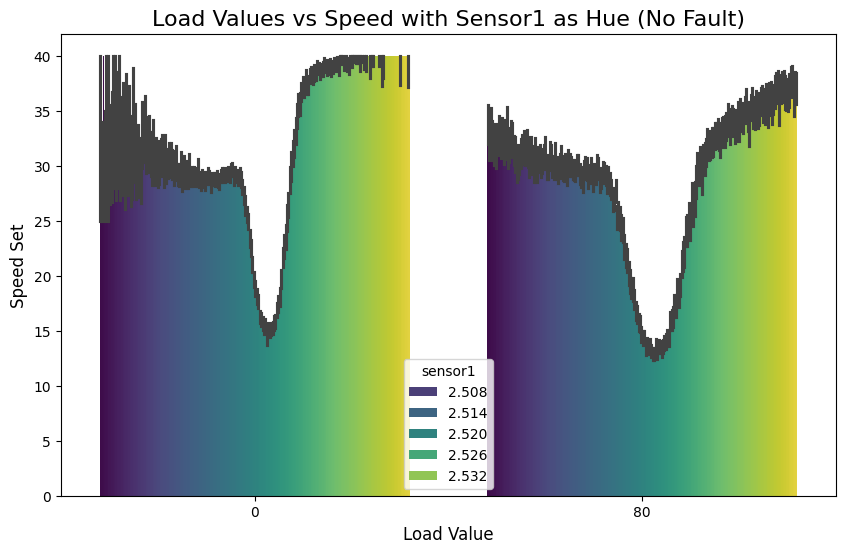

In [ ]:
# Create a bar plot with load_value on the x-axis, speedSet on the y-axis, and sensor1 as hue (color representation)
plt.figure(figsize=(10, 6))
sns.barplot(x='load_value', y='speedSet', hue='sensor1', data=cleaned_df_no, palette='viridis')
plt.title('Load Values vs Speed with Sensor1 as Hue (No Fault)', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Speed Set', fontsize=12)
plt.show()

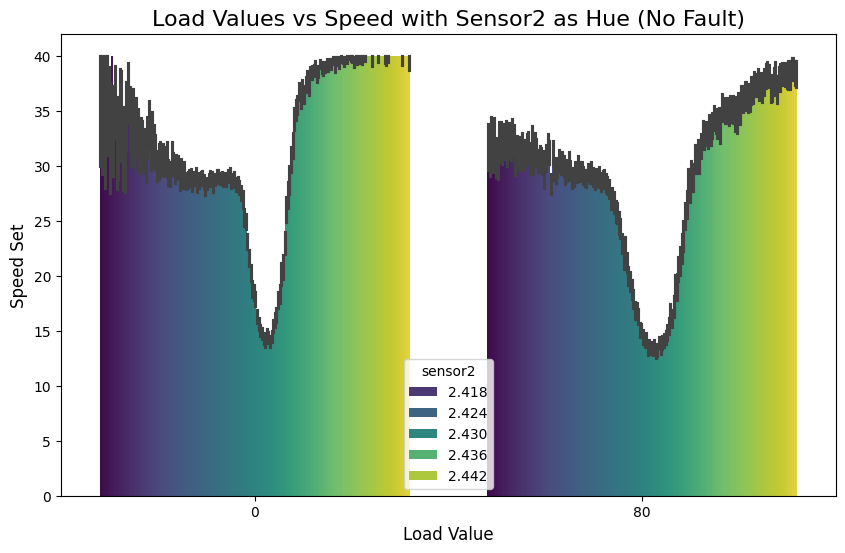

In [ ]:
# Create a bar plot with load_value on the x-axis, speedSet on the y-axis, and sensor2 as hue (color representation)
plt.figure(figsize=(10, 6))
sns.barplot(x='load_value', y='speedSet', hue='sensor2', data=cleaned_df_no, palette='viridis')
plt.title('Load Values vs Speed with Sensor2 as Hue (No Fault)', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Speed Set', fontsize=12)
plt.show()

<ipython-input-149-da46beb74e4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='load_value', y='sensor1', data=cleaned_df_no, palette='Set2')


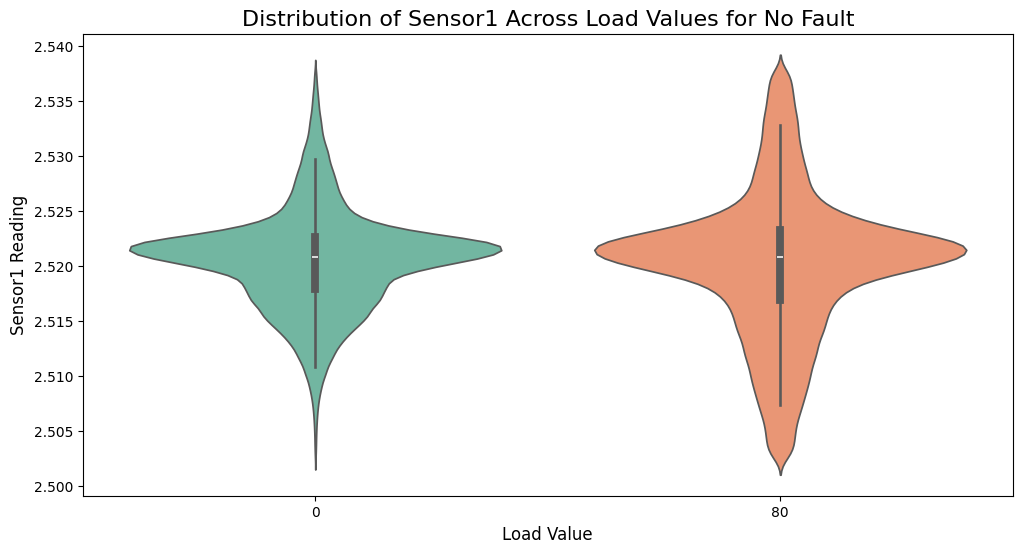

In [ ]:
# Violin plot for sensor1 and load_value (No Fault dataset)
plt.figure(figsize=(12, 6))
sns.violinplot(x='load_value', y='sensor1', data=cleaned_df_no, palette='Set2')
plt.title('Distribution of Sensor1 Across Load Values for No Fault', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Sensor1 Reading', fontsize=12)
plt.show()

# Root Crack Analysis

In [ ]:
df_root.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.519358  2.429675  2023-05-03 14:41:31.000000  8.332031           0   
1  2.519358  2.429839  2023-05-03 14:41:31.000200  8.332031           0   
2  2.521165  2.430496  2023-05-03 14:41:31.000400  8.332031           0   
3  2.520508  2.428853  2023-05-03 14:41:31.000600  8.332031           0   
4  2.519358  2.428689  2023-05-03 14:41:31.000800  8.332031           0   

  gear_fault_desc  
0      Root crack  
1      Root crack  
2      Root crack  
3      Root crack  
4      Root crack

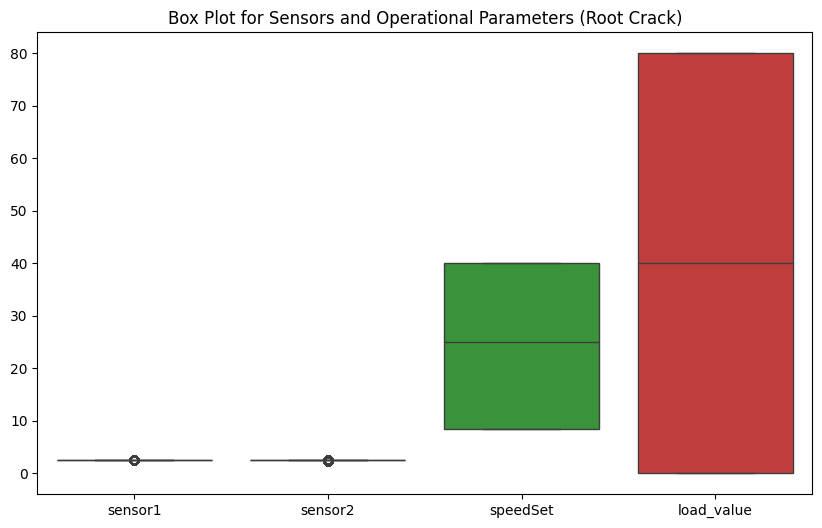

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_root[['sensor1', 'sensor2', 'speedSet', 'load_value']])
plt.title('Box Plot for Sensors and Operational Parameters (Root Crack)')
plt.show()

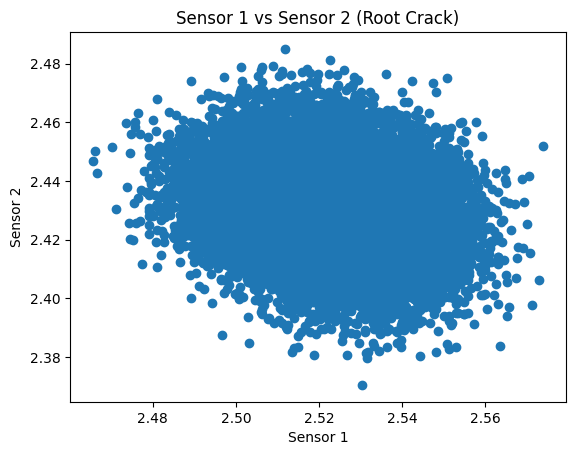

In [ ]:
# Scatter plot between sensor1 and sensor2
plt.scatter(df_root['sensor1'], df_root['sensor2'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Sensor 1 vs Sensor 2 (Root Crack)')
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1_root = df_root[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.25)
Q3_root = df_root[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR_root = Q3_root - Q1_root

# Use a larger multiplier to reduce strictness of outlier bounds
multiplier_root = 2.5  # Adjust multiplier for strictness of outlier detection

# Define the bounds for outliers
lower_bound_root = Q1_root - multiplier_root * IQR_root
upper_bound_root = Q3_root + multiplier_root * IQR_root

# Check how many outliers exist for each column before removal
print("Outliers before removal (count per column):")
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    outliers_column_root = (df_root[column] < lower_bound_root[column]) | (df_root[column] > upper_bound_root[column])
    num_outliers_column_root = outliers_column_root.sum()
    print(f"{column}: {num_outliers_column_root} outliers")

# Filter the data to keep only the rows where the values are within the bounds for each column individually
cleaned_df_root = df_root.copy()

# Apply the filter column by column
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    cleaned_df_root = cleaned_df_root[(cleaned_df_root[column] >= lower_bound_root[column]) & (cleaned_df_root[column] <= upper_bound_root[column])]

# Drop rows with NaN values
cleaned_df_root = cleaned_df_root.dropna()

# Count the number of rows removed
num_rows_removed_root = len(df_root) - len(cleaned_df_root)

# Count the number of outliers removed
outliers_condition_root = (df_root[['sensor1', 'sensor2', 'speedSet', 'load_value']] < lower_bound_root) | (df_root[['sensor1', 'sensor2', 'speedSet', 'load_value']] > upper_bound_root)
num_outliers_root = outliers_condition_root.any(axis=1).sum()

# Print the number of outliers and rows removed
print(f"\nNumber of outliers removed: {num_outliers_root}")
print(f"Number of rows removed: {num_rows_removed_root}")

Outliers before removal (count per column):
sensor1: 9008 outliers
sensor2: 8185 outliers
speedSet: 0 outliers
load_value: 0 outliers

Number of outliers removed: 15030
Number of rows removed: 15030


In [ ]:
cleaned_df_root.shape


(134970, 6)

In [ ]:
cleaned_df_root.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.519358  2.429675  2023-05-03 14:41:31.000000  8.332031           0   
1  2.519358  2.429839  2023-05-03 14:41:31.000200  8.332031           0   
2  2.521165  2.430496  2023-05-03 14:41:31.000400  8.332031           0   
3  2.520508  2.428853  2023-05-03 14:41:31.000600  8.332031           0   
4  2.519358  2.428689  2023-05-03 14:41:31.000800  8.332031           0   

  gear_fault_desc  
0      Root crack  
1      Root crack  
2      Root crack  
3      Root crack  
4      Root crack

In [ ]:
cleaned_df_root.describe()

sensor1        sensor2       speedSet     load_value
count  134970.000000  134970.000000  134970.000000  134970.000000
mean        2.521071       2.430780      22.979118      36.201823
std         0.004806       0.004592      12.694251      39.819412
min         2.506382       2.416699       8.332031       0.000000
25%         2.519030       2.428689       8.332031       0.000000
50%         2.520837       2.430332      25.000000       0.000000
75%         2.523136       2.432796      40.000000      80.000000
max         2.535784       2.445115      40.000000      80.000000

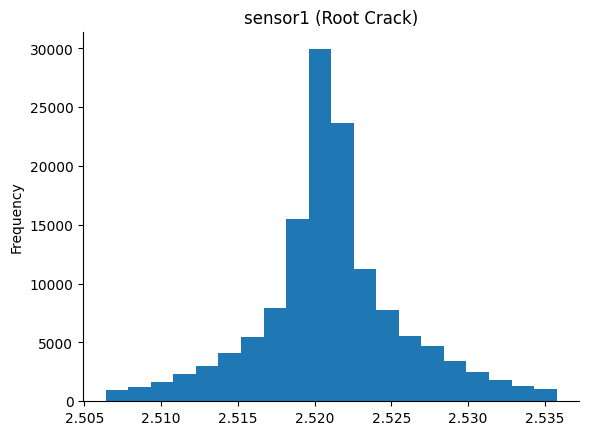

In [ ]:
# Histogram for sensor1
cleaned_df_root['sensor1'].plot(kind='hist', bins=20, title='sensor1 (Root Crack)')
plt.gca().spines[['top', 'right']].set_visible(False)

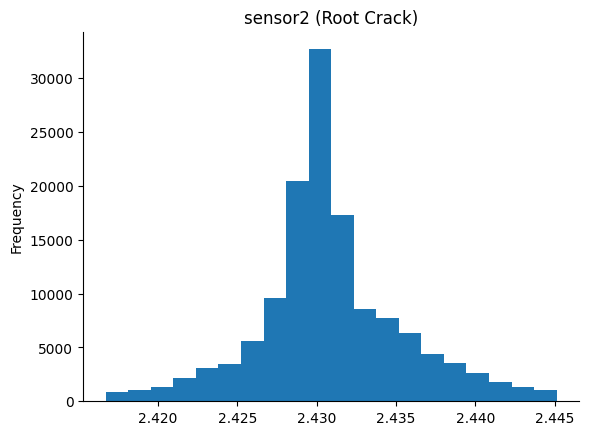

In [ ]:
# Histogram for sensor2
cleaned_df_root['sensor2'].plot(kind='hist', bins=20, title='sensor2 (Root Crack)')
plt.gca().spines[['top', 'right']].set_visible(False)

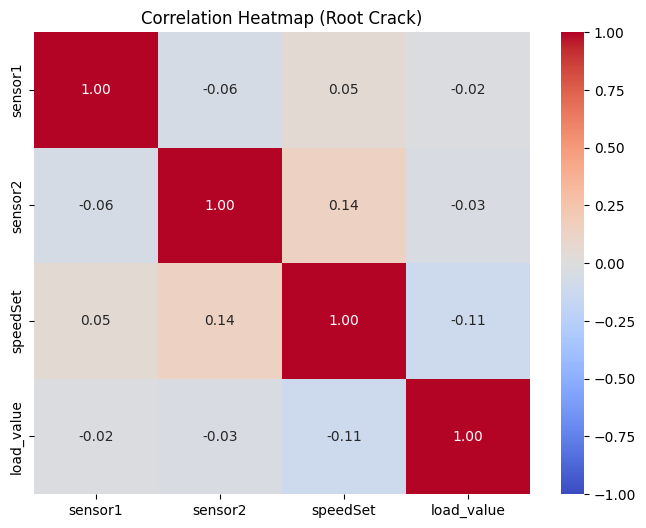

In [ ]:
# Correlation matrix for Root Crack dataset
numerical_cols_root = ['sensor1', 'sensor2', 'speedSet', 'load_value']
corr_matrix_root = cleaned_df_root[numerical_cols_root].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_root, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Root Crack)")
plt.show()

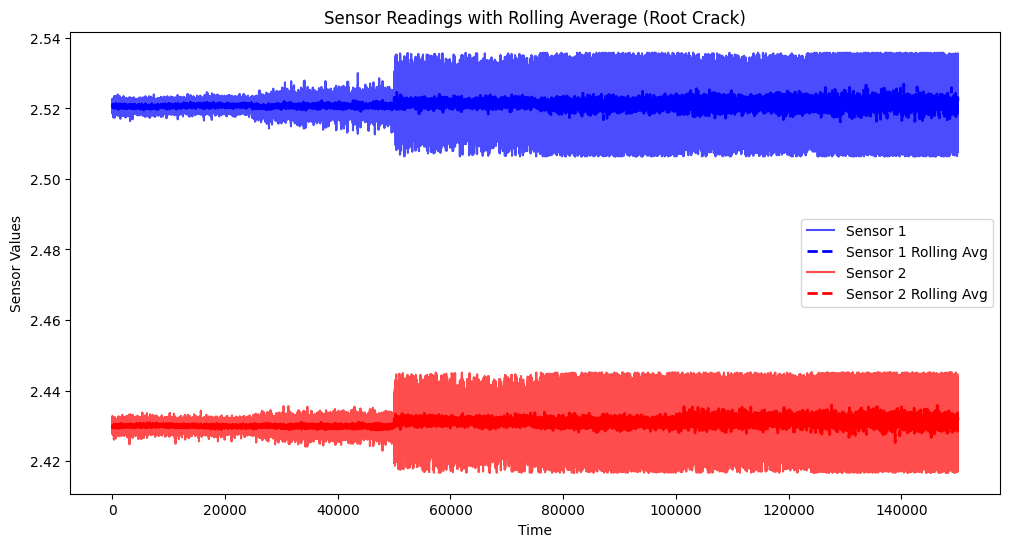

In [ ]:
# Rolling average for sensor1 and sensor2 (for Root Crack data)
cleaned_df_root['sensor1_rolling_avg'] = cleaned_df_root['sensor1'].rolling(window=24).mean()
cleaned_df_root['sensor2_rolling_avg'] = cleaned_df_root['sensor2'].rolling(window=24).mean()

# Plot rolling averages
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_root['sensor1'], label='Sensor 1', color='b', alpha=0.7)
plt.plot(cleaned_df_root['sensor1_rolling_avg'], label='Sensor 1 Rolling Avg', color='b', linestyle='--', linewidth=2)
plt.plot(cleaned_df_root['sensor2'], label='Sensor 2', color='r', alpha=0.7)
plt.plot(cleaned_df_root['sensor2_rolling_avg'], label='Sensor 2 Rolling Avg', color='r', linestyle='--', linewidth=2)
plt.title("Sensor Readings with Rolling Average (Root Crack)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

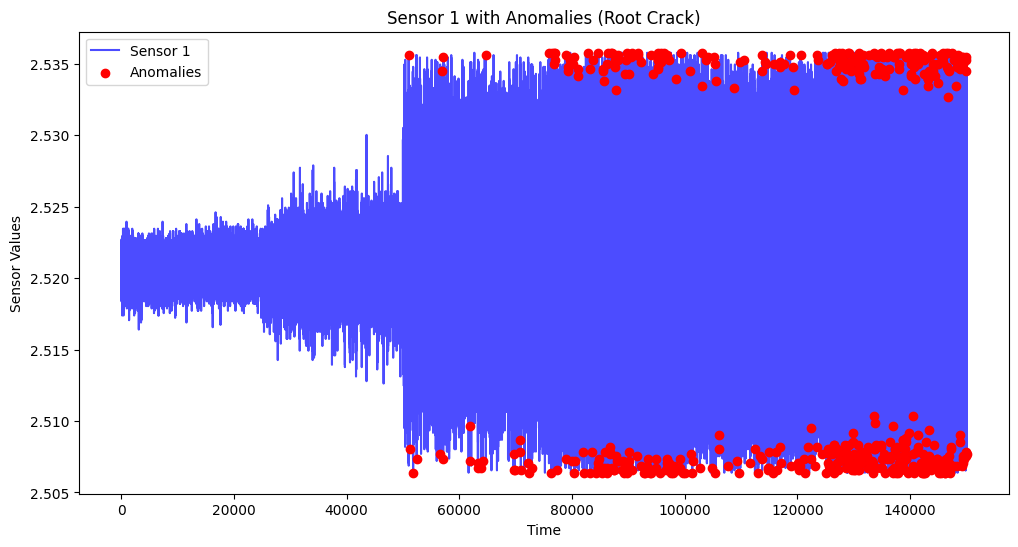

In [ ]:
threshold = 3  # Number of standard deviations from the mean

# Detect anomalies for sensor1 and sensor2 (Root Crack dataset)
cleaned_df_root['sensor1_anomaly'] = (cleaned_df_root['sensor1'] - cleaned_df_root['sensor1'].rolling(window=24).mean()).abs() > threshold * cleaned_df_root['sensor1'].std()
cleaned_df_root['sensor2_anomaly'] = (cleaned_df_root['sensor2'] - cleaned_df_root['sensor2'].rolling(window=24).mean()).abs() > threshold * cleaned_df_root['sensor2'].std()

# Plot anomalies for Sensor 1 (Root Crack)
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_root['sensor1'], label='Sensor 1', color='b', alpha=0.7)
plt.scatter(cleaned_df_root.index[cleaned_df_root['sensor1_anomaly']], cleaned_df_root['sensor1'][cleaned_df_root['sensor1_anomaly']], color='r', label='Anomalies', zorder=5)
plt.title("Sensor 1 with Anomalies (Root Crack)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

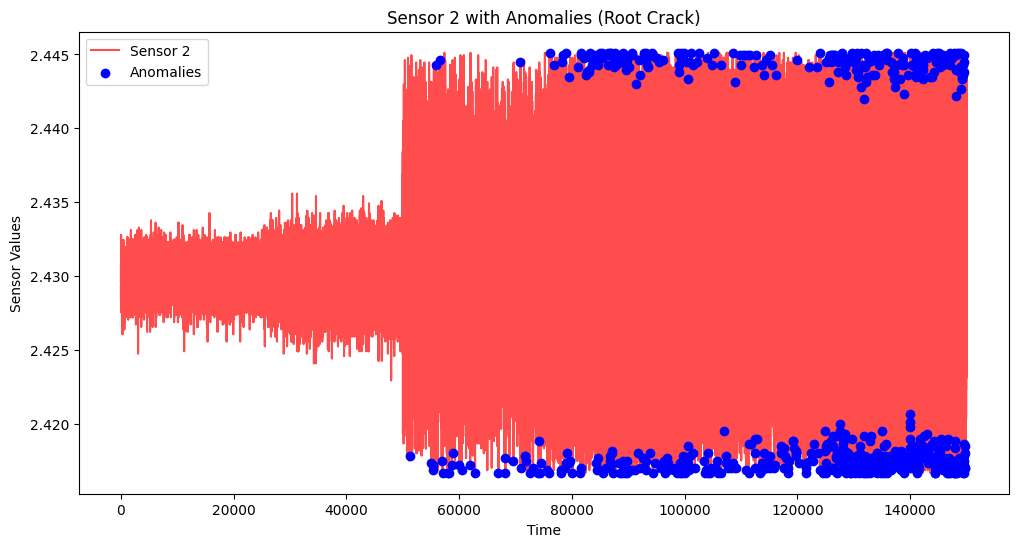

In [ ]:
# Similarly for Sensor 2 (Root Crack)
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_root['sensor2'], label='Sensor 2', color='r', alpha=0.7)
plt.scatter(cleaned_df_root.index[cleaned_df_root['sensor2_anomaly']], cleaned_df_root['sensor2'][cleaned_df_root['sensor2_anomaly']], color='b', label='Anomalies', zorder=5)
plt.title("Sensor 2 with Anomalies (Root Crack)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

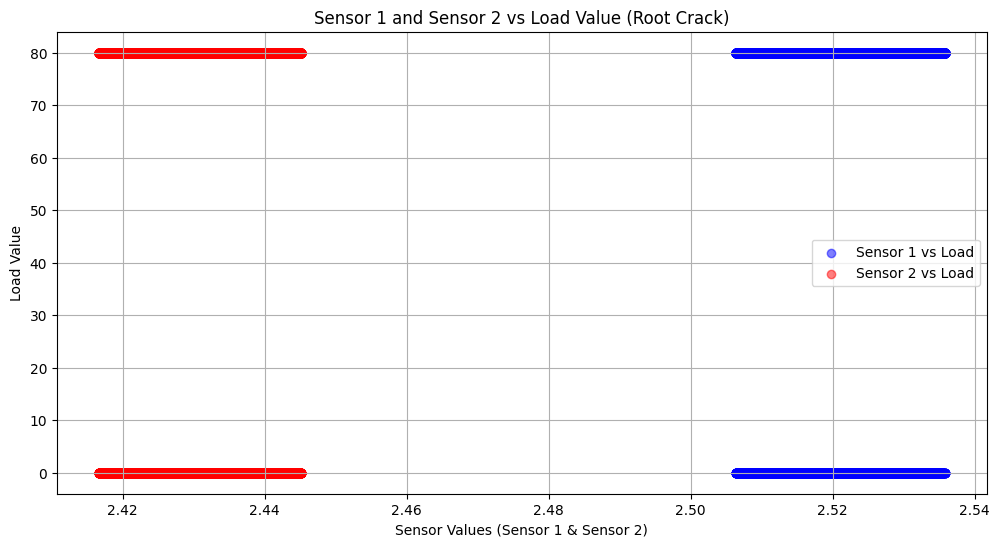

In [ ]:
# Scatter plot of sensor1 vs load_value for Root Crack dataset
plt.figure(figsize=(12, 6))
plt.scatter(cleaned_df_root['sensor1'], cleaned_df_root['load_value'], color='b', alpha=0.5, label='Sensor 1 vs Load')
plt.scatter(cleaned_df_root['sensor2'], cleaned_df_root['load_value'], color='r', alpha=0.5, label='Sensor 2 vs Load')
plt.title("Sensor 1 and Sensor 2 vs Load Value (Root Crack)")
plt.xlabel("Sensor Values (Sensor 1 & Sensor 2)")
plt.ylabel("Load Value")
plt.legend(loc='best')
plt.grid(True)
plt.show()

<ipython-input-165-3baac1f40092>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='load_value', data=cleaned_df_root, palette='viridis')


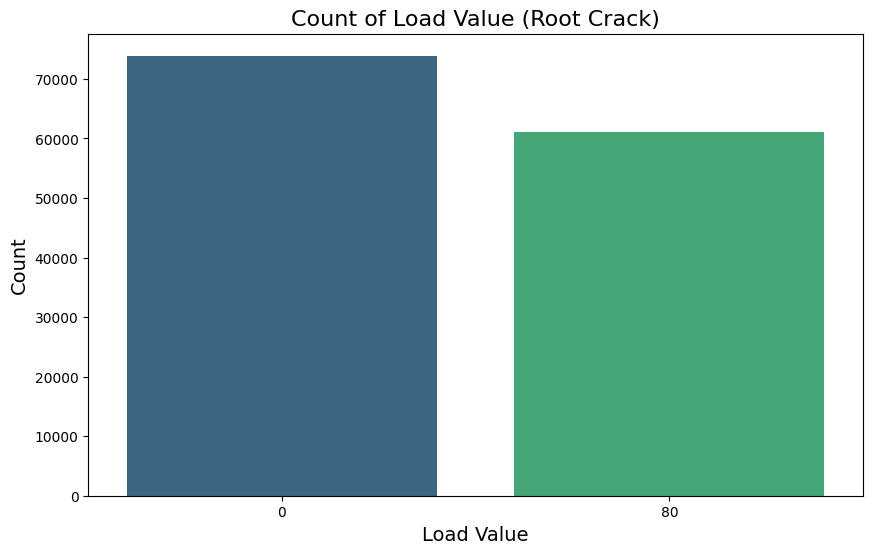

In [ ]:
# Count plot for load_value in Root Crack data
plt.figure(figsize=(10, 6))
sns.countplot(x='load_value', data=cleaned_df_root, palette='viridis')
plt.title('Count of Load Value (Root Crack)', fontsize=16)
plt.xlabel('Load Value', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

<ipython-input-166-2ba974aa9deb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='speedSet', data=cleaned_df_root, palette='viridis')


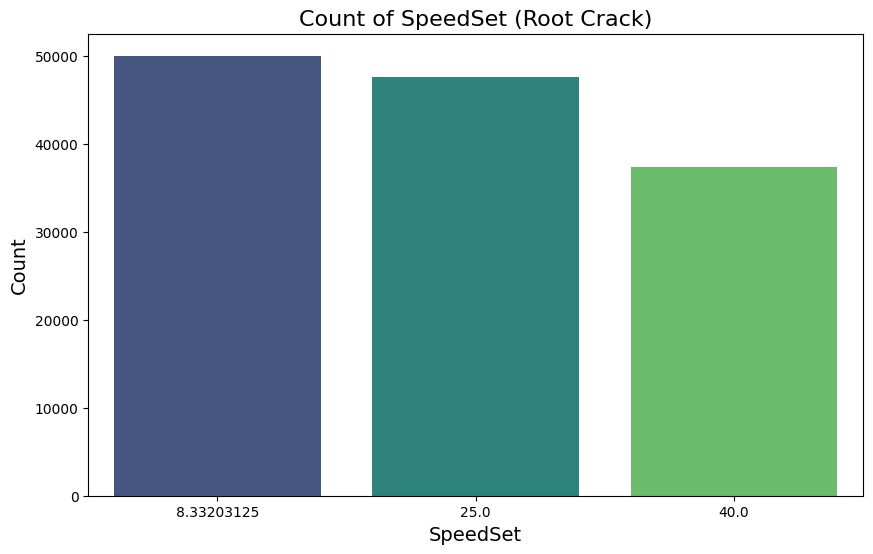

In [ ]:
# Count plot for speedSet in Root Crack data
plt.figure(figsize=(10, 6))
sns.countplot(x='speedSet', data=cleaned_df_root, palette='viridis')
plt.title('Count of SpeedSet (Root Crack)', fontsize=16)
plt.xlabel('SpeedSet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

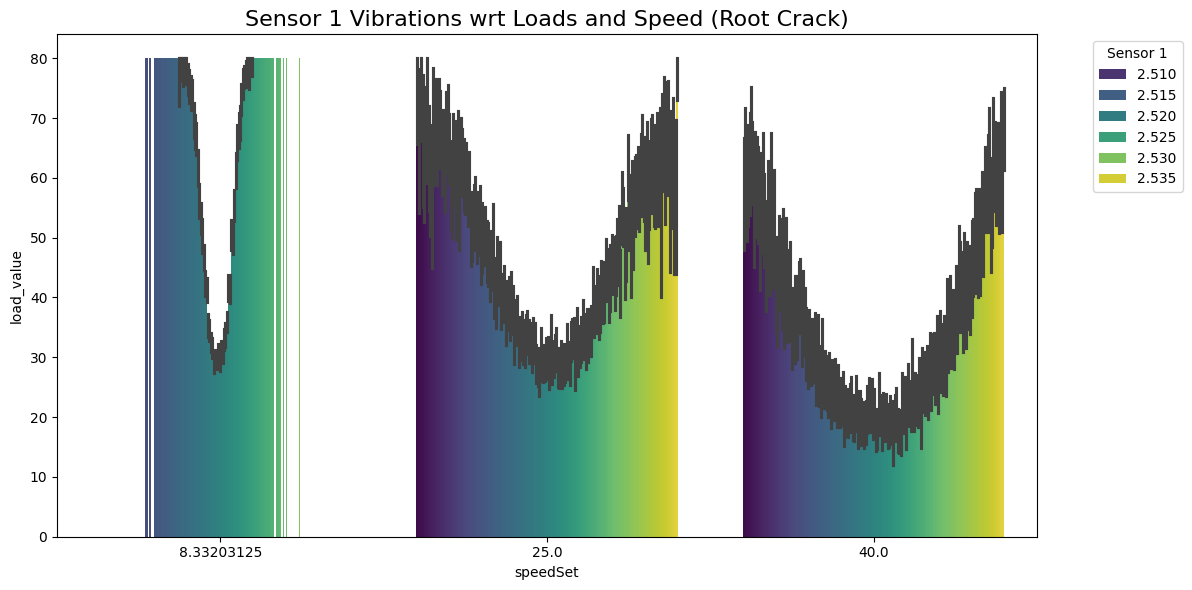

In [ ]:
# Create the bar plot for Root Crack dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='speedSet', y='load_value', data=cleaned_df_root, hue='sensor1', palette='viridis')
plt.title('Sensor 1 Vibrations wrt Loads and Speed (Root Crack)', fontsize=16)
plt.legend(title='Sensor 1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

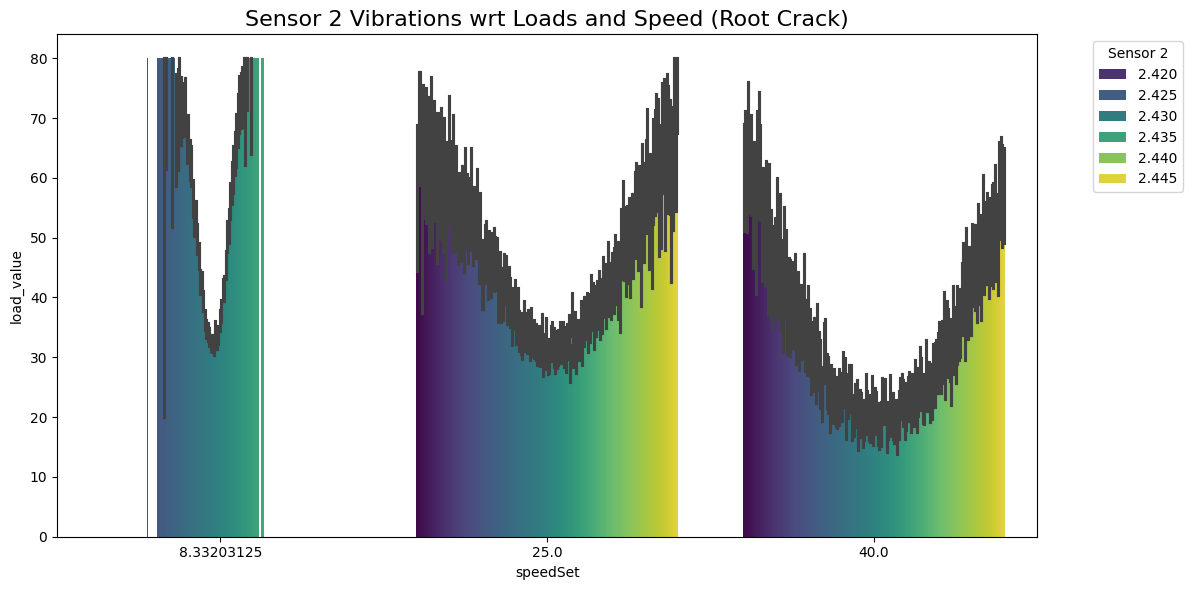

In [ ]:
# Create the bar plot for Root Crack dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='speedSet', y='load_value', data=cleaned_df_root, hue='sensor2', palette='viridis')
plt.title('Sensor 2 Vibrations wrt Loads and Speed (Root Crack)', fontsize=16)
plt.legend(title='Sensor 2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Group by speedSet and calculate summary statistics for sensor1 and sensor2 in the Root Crack dataset
speed_summary_root = cleaned_df_root.groupby('speedSet')[['sensor1', 'sensor2']].agg(['mean', 'median', 'std', 'min', 'max'])
print(speed_summary_root)

            sensor1                                           sensor2  \
               mean    median       std       min       max      mean   
speedSet                                                                
8.332031   2.520700  2.520673  0.001387  2.512624  2.530035  2.429910   
25.000000  2.521268  2.521330  0.005529  2.506382  2.535784  2.431115   
40.000000  2.521316  2.521330  0.006452  2.506382  2.535784  2.431516   

                                                   
             median       std       min       max  
speedSet                                           
8.332031   2.430003  0.001191  2.422940  2.435588  
25.000000  2.431153  0.005101  2.416699  2.445115  
40.000000  2.431646  0.006277  2.416699  2.445115  


In [ ]:
# Group by load_value and calculate summary statistics for sensor1 and sensor2 in Root Crack dataset
load_summary_root = cleaned_df_root.groupby('load_value')[['sensor1', 'sensor2']].agg(['mean', 'median', 'std', 'min', 'max'])
print(load_summary_root)

             sensor1                                           sensor2  \
                mean    median       std       min       max      mean   
load_value                                                               
0           2.521168  2.520837  0.004161  2.506382  2.535784  2.430924   
80          2.520953  2.520837  0.005484  2.506382  2.535784  2.430606   

                                                    
              median       std       min       max  
load_value                                          
0           2.430332  0.004139  2.416699  2.445115  
80          2.430168  0.005080  2.416699  2.445115  


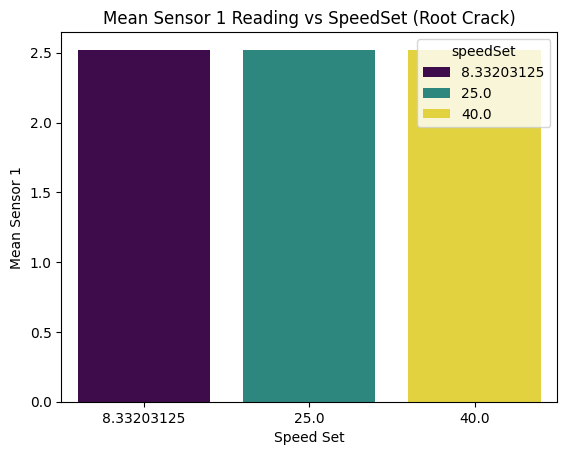

In [ ]:
# Calculate the mean of sensor1 for each speedSet level in Root Crack dataset
speed_mean_sensor1_root = cleaned_df_root.groupby('speedSet')['sensor1'].mean().reset_index()

# Plot the bar chart for Root Crack dataset
sns.barplot(x='speedSet', y='sensor1', data=speed_mean_sensor1_root, hue='speedSet', palette='viridis')
plt.title('Mean Sensor 1 Reading vs SpeedSet (Root Crack)')
plt.xlabel('Speed Set')
plt.ylabel('Mean Sensor 1')
plt.show()

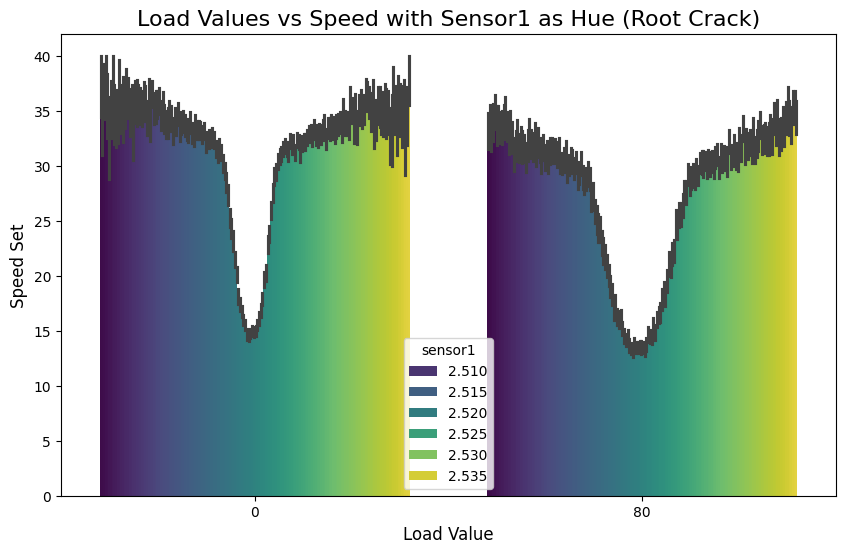

In [ ]:
# Create a bar plot with load_value on the x-axis, speedSet on the y-axis, and sensor1 as hue (color representation)
plt.figure(figsize=(10, 6))
sns.barplot(x='load_value', y='speedSet', hue='sensor1', data=cleaned_df_root, palette='viridis')
plt.title('Load Values vs Speed with Sensor1 as Hue (Root Crack)', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Speed Set', fontsize=12)
plt.show()

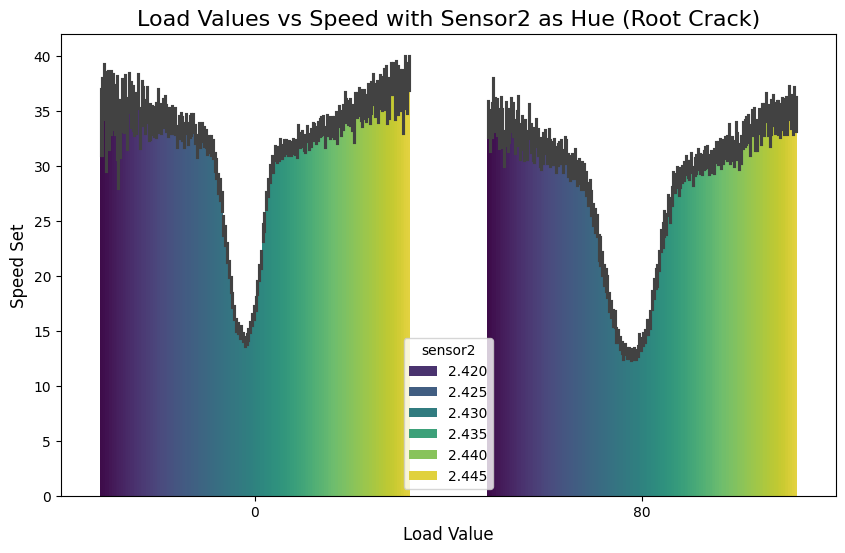

In [ ]:
# Create a bar plot with load_value on the x-axis, speedSet on the y-axis, and sensor2 as hue (color representation)
plt.figure(figsize=(10, 6))
sns.barplot(x='load_value', y='speedSet', hue='sensor2', data=cleaned_df_root, palette='viridis')
plt.title('Load Values vs Speed with Sensor2 as Hue (Root Crack)', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Speed Set', fontsize=12)
plt.show()

<ipython-input-175-4ccc8d141b0c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='load_value', y='sensor1', data=cleaned_df_root, palette='Set2')


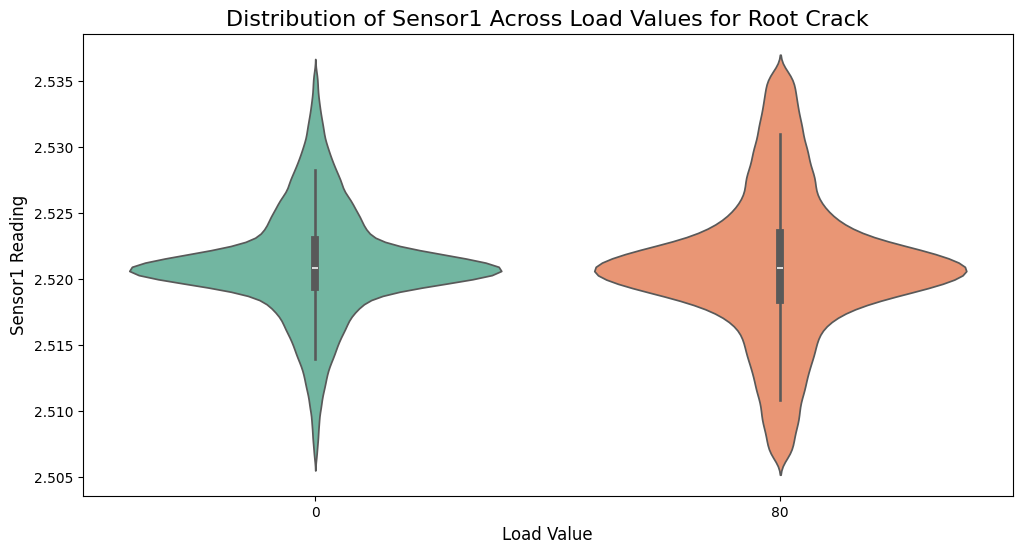

In [ ]:
# Violin plot for sensor1 and load_value (Root Crack dataset)
plt.figure(figsize=(12, 6))
sns.violinplot(x='load_value', y='sensor1', data=cleaned_df_root, palette='Set2')
plt.title('Distribution of Sensor1 Across Load Values for Root Crack', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Sensor1 Reading', fontsize=12)
plt.show()

# Surface Defect Analysis

In [ ]:
df_sur.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.521001  2.427539  2023-05-02 14:35:14.000000  8.332031           0   
1  2.519851  2.428196  2023-05-02 14:35:14.000200  8.332031           0   
2  2.520016  2.426225  2023-05-02 14:35:14.000400  8.332031           0   
3  2.520016  2.428689  2023-05-02 14:35:14.000600  8.332031           0   
4  2.521165  2.427047  2023-05-02 14:35:14.000800  8.332031           0   

  gear_fault_desc  
0  surface defect  
1  surface defect  
2  surface defect  
3  surface defect  
4  surface defect

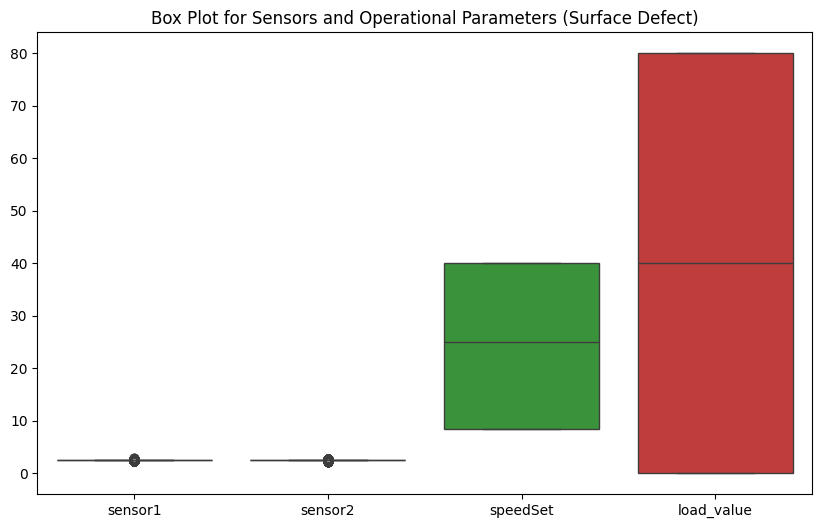

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sur[['sensor1', 'sensor2', 'speedSet', 'load_value']])
plt.title('Box Plot for Sensors and Operational Parameters (Surface Defect)')
plt.show()

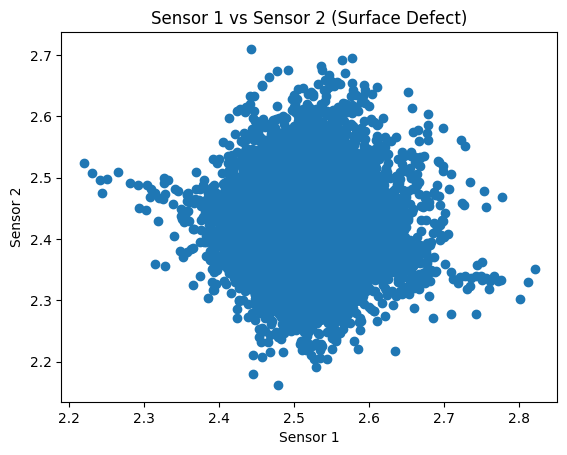

In [ ]:
# Scatter plot between sensor1 and sensor2
plt.scatter(df_sur['sensor1'], df_sur['sensor2'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Sensor 1 vs Sensor 2 (Surface Defect)')
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1_sur = df_sur[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.25)
Q3_sur = df_sur[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR_sur = Q3_sur - Q1_sur

# Use a larger multiplier to reduce strictness of outlier bounds
multiplier_sur = 2.5  # Adjust multiplier for strictness of outlier detection

# Define the bounds for outliers
lower_bound_sur = Q1_sur - multiplier_sur * IQR_sur
upper_bound_sur = Q3_sur + multiplier_sur * IQR_sur

# Check how many outliers exist for each column before removal
print("Outliers before removal (count per column):")
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    outliers_column_sur = (df_sur[column] < lower_bound_sur[column]) | (df_sur[column] > upper_bound_sur[column])
    num_outliers_column_sur = outliers_column_sur.sum()
    print(f"{column}: {num_outliers_column_sur} outliers")

# Filter the data to keep only the rows where the values are within the bounds for each column individually
cleaned_df_sur = df_sur.copy()

# Apply the filter column by column
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    cleaned_df_sur = cleaned_df_sur[(cleaned_df_sur[column] >= lower_bound_sur[column]) & (cleaned_df_sur[column] <= upper_bound_sur[column])]

# Drop rows with NaN values
cleaned_df_sur = cleaned_df_sur.dropna()

# Count the number of rows removed
num_rows_removed_sur = len(df_sur) - len(cleaned_df_sur)

# Count the number of outliers removed
outliers_condition_sur = (df_sur[['sensor1', 'sensor2', 'speedSet', 'load_value']] < lower_bound_sur) | (df_sur[['sensor1', 'sensor2', 'speedSet', 'load_value']] > upper_bound_sur)
num_outliers_sur = outliers_condition_sur.any(axis=1).sum()

# Print the number of outliers and rows removed
print(f"\nNumber of outliers removed: {num_outliers_sur}")
print(f"Number of rows removed: {num_rows_removed_sur}")


Outliers before removal (count per column):
sensor1: 17341 outliers
sensor2: 17312 outliers
speedSet: 0 outliers
load_value: 0 outliers

Number of outliers removed: 27756
Number of rows removed: 27756


In [ ]:
cleaned_df_sur.shape

(122244, 6)

In [ ]:
cleaned_df_sur.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.521001  2.427539  2023-05-02 14:35:14.000000  8.332031           0   
1  2.519851  2.428196  2023-05-02 14:35:14.000200  8.332031           0   
2  2.520016  2.426225  2023-05-02 14:35:14.000400  8.332031           0   
3  2.520016  2.428689  2023-05-02 14:35:14.000600  8.332031           0   
4  2.521165  2.427047  2023-05-02 14:35:14.000800  8.332031           0   

  gear_fault_desc  
0  surface defect  
1  surface defect  
2  surface defect  
3  surface defect  
4  surface defect

In [ ]:
cleaned_df_sur.describe()

sensor1        sensor2       speedSet     load_value
count  122244.000000  122244.000000  122244.000000  122244.000000
mean        2.518345       2.427436      22.068922      34.852917
std         0.009238       0.009025      12.770157      39.667624
min         2.488478       2.397481       8.332031       0.000000
25%         2.515088       2.424090       8.332031       0.000000
50%         2.519030       2.428032      25.000000       0.000000
75%         2.521822       2.430825      40.000000      80.000000
max         2.547446       2.456448      40.000000      80.000000

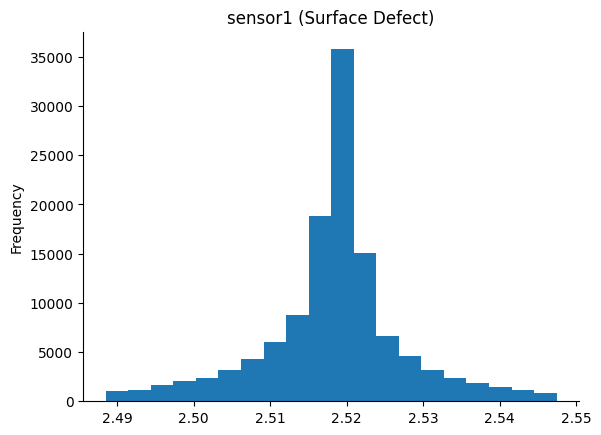

In [ ]:
# Histogram for sensor1
cleaned_df_sur['sensor1'].plot(kind='hist', bins=20, title='sensor1 (Surface Defect)')
plt.gca().spines[['top', 'right']].set_visible(False)

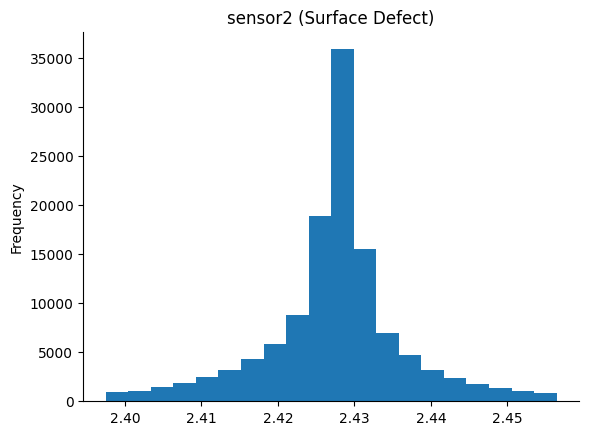

In [ ]:
# Histogram for sensor2
cleaned_df_sur['sensor2'].plot(kind='hist', bins=20, title='sensor2 (Surface Defect)')
plt.gca().spines[['top', 'right']].set_visible(False)

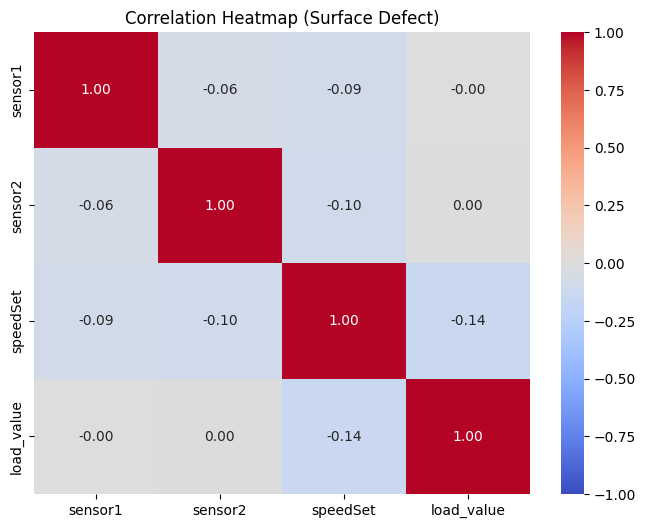

In [ ]:
# Correlation matrix for Surface Defect dataset
numerical_cols_sur = ['sensor1', 'sensor2', 'speedSet', 'load_value']
corr_matrix_sur = cleaned_df_sur[numerical_cols_sur].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_sur, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Surface Defect)")
plt.show()

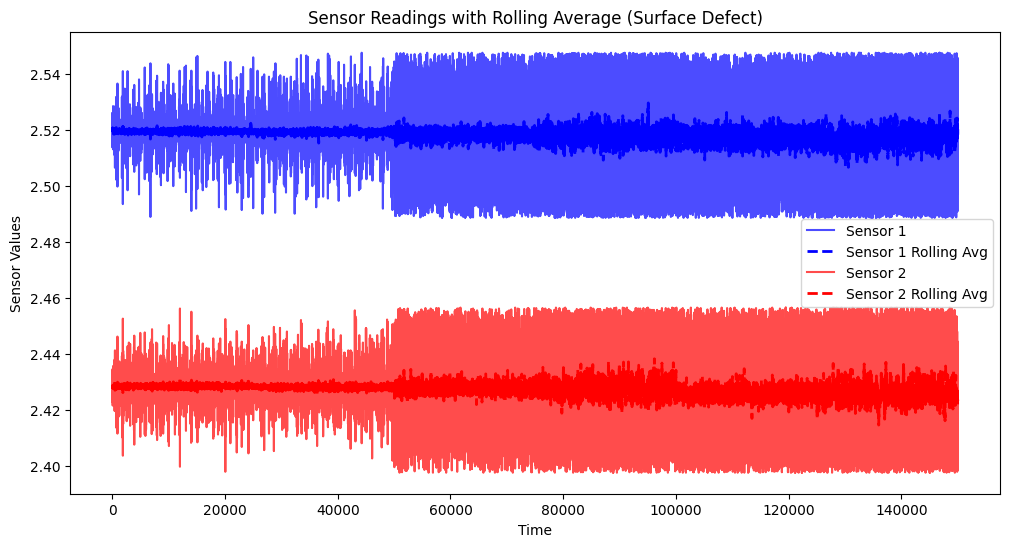

In [ ]:
# Rolling average for sensor1 and sensor2 (for Surface Defect data)
cleaned_df_sur['sensor1_rolling_avg'] = cleaned_df_sur['sensor1'].rolling(window=24).mean()
cleaned_df_sur['sensor2_rolling_avg'] = cleaned_df_sur['sensor2'].rolling(window=24).mean()

# Plot rolling averages
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_sur['sensor1'], label='Sensor 1', color='b', alpha=0.7)
plt.plot(cleaned_df_sur['sensor1_rolling_avg'], label='Sensor 1 Rolling Avg', color='b', linestyle='--', linewidth=2)
plt.plot(cleaned_df_sur['sensor2'], label='Sensor 2', color='r', alpha=0.7)
plt.plot(cleaned_df_sur['sensor2_rolling_avg'], label='Sensor 2 Rolling Avg', color='r', linestyle='--', linewidth=2)
plt.title("Sensor Readings with Rolling Average (Surface Defect)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

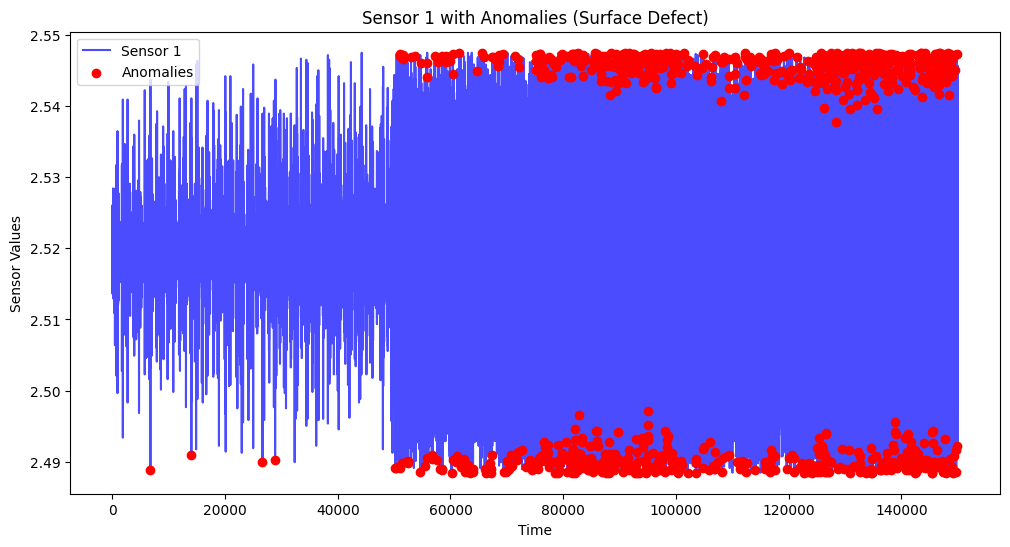

In [ ]:
threshold = 3  # Number of standard deviations from the mean

# Detect anomalies for sensor1 and sensor2 (Surface Defect dataset)
cleaned_df_sur['sensor1_anomaly'] = (cleaned_df_sur['sensor1'] - cleaned_df_sur['sensor1'].rolling(window=24).mean()).abs() > threshold * cleaned_df_sur['sensor1'].std()
cleaned_df_sur['sensor2_anomaly'] = (cleaned_df_sur['sensor2'] - cleaned_df_sur['sensor2'].rolling(window=24).mean()).abs() > threshold * cleaned_df_sur['sensor2'].std()

# Plot anomalies for Sensor 1 (Surface Defect)
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_sur['sensor1'], label='Sensor 1', color='b', alpha=0.7)
plt.scatter(cleaned_df_sur.index[cleaned_df_sur['sensor1_anomaly']], cleaned_df_sur['sensor1'][cleaned_df_sur['sensor1_anomaly']], color='r', label='Anomalies', zorder=5)
plt.title("Sensor 1 with Anomalies (Surface Defect)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

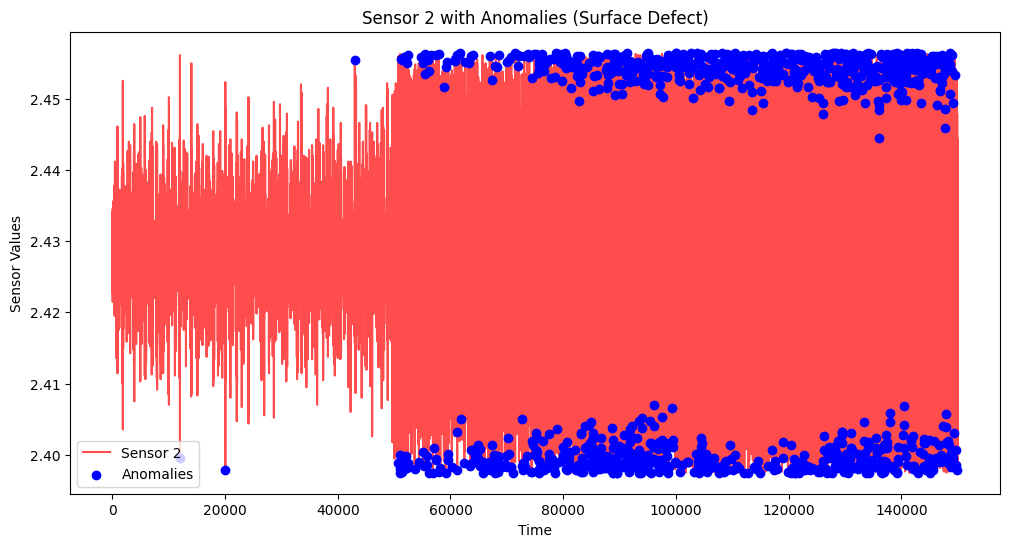

In [ ]:
# Similarly for Sensor 2 (Surface Defect)
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_sur['sensor2'], label='Sensor 2', color='r', alpha=0.7)
plt.scatter(cleaned_df_sur.index[cleaned_df_sur['sensor2_anomaly']], cleaned_df_sur['sensor2'][cleaned_df_sur['sensor2_anomaly']], color='b', label='Anomalies', zorder=5)
plt.title("Sensor 2 with Anomalies (Surface Defect)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

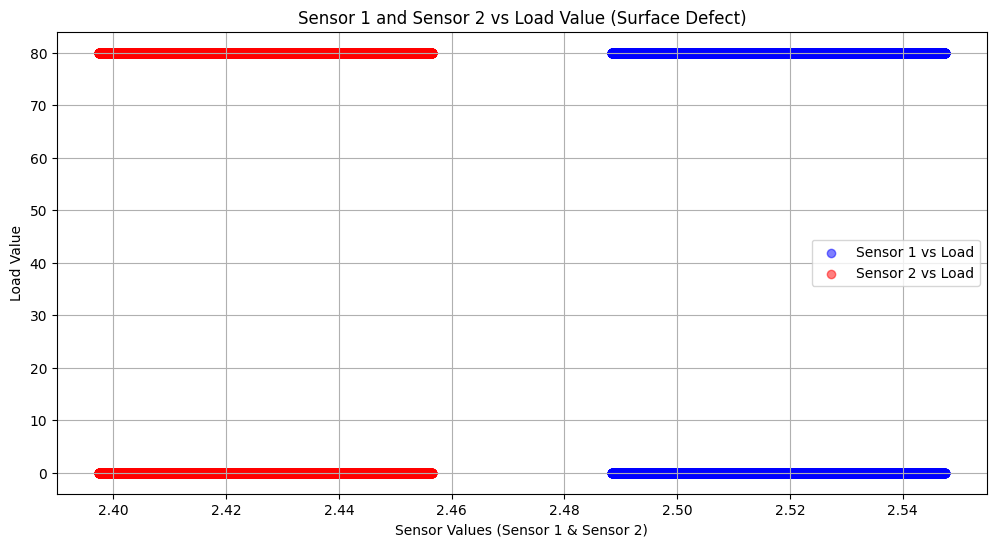

In [ ]:
# Scatter plot of sensor1 vs load_value for Surface Defect dataset
plt.figure(figsize=(12, 6))
plt.scatter(cleaned_df_sur['sensor1'], cleaned_df_sur['load_value'], color='b', alpha=0.5, label='Sensor 1 vs Load')
plt.scatter(cleaned_df_sur['sensor2'], cleaned_df_sur['load_value'], color='r', alpha=0.5, label='Sensor 2 vs Load')
plt.title("Sensor 1 and Sensor 2 vs Load Value (Surface Defect)")
plt.xlabel("Sensor Values (Sensor 1 & Sensor 2)")
plt.ylabel("Load Value")
plt.legend(loc='best')
plt.grid(True)
plt.show()

<ipython-input-191-d9ba1a0ee268>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='load_value', data=cleaned_df_sur, palette='viridis')


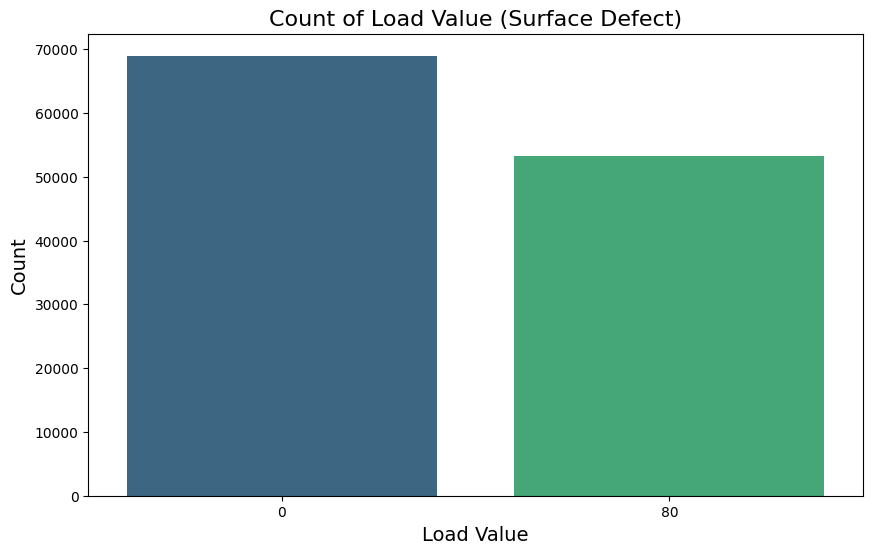

In [ ]:
# Count plot for load_value in Surface Defect data
plt.figure(figsize=(10, 6))
sns.countplot(x='load_value', data=cleaned_df_sur, palette='viridis')
plt.title('Count of Load Value (Surface Defect)', fontsize=16)
plt.xlabel('Load Value', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

<ipython-input-192-10c82cbb491f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='speedSet', data=cleaned_df_sur, palette='viridis')


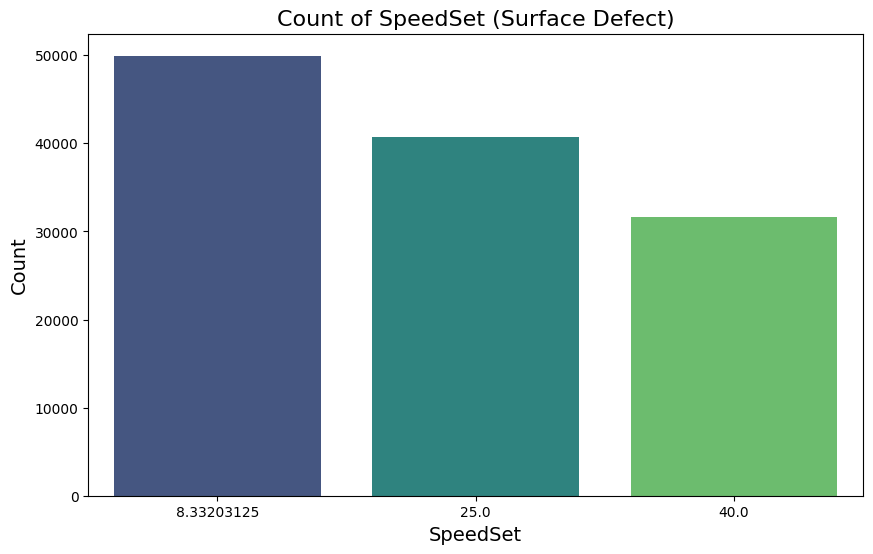

In [ ]:
# Count plot for speedSet in Surface Defect data
plt.figure(figsize=(10, 6))
sns.countplot(x='speedSet', data=cleaned_df_sur, palette='viridis')
plt.title('Count of SpeedSet (Surface Defect)', fontsize=16)
plt.xlabel('SpeedSet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

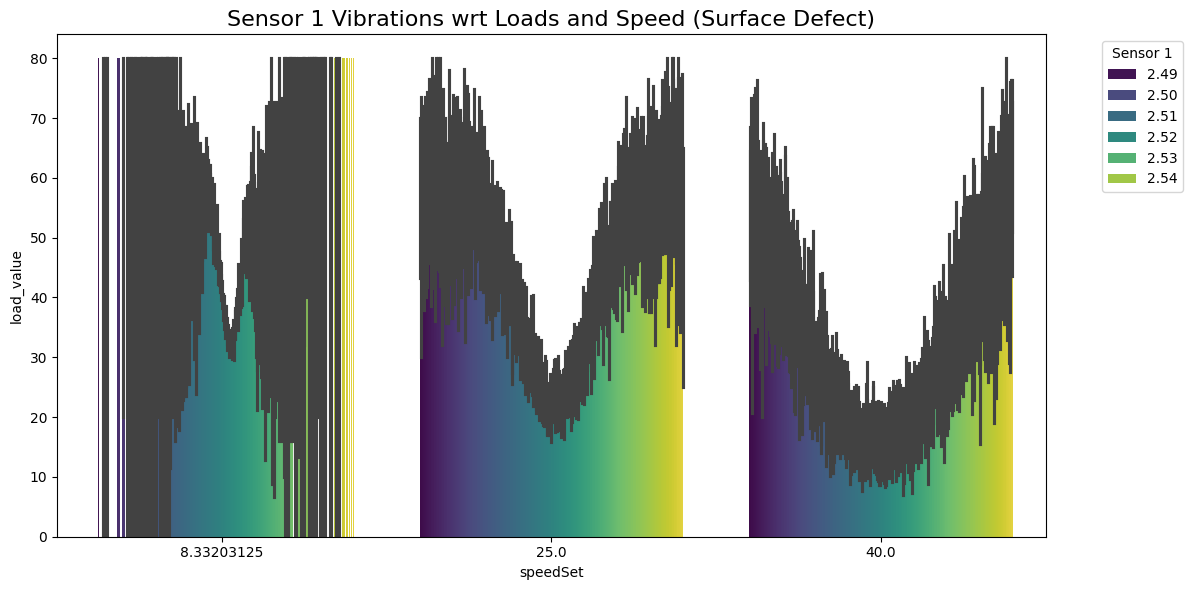

In [ ]:
# Create the bar plot for Surface Defect dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='speedSet', y='load_value', data=cleaned_df_sur, hue='sensor1', palette='viridis')
plt.title('Sensor 1 Vibrations wrt Loads and Speed (Surface Defect)', fontsize=16)
plt.legend(title='Sensor 1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

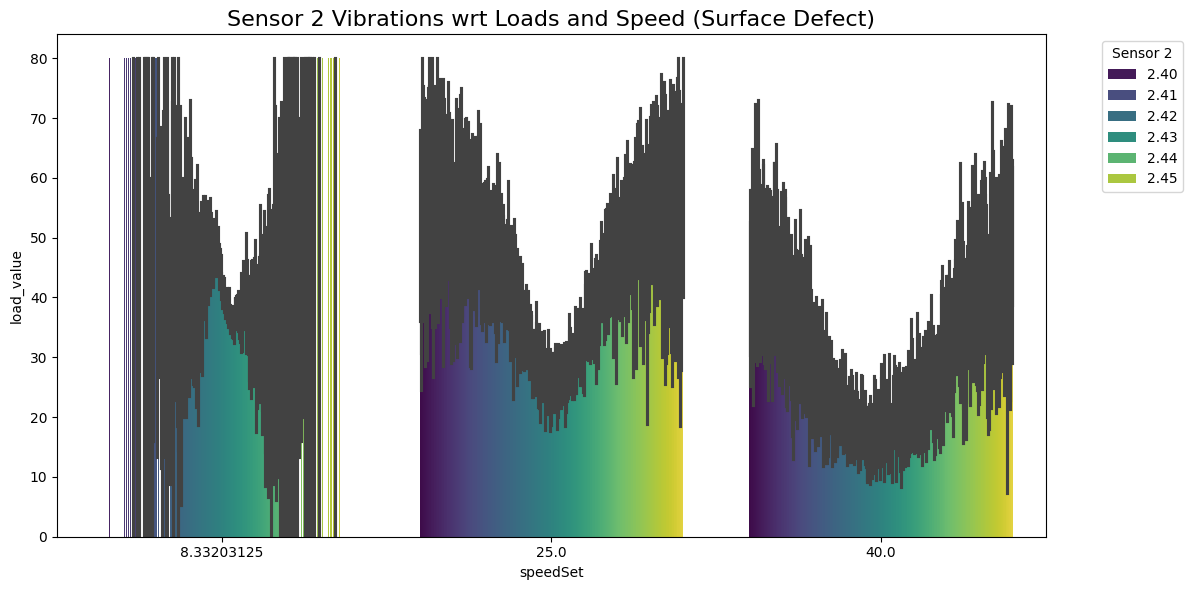

In [ ]:
# Create the bar plot for Surface Defect dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='speedSet', y='load_value', data=cleaned_df_sur, hue='sensor2', palette='viridis')
plt.title('Sensor 2 Vibrations wrt Loads and Speed (Surface Defect)', fontsize=16)
plt.legend(title='Sensor 2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Group by speedSet and calculate summary statistics for sensor1 and sensor2 in the Surface Defect dataset
speed_summary_sur = cleaned_df_sur.groupby('speedSet')[['sensor1', 'sensor2']].agg(['mean', 'median', 'std', 'min', 'max'])
print(speed_summary_sur)

            sensor1                                           sensor2  \
               mean    median       std       min       max      mean   
speedSet                                                                
8.332031   2.519223  2.519194  0.003113  2.488807  2.547446  2.428217   
25.000000  2.518214  2.518373  0.011008  2.488478  2.547446  2.427754   
40.000000  2.517127  2.516895  0.012490  2.488478  2.547446  2.425792   

                                                   
             median       std       min       max  
speedSet                                           
8.332031   2.428196  0.002922  2.397809  2.456120  
25.000000  2.427868  0.010404  2.397481  2.456448  
40.000000  2.425568  0.012584  2.397481  2.456448  


In [ ]:
# Group by load_value and calculate summary statistics for sensor1 and sensor2 in Surface Defect dataset
load_summary_sur = cleaned_df_sur.groupby('load_value')[['sensor1', 'sensor2']].agg(['mean', 'median', 'std', 'min', 'max'])
print(load_summary_sur)

             sensor1                                           sensor2  \
                mean    median       std       min       max      mean   
load_value                                                               
0           2.518375  2.519030  0.008041  2.488478  2.547446  2.427401   
80          2.518307  2.518866  0.010589  2.488478  2.547446  2.427481   

                                                    
              median       std       min       max  
load_value                                          
0           2.428032  0.008303  2.397481  2.456448  
80          2.427868  0.009881  2.397481  2.456448  


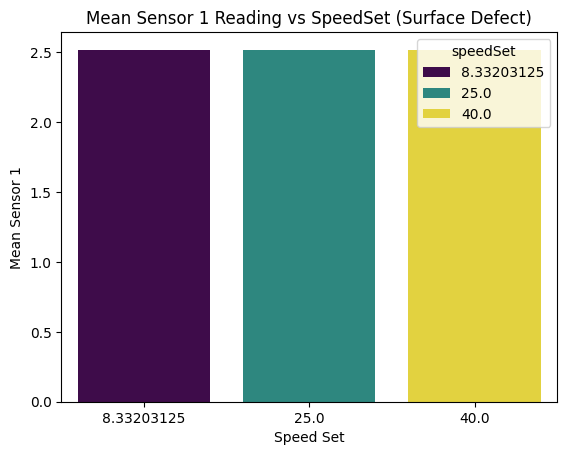

In [ ]:
# Calculate the mean of sensor1 for each speedSet level in Surface Defect dataset
speed_mean_sensor1_sur = cleaned_df_sur.groupby('speedSet')['sensor1'].mean().reset_index()

# Plot the bar chart for Surface Defect dataset
sns.barplot(x='speedSet', y='sensor1', data=speed_mean_sensor1_sur, hue='speedSet', palette='viridis')
plt.title('Mean Sensor 1 Reading vs SpeedSet (Surface Defect)')
plt.xlabel('Speed Set')
plt.ylabel('Mean Sensor 1')
plt.show()

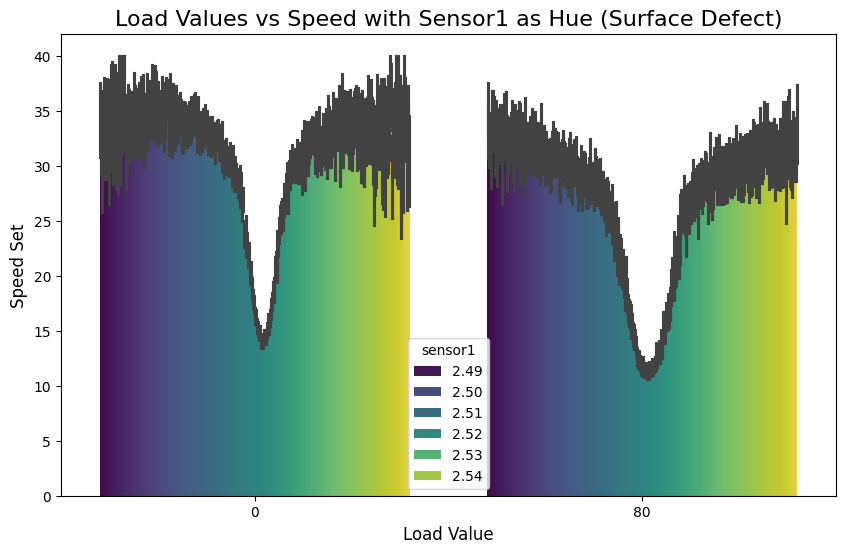

In [ ]:
# Create a bar plot with load_value on the x-axis, speedSet on the y-axis, and sensor1 as hue (color representation)
plt.figure(figsize=(10, 6))
sns.barplot(x='load_value', y='speedSet', hue='sensor1', data=cleaned_df_sur, palette='viridis')
plt.title('Load Values vs Speed with Sensor1 as Hue (Surface Defect)', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Speed Set', fontsize=12)
plt.show()

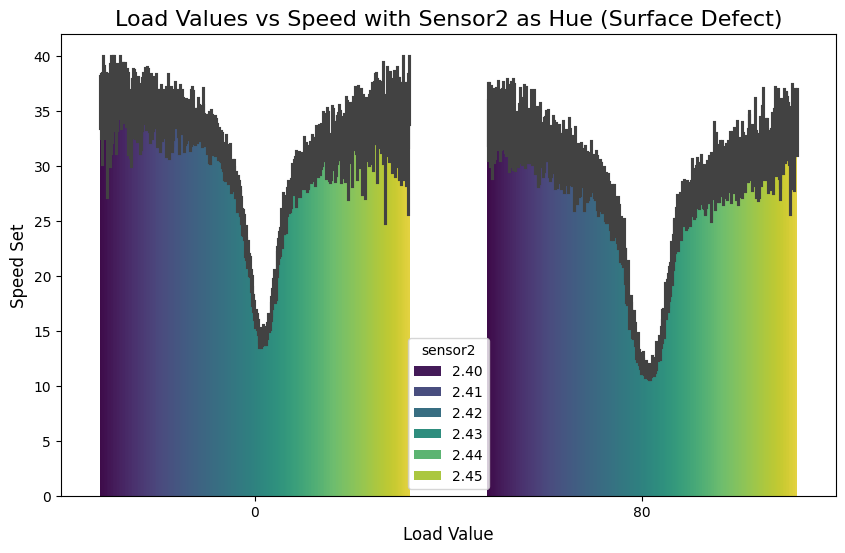

In [ ]:
# Create a bar plot with load_value on the x-axis, speedSet on the y-axis, and sensor2 as hue (color representation)
plt.figure(figsize=(10, 6))
sns.barplot(x='load_value', y='speedSet', hue='sensor2', data=cleaned_df_sur, palette='viridis')
plt.title('Load Values vs Speed with Sensor2 as Hue (Surface Defect)', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Speed Set', fontsize=12)
plt.show()

<ipython-input-200-0758221e9b33>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='load_value', y='sensor1', data=cleaned_df_sur, palette='Set2')


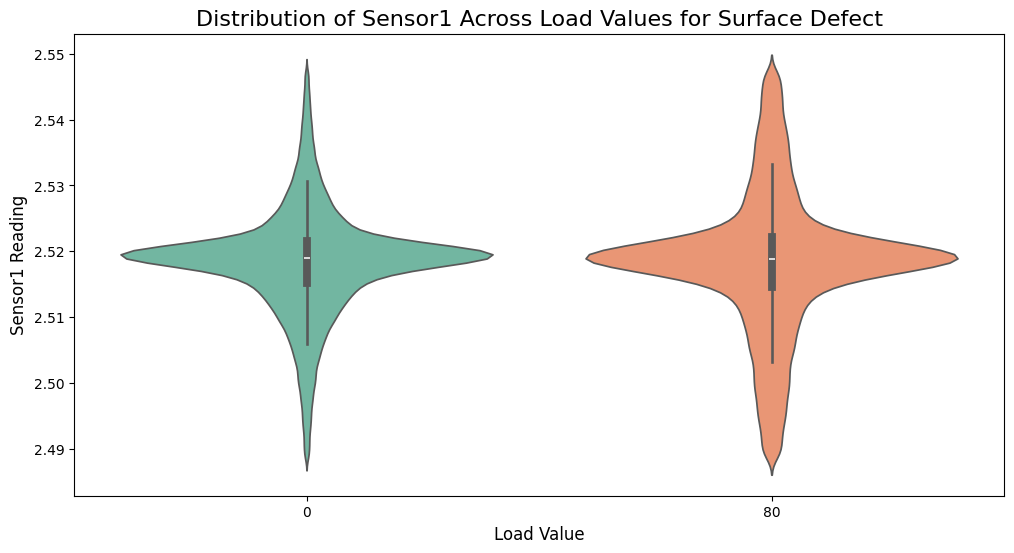

In [ ]:
# Violin plot for sensor1 and load_value (Surface Defect dataset)
plt.figure(figsize=(12, 6))
sns.violinplot(x='load_value', y='sensor1', data=cleaned_df_sur, palette='Set2')
plt.title('Distribution of Sensor1 Across Load Values for Surface Defect', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Sensor1 Reading', fontsize=12)
plt.show()

# Chipped Tooth

In [ ]:
df_tooth.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.518209  2.430496  2023-05-02 15:53:07.000000  8.332031           0   
1  2.517880  2.429839  2023-05-02 15:53:07.000200  8.332031           0   
2  2.516402  2.427211  2023-05-02 15:53:07.000400  8.332031           0   
3  2.518537  2.427704  2023-05-02 15:53:07.000600  8.332031           0   
4  2.518701  2.427539  2023-05-02 15:53:07.000800  8.332031           0   

  gear_fault_desc  
0   chipped tooth  
1   chipped tooth  
2   chipped tooth  
3   chipped tooth  
4   chipped tooth

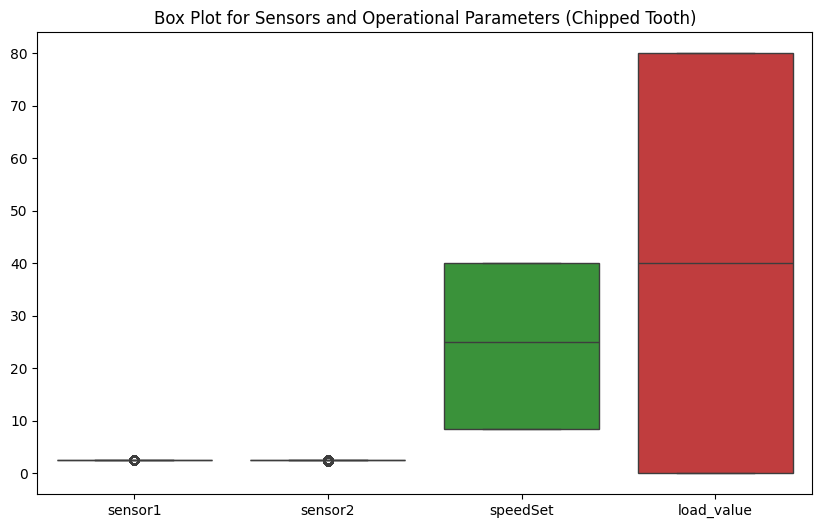

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tooth[['sensor1', 'sensor2', 'speedSet', 'load_value']])
plt.title('Box Plot for Sensors and Operational Parameters (Chipped Tooth)')
plt.show()

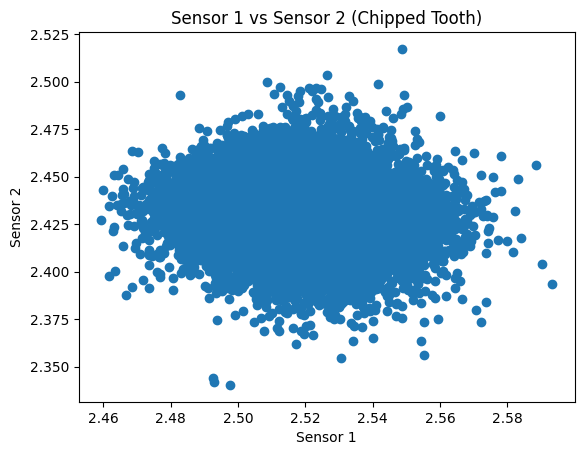

In [ ]:
# Scatter plot between sensor1 and sensor2
plt.scatter(df_tooth['sensor1'], df_tooth['sensor2'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Sensor 1 vs Sensor 2 (Chipped Tooth)')
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1_tooth = df_tooth[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.25)
Q3_tooth = df_tooth[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR_tooth = Q3_tooth - Q1_tooth

# Use a larger multiplier to reduce strictness of outlier bounds
multiplier_tooth = 2.5  # Adjust multiplier for strictness of outlier detection

# Define the bounds for outliers
lower_bound_tooth = Q1_tooth - multiplier_tooth * IQR_tooth
upper_bound_tooth = Q3_tooth + multiplier_tooth * IQR_tooth

# Check how many outliers exist for each column before removal
print("Outliers before removal (count per column):")
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    outliers_column_tooth = (df_tooth[column] < lower_bound_tooth[column]) | (df_tooth[column] > upper_bound_tooth[column])
    num_outliers_column_tooth = outliers_column_tooth.sum()
    print(f"{column}: {num_outliers_column_tooth} outliers")

# Filter the data to keep only the rows where the values are within the bounds for each column individually
cleaned_df_tooth = df_tooth.copy()

# Apply the filter column by column
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    cleaned_df_tooth = cleaned_df_tooth[(cleaned_df_tooth[column] >= lower_bound_tooth[column]) & (cleaned_df_tooth[column] <= upper_bound_tooth[column])]

# Drop rows with NaN values
cleaned_df_tooth = cleaned_df_tooth.dropna()

# Count the number of rows removed
num_rows_removed_tooth = len(df_tooth) - len(cleaned_df_tooth)

# Count the number of outliers removed
outliers_condition_tooth = (df_tooth[['sensor1', 'sensor2', 'speedSet', 'load_value']] < lower_bound_tooth) | (df_tooth[['sensor1', 'sensor2', 'speedSet', 'load_value']] > upper_bound_tooth)
num_outliers_tooth = outliers_condition_tooth.any(axis=1).sum()

# Print the number of outliers and rows removed
print(f"\nNumber of outliers removed: {num_outliers_tooth}")
print(f"Number of rows removed: {num_rows_removed_tooth}")

Outliers before removal (count per column):
sensor1: 8877 outliers
sensor2: 7503 outliers
speedSet: 0 outliers
load_value: 0 outliers

Number of outliers removed: 14555
Number of rows removed: 14555


In [ ]:
cleaned_df_tooth.shape

(135445, 6)

In [ ]:
cleaned_df_tooth.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.518209  2.430496  2023-05-02 15:53:07.000000  8.332031           0   
1  2.517880  2.429839  2023-05-02 15:53:07.000200  8.332031           0   
2  2.516402  2.427211  2023-05-02 15:53:07.000400  8.332031           0   
3  2.518537  2.427704  2023-05-02 15:53:07.000600  8.332031           0   
4  2.518701  2.427539  2023-05-02 15:53:07.000800  8.332031           0   

  gear_fault_desc  
0   chipped tooth  
1   chipped tooth  
2   chipped tooth  
3   chipped tooth  
4   chipped tooth

In [ ]:
cleaned_df_tooth.describe()

sensor1        sensor2       speedSet     load_value
count  135445.000000  135445.000000  135445.000000  135445.000000
mean        2.519020       2.428458      23.033494      36.321164
std         0.005398       0.005247      12.707900      39.830615
min         2.502440       2.411771       8.332031       0.000000
25%         2.516730       2.426061       8.332031       0.000000
50%         2.519030       2.428525      25.000000       0.000000
75%         2.521494       2.430989      40.000000      80.000000
max         2.535784       2.445115      40.000000      80.000000

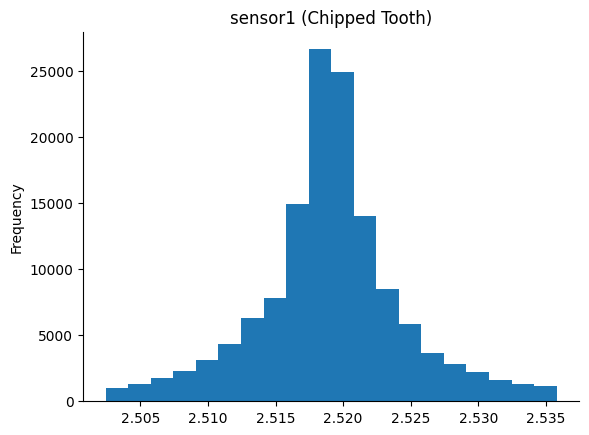

In [ ]:
# Histogram for sensor1
cleaned_df_tooth['sensor1'].plot(kind='hist', bins=20, title='sensor1 (Chipped Tooth)')
plt.gca().spines[['top', 'right']].set_visible(False)

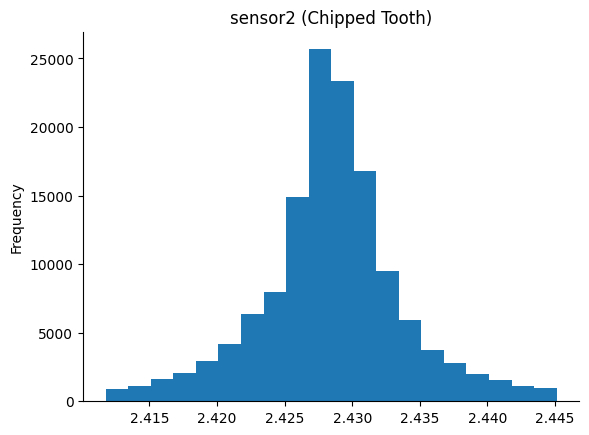

In [ ]:
# Histogram for sensor2
cleaned_df_tooth['sensor2'].plot(kind='hist', bins=20, title='sensor2 (Chipped Tooth)')
plt.gca().spines[['top', 'right']].set_visible(False)

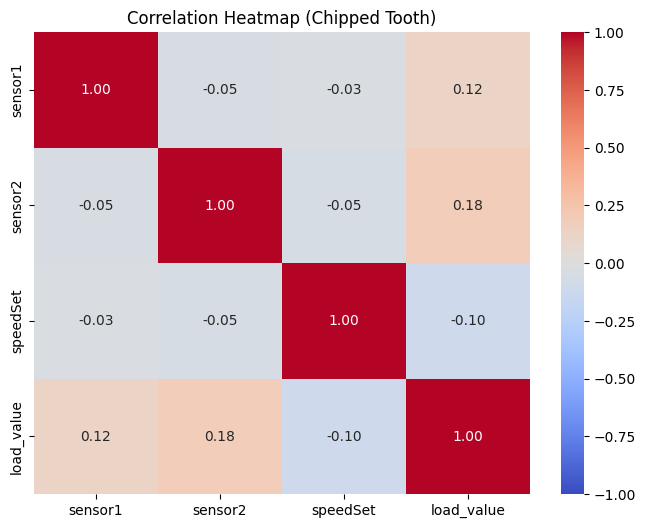

In [ ]:
# Correlation matrix for Chipped Tooth dataset
numerical_cols_tooth = ['sensor1', 'sensor2', 'speedSet', 'load_value']
corr_matrix_tooth = cleaned_df_tooth[numerical_cols_tooth].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_tooth, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Chipped Tooth)")
plt.show()

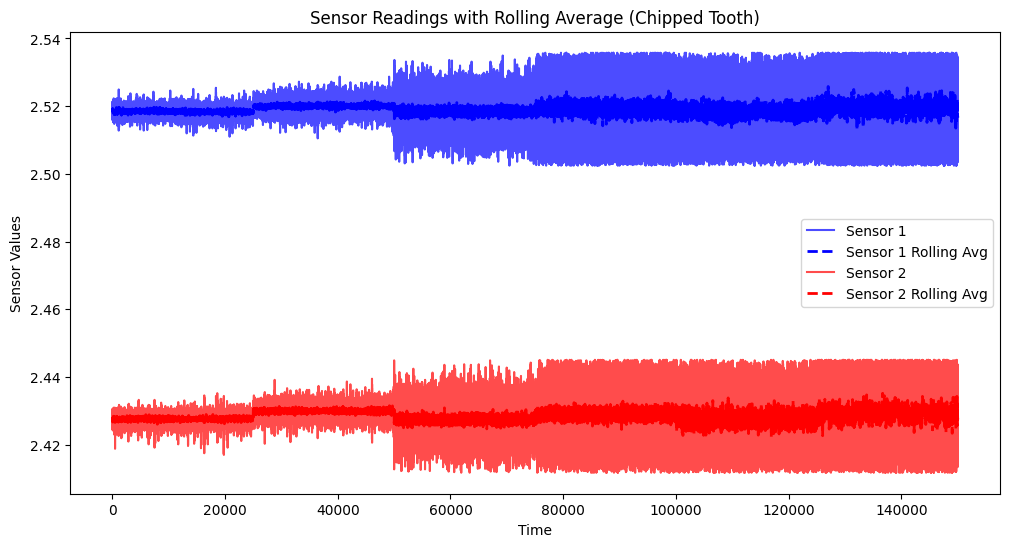

In [ ]:
# Rolling average for sensor1 and sensor2 (for Chipped Tooth data)
cleaned_df_tooth['sensor1_rolling_avg'] = cleaned_df_tooth['sensor1'].rolling(window=24).mean()
cleaned_df_tooth['sensor2_rolling_avg'] = cleaned_df_tooth['sensor2'].rolling(window=24).mean()

# Plot rolling averages
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_tooth['sensor1'], label='Sensor 1', color='b', alpha=0.7)
plt.plot(cleaned_df_tooth['sensor1_rolling_avg'], label='Sensor 1 Rolling Avg', color='b', linestyle='--', linewidth=2)
plt.plot(cleaned_df_tooth['sensor2'], label='Sensor 2', color='r', alpha=0.7)
plt.plot(cleaned_df_tooth['sensor2_rolling_avg'], label='Sensor 2 Rolling Avg', color='r', linestyle='--', linewidth=2)
plt.title("Sensor Readings with Rolling Average (Chipped Tooth)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

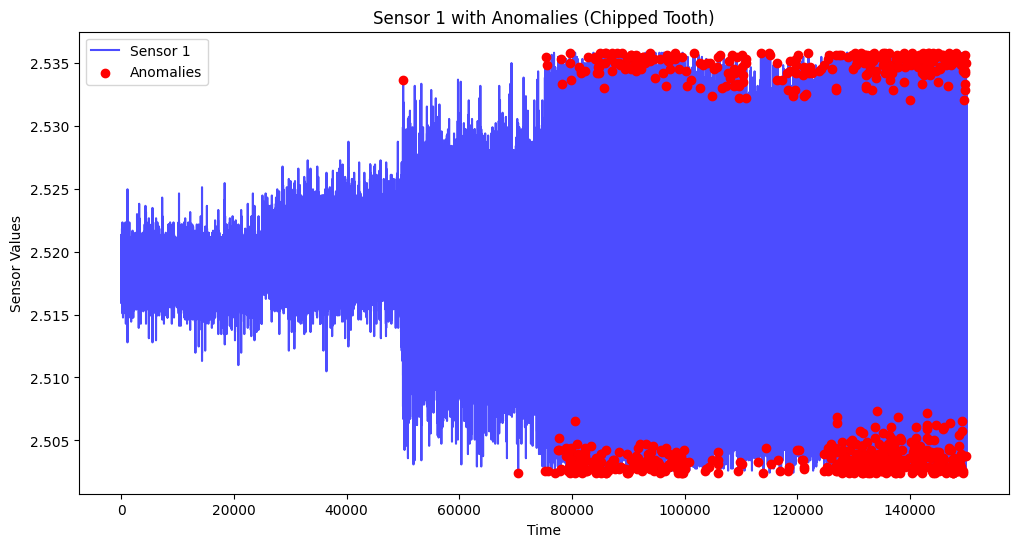

In [ ]:
threshold = 3  # Number of standard deviations from the mean

# Detect anomalies for sensor1 and sensor2 (Chipped Tooth dataset)
cleaned_df_tooth['sensor1_anomaly'] = (cleaned_df_tooth['sensor1'] - cleaned_df_tooth['sensor1'].rolling(window=24).mean()).abs() > threshold * cleaned_df_tooth['sensor1'].std()
cleaned_df_tooth['sensor2_anomaly'] = (cleaned_df_tooth['sensor2'] - cleaned_df_tooth['sensor2'].rolling(window=24).mean()).abs() > threshold * cleaned_df_tooth['sensor2'].std()

# Plot anomalies for Sensor 1 (Chipped Tooth)
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_tooth['sensor1'], label='Sensor 1', color='b', alpha=0.7)
plt.scatter(cleaned_df_tooth.index[cleaned_df_tooth['sensor1_anomaly']], cleaned_df_tooth['sensor1'][cleaned_df_tooth['sensor1_anomaly']], color='r', label='Anomalies', zorder=5)
plt.title("Sensor 1 with Anomalies (Chipped Tooth)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

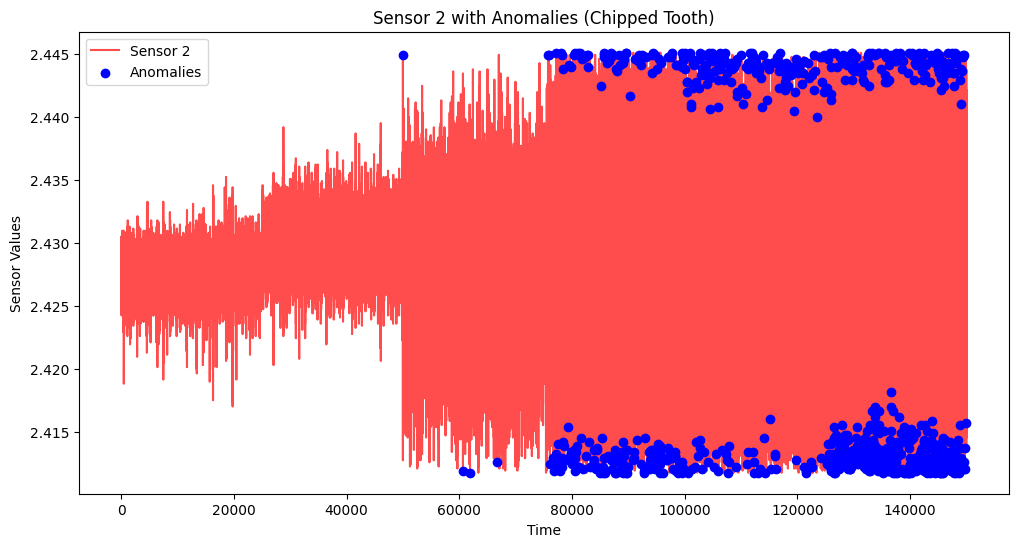

In [ ]:
# Similarly for Sensor 2 (Chipped Tooth)
plt.figure(figsize=(12, 6))
plt.plot(cleaned_df_tooth['sensor2'], label='Sensor 2', color='r', alpha=0.7)
plt.scatter(cleaned_df_tooth.index[cleaned_df_tooth['sensor2_anomaly']], cleaned_df_tooth['sensor2'][cleaned_df_tooth['sensor2_anomaly']], color='b', label='Anomalies', zorder=5)
plt.title("Sensor 2 with Anomalies (Chipped Tooth)")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.legend(loc='best')
plt.show()

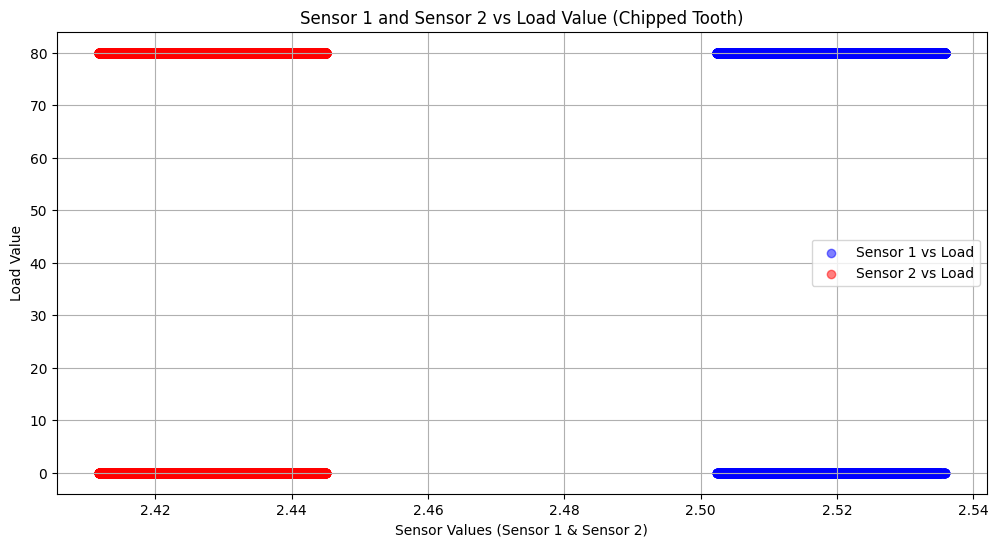

In [ ]:
# Scatter plot of sensor1 vs load_value for Chipped Tooth dataset
plt.figure(figsize=(12, 6))
plt.scatter(cleaned_df_tooth['sensor1'], cleaned_df_tooth['load_value'], color='b', alpha=0.5, label='Sensor 1 vs Load')
plt.scatter(cleaned_df_tooth['sensor2'], cleaned_df_tooth['load_value'], color='r', alpha=0.5, label='Sensor 2 vs Load')
plt.title("Sensor 1 and Sensor 2 vs Load Value (Chipped Tooth)")
plt.xlabel("Sensor Values (Sensor 1 & Sensor 2)")
plt.ylabel("Load Value")
plt.legend(loc='best')
plt.grid(True)
plt.show()

<ipython-input-215-89d14b36224a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='load_value', data=cleaned_df_tooth, palette='viridis')


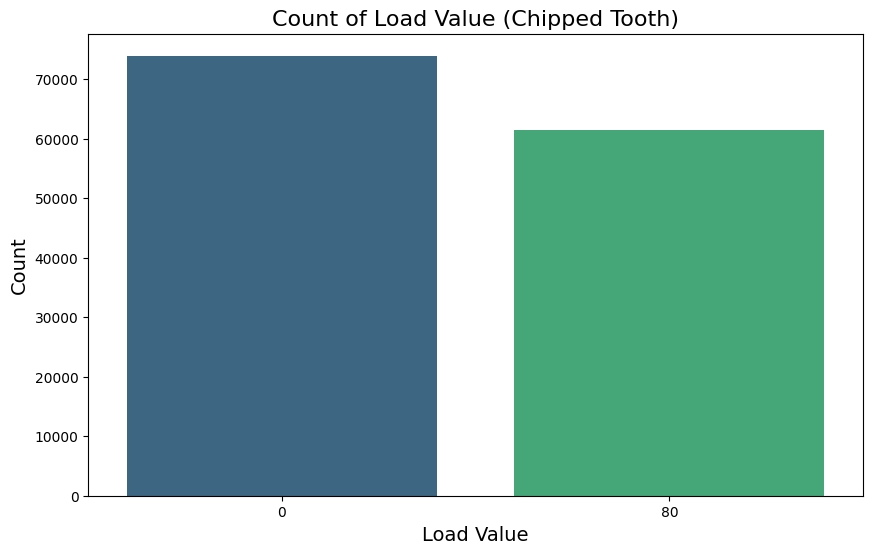

In [ ]:
# Count plot for load_value in Chipped Tooth data
plt.figure(figsize=(10, 6))
sns.countplot(x='load_value', data=cleaned_df_tooth, palette='viridis')
plt.title('Count of Load Value (Chipped Tooth)', fontsize=16)
plt.xlabel('Load Value', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

<ipython-input-216-9d91a6f85845>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='speedSet', data=cleaned_df_tooth, palette='viridis')


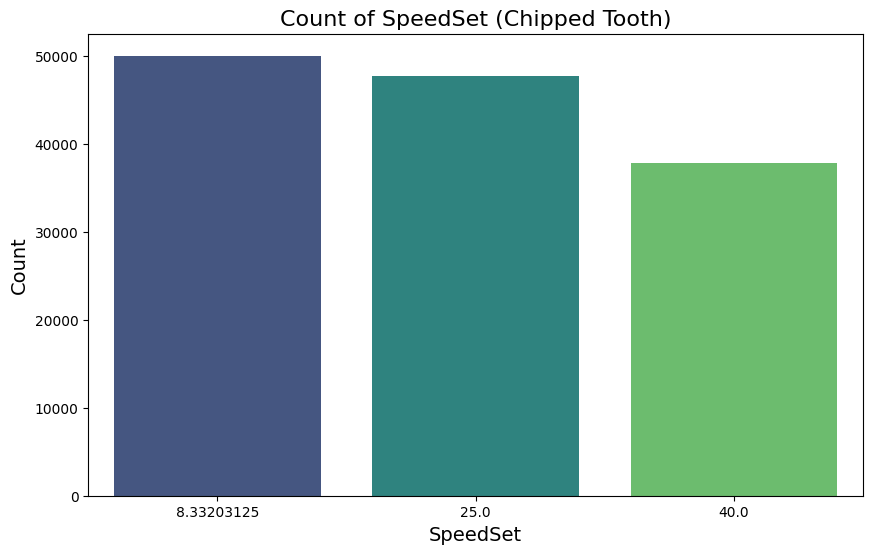

In [ ]:
# Count plot for speedSet in Chipped Tooth data
plt.figure(figsize=(10, 6))
sns.countplot(x='speedSet', data=cleaned_df_tooth, palette='viridis')
plt.title('Count of SpeedSet (Chipped Tooth)', fontsize=16)
plt.xlabel('SpeedSet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

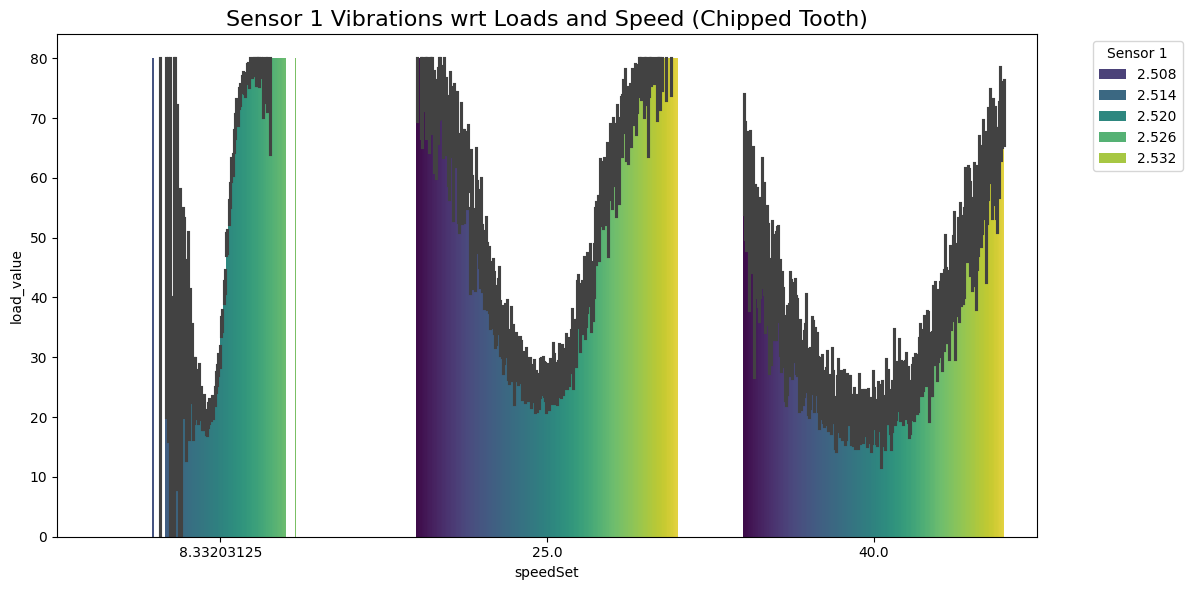

In [ ]:
# Create the bar plot for Chipped Tooth dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='speedSet', y='load_value', data=cleaned_df_tooth, hue='sensor1', palette='viridis')
plt.title('Sensor 1 Vibrations wrt Loads and Speed (Chipped Tooth)', fontsize=16)
plt.legend(title='Sensor 1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

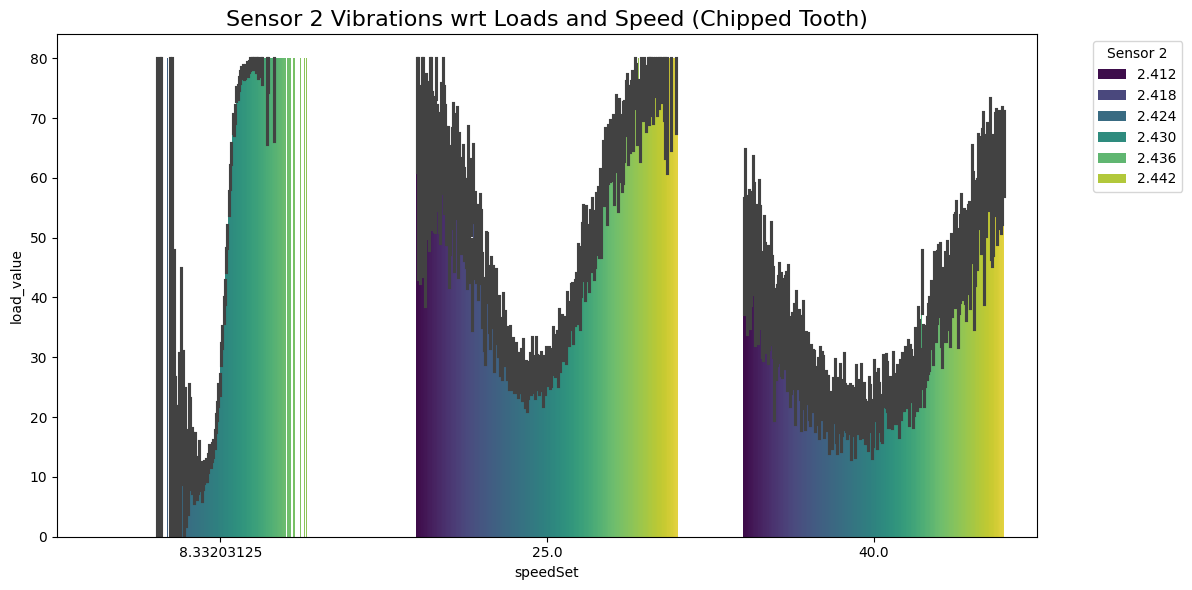

In [ ]:
# Create the bar plot for Chipped Tooth dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='speedSet', y='load_value', data=cleaned_df_tooth, hue='sensor2', palette='viridis')
plt.title('Sensor 2 Vibrations wrt Loads and Speed (Chipped Tooth)', fontsize=16)
plt.legend(title='Sensor 2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Group by speedSet and calculate summary statistics for sensor1 and sensor2 in the Chipped Tooth dataset
speed_summary_tooth = cleaned_df_tooth.groupby('speedSet')[['sensor1', 'sensor2']].agg(['mean', 'median', 'std', 'min', 'max'])
print(speed_summary_tooth)

            sensor1                                           sensor2  \
               mean    median       std       min       max      mean   
speedSet                                                                
8.332031   2.519220  2.519030  0.001775  2.510489  2.528721  2.428824   
25.000000  2.518913  2.518866  0.005970  2.502440  2.535784  2.428250   
40.000000  2.518893  2.518701  0.007433  2.502440  2.535784  2.428236   

                                                   
             median       std       min       max  
speedSet                                           
8.332031   2.428689  0.001941  2.417027  2.439530  
25.000000  2.428032  0.005564  2.411771  2.445115  
40.000000  2.428032  0.007373  2.411771  2.445115  


In [ ]:
# Group by load_value and calculate summary statistics for sensor1 and sensor2 in Chipped Tooth dataset
load_summary_tooth = cleaned_df_tooth.groupby('load_value')[['sensor1', 'sensor2']].agg(['mean', 'median', 'std', 'min', 'max'])
print(load_summary_tooth)

             sensor1                                          sensor2  \
                mean    median       std      min       max      mean   
load_value                                                              
0           2.518428  2.518373  0.004433  2.50244  2.535784  2.427582   
80          2.519732  2.519851  0.006295  2.50244  2.535784  2.429511   

                                                    
              median       std       min       max  
load_value                                          
0           2.427704  0.004484  2.411771  2.445115  
80          2.429839  0.005868  2.411771  2.445115  


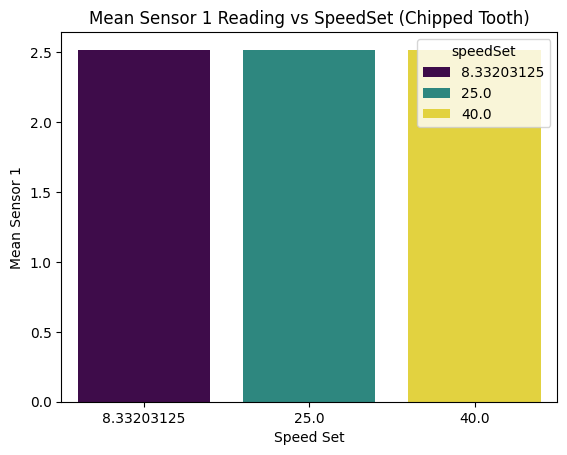

In [ ]:
# Calculate the mean of sensor1 for each speedSet level in Chipped Tooth dataset
speed_mean_sensor1_tooth = cleaned_df_tooth.groupby('speedSet')['sensor1'].mean().reset_index()

# Plot the bar chart for Chipped Tooth dataset
sns.barplot(x='speedSet', y='sensor1', data=speed_mean_sensor1_tooth, hue='speedSet', palette='viridis')
plt.title('Mean Sensor 1 Reading vs SpeedSet (Chipped Tooth)')
plt.xlabel('Speed Set')
plt.ylabel('Mean Sensor 1')
plt.show()

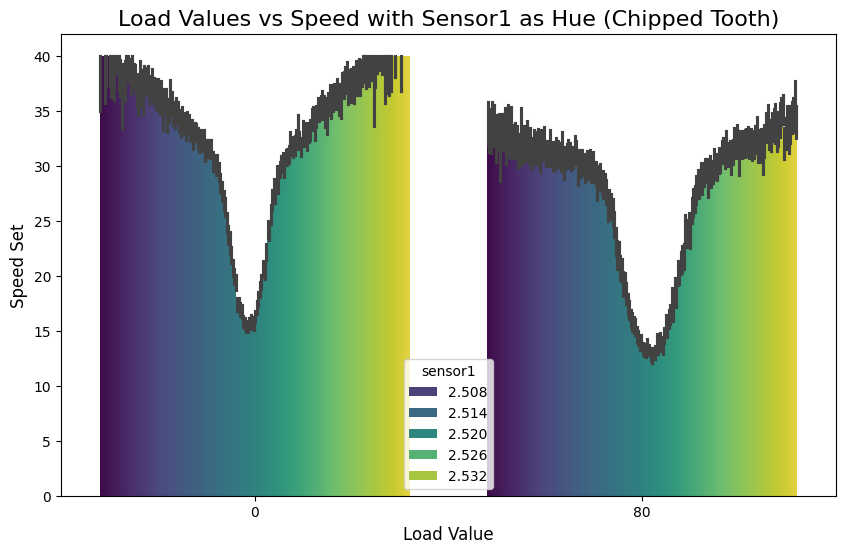

In [ ]:
# Create a bar plot with load_value on the x-axis, speedSet on the y-axis, and sensor1 as hue (color representation)
plt.figure(figsize=(10, 6))
sns.barplot(x='load_value', y='speedSet', hue='sensor1', data=cleaned_df_tooth, palette='viridis')
plt.title('Load Values vs Speed with Sensor1 as Hue (Chipped Tooth)', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Speed Set', fontsize=12)
plt.show()

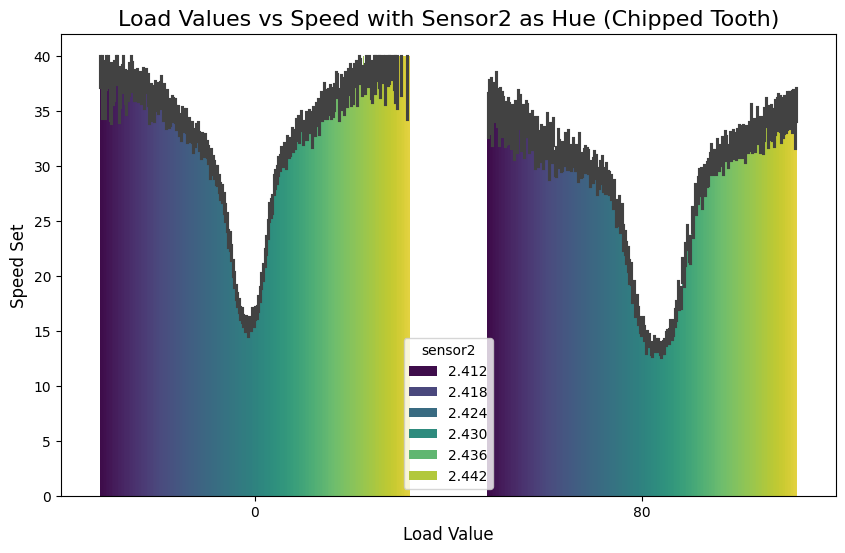

In [ ]:
# Create a bar plot with load_value on the x-axis, speedSet on the y-axis, and sensor2 as hue (color representation)
plt.figure(figsize=(10, 6))
sns.barplot(x='load_value', y='speedSet', hue='sensor2', data=cleaned_df_tooth, palette='viridis')
plt.title('Load Values vs Speed with Sensor2 as Hue (Chipped Tooth)', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Speed Set', fontsize=12)
plt.show()

<ipython-input-224-00220822cffd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='load_value', y='sensor1', data=cleaned_df_tooth, palette='Set2')


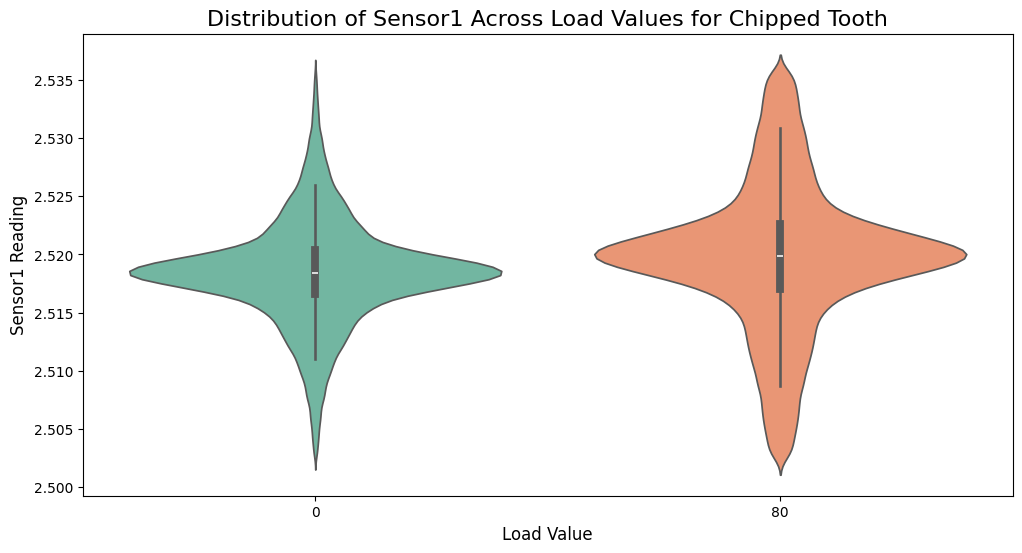

In [ ]:
# Violin plot for sensor1 and load_value (Chipped Tooth dataset)
plt.figure(figsize=(12, 6))
sns.violinplot(x='load_value', y='sensor1', data=cleaned_df_tooth, palette='Set2')
plt.title('Distribution of Sensor1 Across Load Values for Chipped Tooth', fontsize=16)
plt.xlabel('Load Value', fontsize=12)
plt.ylabel('Sensor1 Reading', fontsize=12)
plt.show()

# Merge Data Together

In [ ]:


# Assuming all your cleaned DataFrames are stored as variables:
dfs = [df_ecc, df_miss, df_no, df_root, df_sur, df_tooth]

# Concatenate all DataFrames along rows (axis=0)
merged_df = pd.concat(dfs, axis=0, ignore_index=True)

# Optionally, reset index to have a continuous index
merged_df.reset_index(drop=True, inplace=True)

# Show the shape and the first few rows of the merged DataFrame
print(merged_df.shape)
merged_df.head()


(900000, 6)


sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.522315  2.431974  2023-05-03 20:31:39.000000  8.332031           0   
1  2.523629  2.431317  2023-05-03 20:31:39.000200  8.332031           0   
2  2.522644  2.428032  2023-05-03 20:31:39.000400  8.332031           0   
3  2.521987  2.430660  2023-05-03 20:31:39.000600  8.332031           0   
4  2.522808  2.430168  2023-05-03 20:31:39.000800  8.332031           0   

  gear_fault_desc  
0    eccentricity  
1    eccentricity  
2    eccentricity  
3    eccentricity  
4    eccentricity

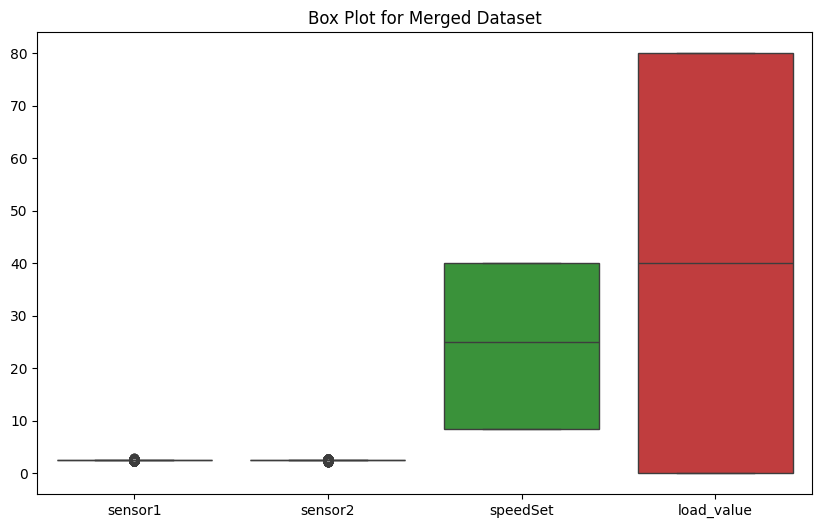

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[['sensor1', 'sensor2', 'speedSet', 'load_value']])
plt.title('Box Plot for Merged Dataset')
plt.show()

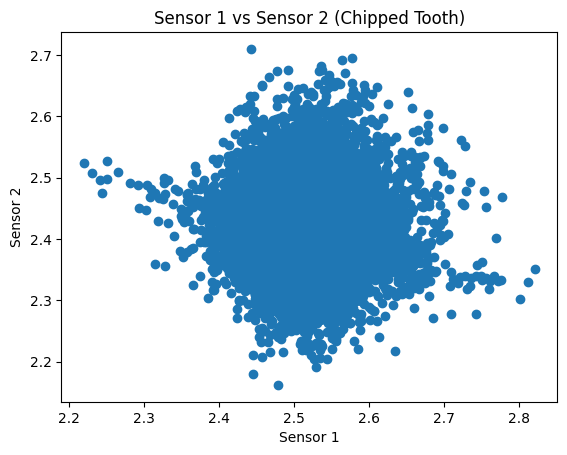

In [ ]:
# Scatter plot between sensor1 and sensor2
plt.scatter(merged_df['sensor1'], merged_df['sensor2'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Sensor 1 vs Sensor 2 (Merged)')
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1_merged = merged_df[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.25)
Q3_merged = merged_df[['sensor1', 'sensor2', 'speedSet', 'load_value']].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR_merged = Q3_merged - Q1_merged

# Use a larger multiplier to reduce strictness of outlier bounds
multiplier_merged = 2.5  # Adjust multiplier for strictness of outlier detection

# Define the bounds for outliers
lower_bound_merged = Q1_merged - multiplier_merged * IQR_merged
upper_bound_merged = Q3_merged + multiplier_merged * IQR_merged

# Check how many outliers exist for each column before removal
print("Outliers before removal (count per column):")
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    outliers_column_merged = (merged_df[column] < lower_bound_merged[column]) | (merged_df[column] > upper_bound_merged[column])
    num_outliers_column_merged = outliers_column_merged.sum()
    print(f"{column}: {num_outliers_column_merged} outliers")

# Filter the data to keep only the rows where the values are within the bounds for each column individually
cleaned_df_merged = merged_df.copy()

# Apply the filter column by column
for column in ['sensor1', 'sensor2', 'speedSet', 'load_value']:
    cleaned_df_merged = cleaned_df_merged[(cleaned_df_merged[column] >= lower_bound_merged[column]) & (cleaned_df_merged[column] <= upper_bound_merged[column])]

# Drop rows with NaN values
cleaned_df_merged = cleaned_df_merged.dropna()

# Count the number of rows removed
num_rows_removed_merged = len(merged_df) - len(cleaned_df_merged)

# Count the number of outliers removed
outliers_condition_merged = (merged_df[['sensor1', 'sensor2', 'speedSet', 'load_value']] < lower_bound_merged) | (merged_df[['sensor1', 'sensor2', 'speedSet', 'load_value']] > upper_bound_merged)
num_outliers_merged = outliers_condition_merged.any(axis=1).sum()

# Print the number of outliers and rows removed
print(f"\nNumber of outliers removed: {num_outliers_merged}")
print(f"Number of rows removed: {num_rows_removed_merged}")

# Show the shape of the cleaned dataset
print(f"Cleaned dataset shape: {cleaned_df_merged.shape}")


Outliers before removal (count per column):
sensor1: 60702 outliers
sensor2: 57904 outliers
speedSet: 0 outliers
load_value: 0 outliers

Number of outliers removed: 97096
Number of rows removed: 97096
Cleaned dataset shape: (802904, 6)


In [ ]:
merged_df.describe()

sensor1        sensor2       speedSet     load_value
count  900000.000000  900000.000000  900000.000000  900000.000000
mean        2.519877       2.429291      24.444010      40.000000
std         0.011236       0.012001      12.934378      40.000022
min         2.219428       2.161939       8.332031       0.000000
25%         2.516895       2.426390       8.332031       0.000000
50%         2.520180       2.429839      25.000000      40.000000
75%         2.522972       2.432303      40.000000      80.000000
max         2.820934       2.709896      40.000000      80.000000

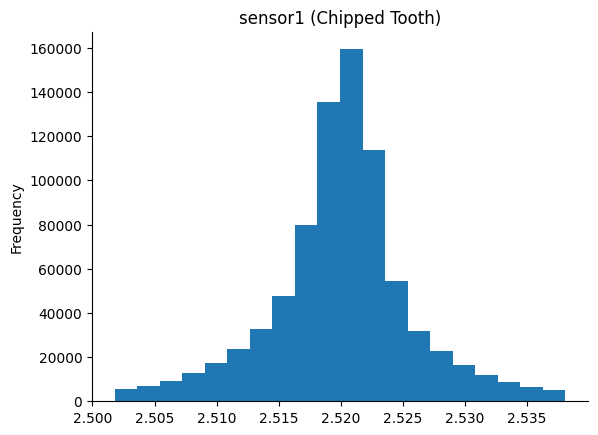

In [ ]:
# Histogram for sensor1
cleaned_df_merged['sensor1'].plot(kind='hist', bins=20, title='sensor1 (Chipped Tooth)')
plt.gca().spines[['top', 'right']].set_visible(False)

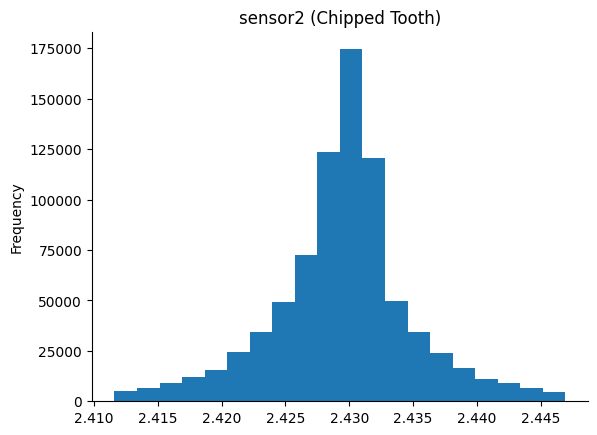

In [ ]:
# Histogram for sensor1
cleaned_df_merged['sensor2'].plot(kind='hist', bins=20, title='sensor2 (Chipped Tooth)')
plt.gca().spines[['top', 'right']].set_visible(False)

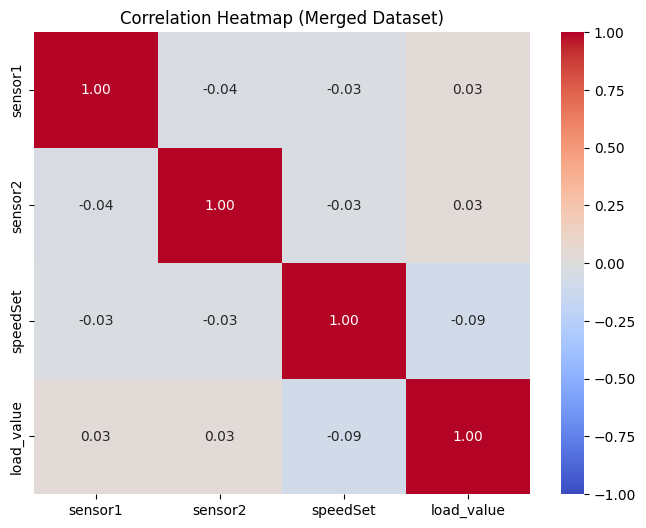

In [ ]:
# Correlation matrix for merged dataset
numerical_cols_merged = ['sensor1', 'sensor2', 'speedSet', 'load_value']
corr_matrix_merged = cleaned_df_merged[numerical_cols_merged].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_merged, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Merged Dataset)")
plt.show()


<ipython-input-270-cff40dba588c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gear_fault_desc', data=cleaned_df_merged, palette='viridis')


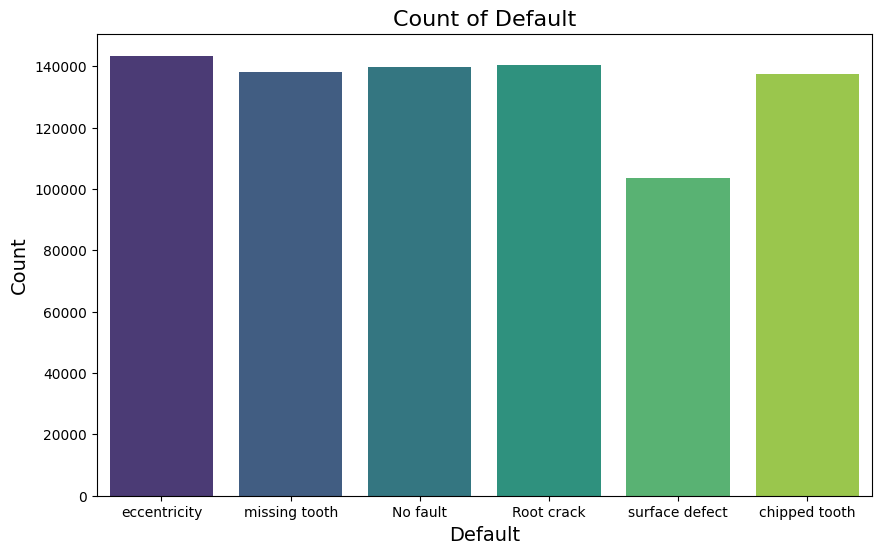

In [ ]:
# Count plot for Gear Fault
plt.figure(figsize=(10, 6))
sns.countplot(x='gear_fault_desc', data=cleaned_df_merged, palette='viridis')
plt.title('Count of Default', fontsize=16)
plt.xlabel('Default', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

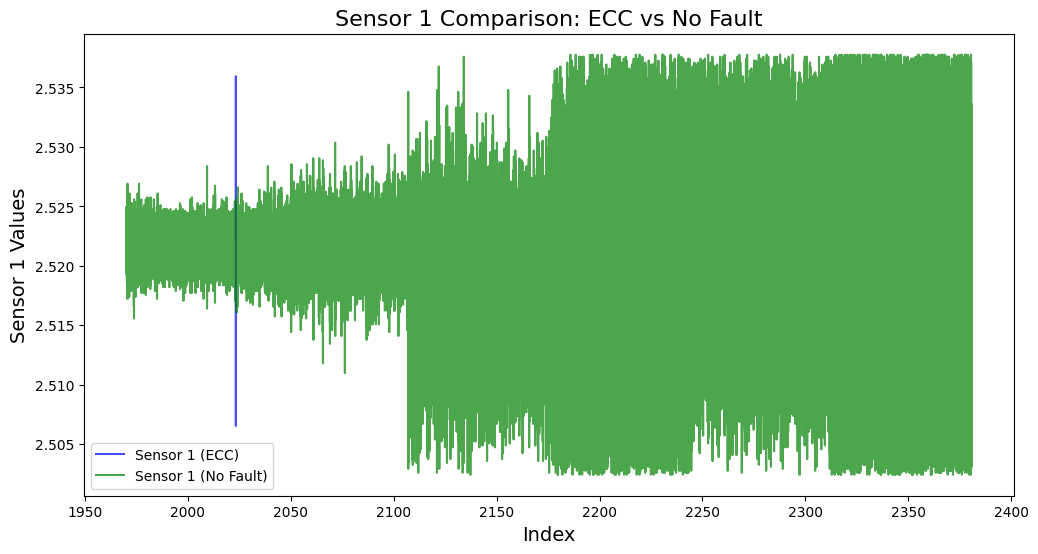

In [ ]:
# Plot sensor1 from both cleaned_df_ecc and cleaned_df_no

plt.figure(figsize=(12, 6))

# Plot sensor1 from cleaned_df_ecc
plt.plot(cleaned_df_ecc['sensor1'], label='Sensor 1 (ECC)', color='b', alpha=0.7)

# Plot sensor1 from cleaned_df_no
plt.plot(cleaned_df_no['sensor1'], label='Sensor 1 (No Fault)', color='g', alpha=0.7)

# Add labels and title
plt.title('Sensor 1 Comparison: ECC vs No Fault', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Sensor 1 Values', fontsize=14)

# Add a legend to differentiate between the two datasets
plt.legend(loc='best')

# Display the plot
plt.show()


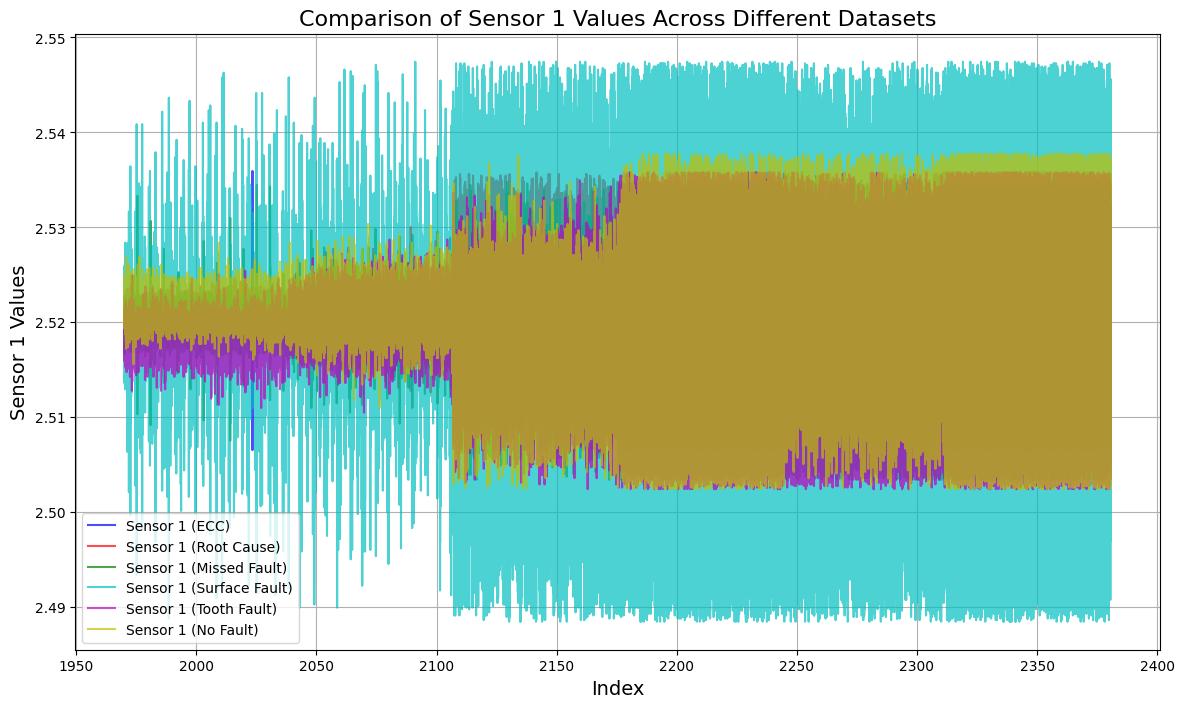

In [ ]:
# Plot sensor1 from multiple datasets for comparison
plt.figure(figsize=(14, 8))

# Plot sensor1 from cleaned_df_ecc
plt.plot(cleaned_df_ecc['sensor1'], label='Sensor 1 (ECC)', color='b', alpha=0.7)

# Plot sensor1 from cleaned_df_root
plt.plot(cleaned_df_root['sensor1'], label='Sensor 1 (Root Cause)', color='r', alpha=0.7)

# Plot sensor1 from cleaned_df_miss
plt.plot(cleaned_df_miss['sensor1'], label='Sensor 1 (Missed Fault)', color='g', alpha=0.7)

# Plot sensor1 from cleaned_df_sur
plt.plot(cleaned_df_sur['sensor1'], label='Sensor 1 (Surface Fault)', color='c', alpha=0.7)

# Plot sensor1 from cleaned_df_tooth
plt.plot(cleaned_df_tooth['sensor1'], label='Sensor 1 (Tooth Fault)', color='m', alpha=0.7)

# Plot sensor1 from cleaned_df_no
plt.plot(cleaned_df_no['sensor1'], label='Sensor 1 (No Fault)', color='y', alpha=0.7)

# Add labels and title
plt.title('Comparison of Sensor 1 Values Across Different Datasets', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Sensor 1 Values', fontsize=14)

# Add a legend to differentiate between the datasets
plt.legend(loc='best')

# Display the plot
plt.grid(True)
plt.show()


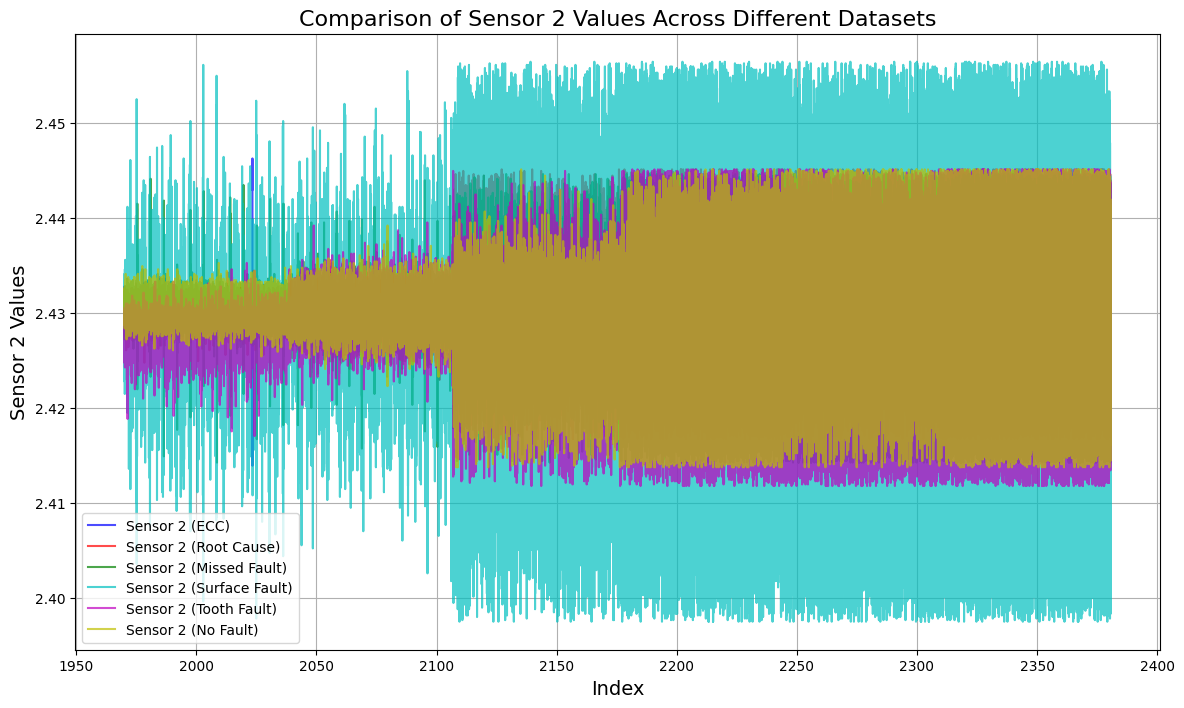

In [ ]:
# Plot sensor2 from multiple datasets for comparison
plt.figure(figsize=(14, 8))

# Plot sensor2 from cleaned_df_ecc
plt.plot(cleaned_df_ecc['sensor2'], label='Sensor 2 (ECC)', color='b', alpha=0.7)

# Plot sensor2 from cleaned_df_root
plt.plot(cleaned_df_root['sensor2'], label='Sensor 2 (Root Cause)', color='r', alpha=0.7)

# Plot sensor2 from cleaned_df_miss
plt.plot(cleaned_df_miss['sensor2'], label='Sensor 2 (Missed Fault)', color='g', alpha=0.7)

# Plot sensor2 from cleaned_df_sur
plt.plot(cleaned_df_sur['sensor2'], label='Sensor 2 (Surface Fault)', color='c', alpha=0.7)

# Plot sensor2 from cleaned_df_tooth
plt.plot(cleaned_df_tooth['sensor2'], label='Sensor 2 (Tooth Fault)', color='m', alpha=0.7)

# Plot sensor2 from cleaned_df_no
plt.plot(cleaned_df_no['sensor2'], label='Sensor 2 (No Fault)', color='y', alpha=0.7)

# Add labels and title
plt.title('Comparison of Sensor 2 Values Across Different Datasets', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Sensor 2 Values', fontsize=14)

# Add a legend to differentiate between the datasets
plt.legend(loc='best')

# Display the plot
plt.grid(True)
plt.show()


TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

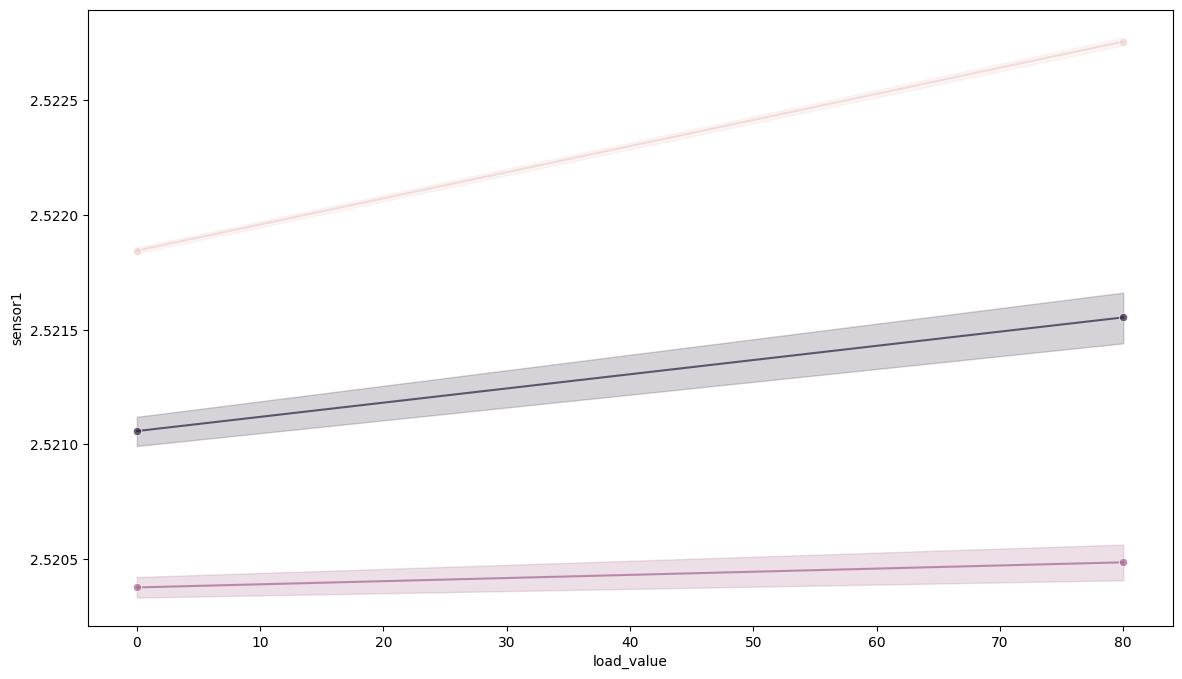

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot Sensor 1 for comparison with 'load_value' as x-axis and 'speedSet' as hue
plt.figure(figsize=(14, 8))

# Plot sensor1 from cleaned_df_ecc
sns.lineplot(data=cleaned_df_ecc, x='load_value', y='sensor1', label='Sensor 1 (ECC)', hue='speedSet', marker='o', linestyle='-', alpha=0.7)

# Plot sensor1 from cleaned_df_root
sns.lineplot(data=cleaned_df_root, x='load_value', y='sensor1', label='Sensor 1 (Root Cause)', hue='speedSet', marker='o', linestyle='-', alpha=0.7)

# Plot sensor1 from cleaned_df_miss
sns.lineplot(data=cleaned_df_miss, x='load_value', y='sensor1', label='Sensor 1 (Missed Fault)', hue='speedSet', marker='o', linestyle='-', alpha=0.7)

# Plot sensor1 from cleaned_df_sur
sns.lineplot(data=cleaned_df_sur, x='load_value', y='sensor1', label='Sensor 1 (Surface Fault)', hue='speedSet', marker='o', linestyle='-', alpha=0.7)

# Plot sensor1 from cleaned_df_tooth
sns.lineplot(data=cleaned_df_tooth, x='load_value', y='sensor1', label='Sensor 1 (Tooth Fault)', hue='speedSet', marker='o', linestyle='-', alpha=0.7)

# Plot sensor1 from cleaned_df_no
sns.lineplot(data=cleaned_df_no, x='load_value', y='sensor1', label='Sensor 1 (No Fault)', hue='speedSet', marker='o', linestyle='-', alpha=0.7)

# Add labels and title
plt.title('Comparison of Sensor 1 Across Different Fault Types with Load Value and SpeedSet', fontsize=16)
plt.xlabel('Load Value', fontsize=14)
plt.ylabel('Sensor 1 Values', fontsize=14)

# Add a legend to differentiate between the datasets
plt.legend(title='Fault Type', loc='best')

# Display the plot
plt.grid(True)
plt.show()





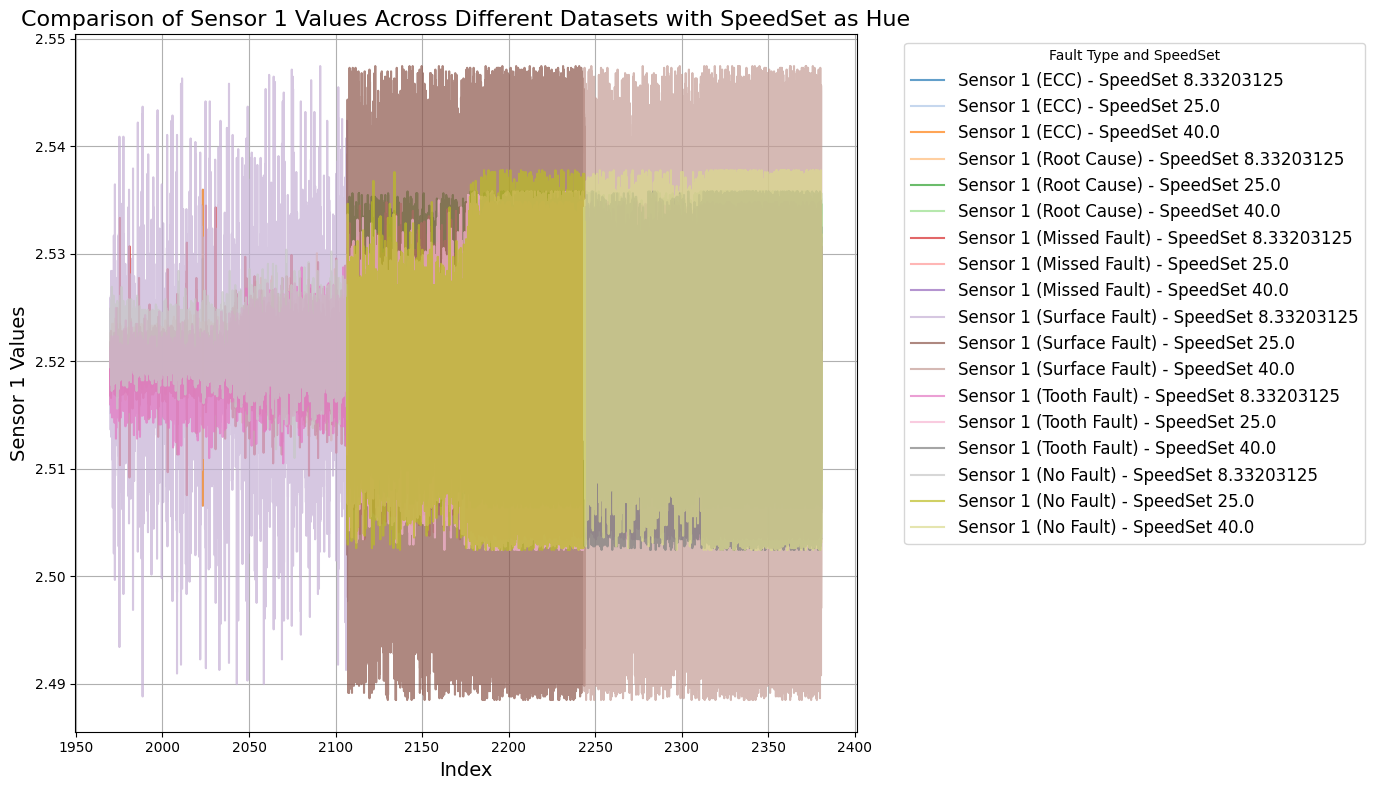

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a unique color palette with 18 colors (6 fault types * 3 speedSets)
speedSet_values = cleaned_df_no['speedSet'].unique()
datasets = ['ecc', 'root', 'miss', 'sur', 'tooth', 'no']
colors = sns.color_palette("tab20", n_colors=len(datasets) * len(speedSet_values))  # Using a color palette with 20 colors

# Create a dictionary to map fault types and speedSets to specific colors
color_map = {}
for idx, fault in enumerate(datasets):
    for jdx, speed in enumerate(speedSet_values):
        color_map[f"{fault}_{speed}"] = colors[idx * len(speedSet_values) + jdx]

# Plot sensor1 from multiple datasets for comparison with hue as speedSet
plt.figure(figsize=(14, 8))

# Plot sensor1 from cleaned_df_ecc
for idx, speed in enumerate(speedSet_values):
    subset = cleaned_df_ecc[cleaned_df_ecc['speedSet'] == speed]
    plt.plot(subset.index, subset['sensor1'], label=f'Sensor 1 (ECC) - SpeedSet {speed}',
             color=color_map[f'ecc_{speed}'], alpha=0.7)

# Plot sensor1 from cleaned_df_root
for idx, speed in enumerate(speedSet_values):
    subset = cleaned_df_root[cleaned_df_root['speedSet'] == speed]
    plt.plot(subset.index, subset['sensor1'], label=f'Sensor 1 (Root Cause) - SpeedSet {speed}',
             color=color_map[f'root_{speed}'], alpha=0.7)

# Plot sensor1 from cleaned_df_miss
for idx, speed in enumerate(speedSet_values):
    subset = cleaned_df_miss[cleaned_df_miss['speedSet'] == speed]
    plt.plot(subset.index, subset['sensor1'], label=f'Sensor 1 (Missed Fault) - SpeedSet {speed}',
             color=color_map[f'miss_{speed}'], alpha=0.7)

# Plot sensor1 from cleaned_df_sur
for idx, speed in enumerate(speedSet_values):
    subset = cleaned_df_sur[cleaned_df_sur['speedSet'] == speed]
    plt.plot(subset.index, subset['sensor1'], label=f'Sensor 1 (Surface Fault) - SpeedSet {speed}',
             color=color_map[f'sur_{speed}'], alpha=0.7)

# Plot sensor1 from cleaned_df_tooth
for idx, speed in enumerate(speedSet_values):
    subset = cleaned_df_tooth[cleaned_df_tooth['speedSet'] == speed]
    plt.plot(subset.index, subset['sensor1'], label=f'Sensor 1 (Tooth Fault) - SpeedSet {speed}',
             color=color_map[f'tooth_{speed}'], alpha=0.7)

# Plot sensor1 from cleaned_df_no
for idx, speed in enumerate(speedSet_values):
    subset = cleaned_df_no[cleaned_df_no['speedSet'] == speed]
    plt.plot(subset.index, subset['sensor1'], label=f'Sensor 1 (No Fault) - SpeedSet {speed}',
             color=color_map[f'no_{speed}'], alpha=0.7)

# Add labels and title
plt.title('Comparison of Sensor 1 Values Across Different Datasets with SpeedSet as Hue', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Sensor 1 Values', fontsize=14)

# Adjust legend to be outside the plot
plt.legend(title='Fault Type and SpeedSet', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

# Display the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()


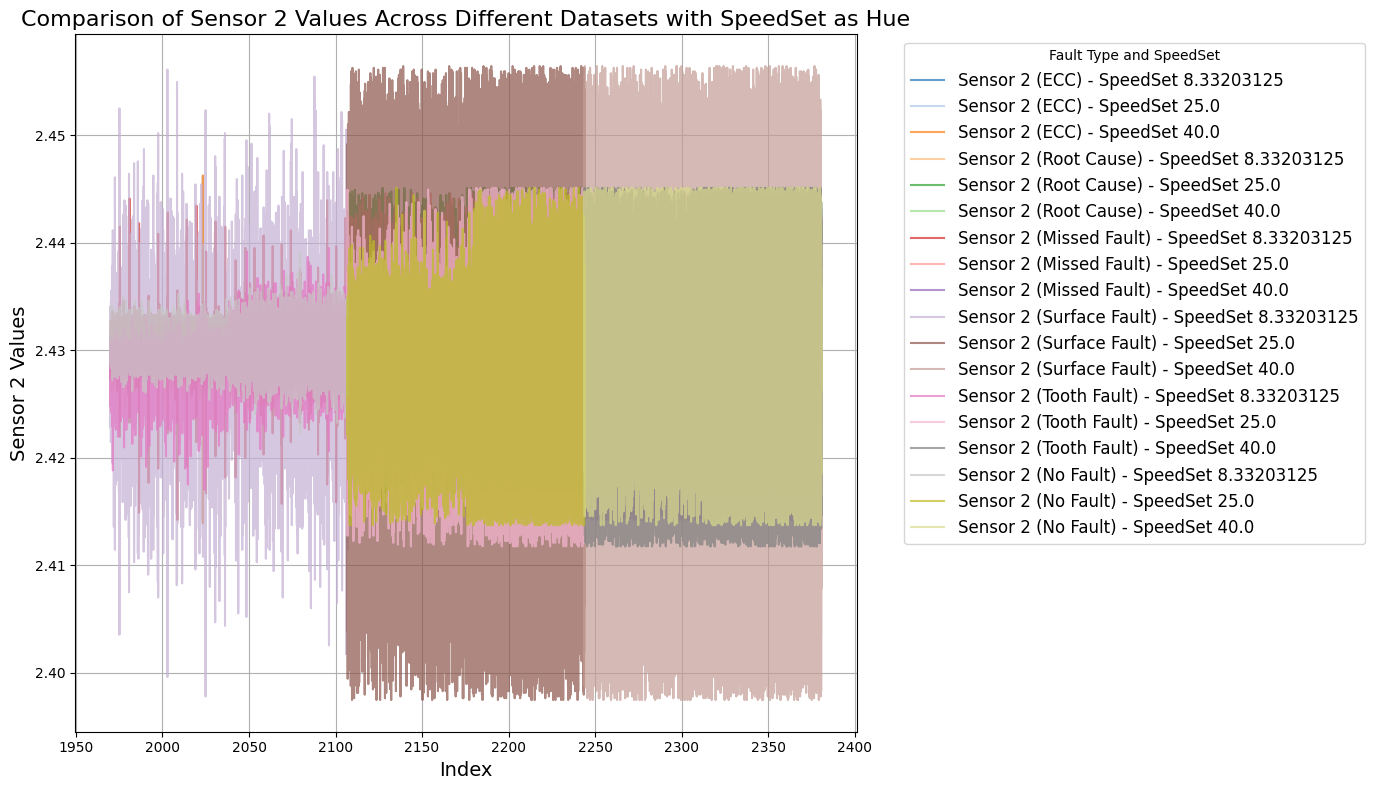

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse the color palette and color mapping already defined
# Using the same color_map created in the previous step

# Plot sensor2 from multiple datasets for comparison with hue as speedSet
plt.figure(figsize=(14, 8))

# Plot sensor2 from cleaned_df_ecc
for idx, speed in enumerate(speedSet_values):
    subset = cleaned_df_ecc[cleaned_df_ecc['speedSet'] == speed]
    plt.plot(subset.index, subset['sensor2'], label=f'Sensor 2 (ECC) - SpeedSet {speed}',
             color=color_map[f'ecc_{speed}'], alpha=0.7)

# Plot sensor2 from cleaned_df_root
for idx, speed in enumerate(speedSet_values):
    subset = cleaned_df_root[cleaned_df_root['speedSet'] == speed]
    plt.plot(subset.index, subset['sensor2'], label=f'Sensor 2 (Root Cause) - SpeedSet {speed}',
             color=color_map[f'root_{speed}'], alpha=0.7)

# Plot sensor2 from cleaned_df_miss
for idx, speed in enumerate(speedSet_values):
    subset = cleaned_df_miss[cleaned_df_miss['speedSet'] == speed]
    plt.plot(subset.index, subset['sensor2'], label=f'Sensor 2 (Missed Fault) - SpeedSet {speed}',
             color=color_map[f'miss_{speed}'], alpha=0.7)

# Plot sensor2 from cleaned_df_sur
for idx, speed in enumerate(speedSet_values):
    subset = cleaned_df_sur[cleaned_df_sur['speedSet'] == speed]
    plt.plot(subset.index, subset['sensor2'], label=f'Sensor 2 (Surface Fault) - SpeedSet {speed}',
             color=color_map[f'sur_{speed}'], alpha=0.7)

# Plot sensor2 from cleaned_df_tooth
for idx, speed in enumerate(speedSet_values):
    subset = cleaned_df_tooth[cleaned_df_tooth['speedSet'] == speed]
    plt.plot(subset.index, subset['sensor2'], label=f'Sensor 2 (Tooth Fault) - SpeedSet {speed}',
             color=color_map[f'tooth_{speed}'], alpha=0.7)

# Plot sensor2 from cleaned_df_no
for idx, speed in enumerate(speedSet_values):
    subset = cleaned_df_no[cleaned_df_no['speedSet'] == speed]
    plt.plot(subset.index, subset['sensor2'], label=f'Sensor 2 (No Fault) - SpeedSet {speed}',
             color=color_map[f'no_{speed}'], alpha=0.7)

# Add labels and title
plt.title('Comparison of Sensor 2 Values Across Different Datasets with SpeedSet as Hue', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Sensor 2 Values', fontsize=14)

# Adjust legend to be outside the plot
plt.legend(title='Fault Type and SpeedSet', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

# Display the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()


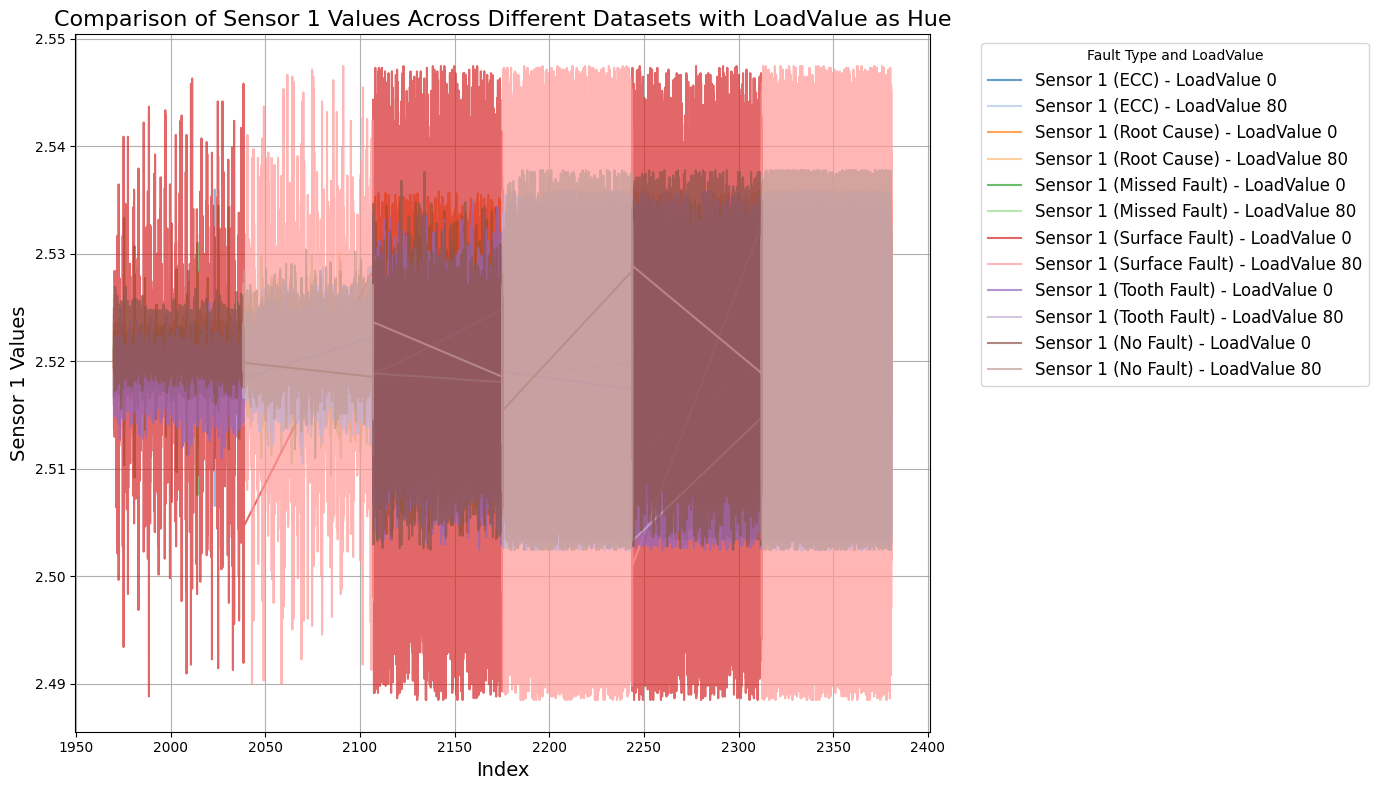

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a unique color palette with 18 colors (6 fault types * 3 load_values)
load_value_values = cleaned_df_no['load_value'].unique()  # Assuming 'load_value' is the column you're interested in
datasets = ['ecc', 'root', 'miss', 'sur', 'tooth', 'no']
colors = sns.color_palette("tab20", n_colors=len(datasets) * len(load_value_values))  # Using a color palette with 20 colors

# Create a dictionary to map fault types and load_values to specific colors
color_map = {}
for idx, fault in enumerate(datasets):
    for jdx, load_value in enumerate(load_value_values):
        color_map[f"{fault}_{load_value}"] = colors[idx * len(load_value_values) + jdx]

# Plot sensor1 from multiple datasets for comparison with hue as load_value
plt.figure(figsize=(14, 8))

# Plot sensor1 from cleaned_df_ecc
for idx, load_value in enumerate(load_value_values):
    subset = cleaned_df_ecc[cleaned_df_ecc['load_value'] == load_value]
    plt.plot(subset.index, subset['sensor1'], label=f'Sensor 1 (ECC) - LoadValue {load_value}',
             color=color_map[f'ecc_{load_value}'], alpha=0.7)

# Plot sensor1 from cleaned_df_root
for idx, load_value in enumerate(load_value_values):
    subset = cleaned_df_root[cleaned_df_root['load_value'] == load_value]
    plt.plot(subset.index, subset['sensor1'], label=f'Sensor 1 (Root Cause) - LoadValue {load_value}',
             color=color_map[f'root_{load_value}'], alpha=0.7)

# Plot sensor1 from cleaned_df_miss
for idx, load_value in enumerate(load_value_values):
    subset = cleaned_df_miss[cleaned_df_miss['load_value'] == load_value]
    plt.plot(subset.index, subset['sensor1'], label=f'Sensor 1 (Missed Fault) - LoadValue {load_value}',
             color=color_map[f'miss_{load_value}'], alpha=0.7)

# Plot sensor1 from cleaned_df_sur
for idx, load_value in enumerate(load_value_values):
    subset = cleaned_df_sur[cleaned_df_sur['load_value'] == load_value]
    plt.plot(subset.index, subset['sensor1'], label=f'Sensor 1 (Surface Fault) - LoadValue {load_value}',
             color=color_map[f'sur_{load_value}'], alpha=0.7)

# Plot sensor1 from cleaned_df_tooth
for idx, load_value in enumerate(load_value_values):
    subset = cleaned_df_tooth[cleaned_df_tooth['load_value'] == load_value]
    plt.plot(subset.index, subset['sensor1'], label=f'Sensor 1 (Tooth Fault) - LoadValue {load_value}',
             color=color_map[f'tooth_{load_value}'], alpha=0.7)

# Plot sensor1 from cleaned_df_no
for idx, load_value in enumerate(load_value_values):
    subset = cleaned_df_no[cleaned_df_no['load_value'] == load_value]
    plt.plot(subset.index, subset['sensor1'], label=f'Sensor 1 (No Fault) - LoadValue {load_value}',
             color=color_map[f'no_{load_value}'], alpha=0.7)

# Add labels and title
plt.title('Comparison of Sensor 1 Values Across Different Datasets with LoadValue as Hue', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Sensor 1 Values', fontsize=14)

# Adjust legend to be outside the plot
plt.legend(title='Fault Type and LoadValue', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

# Display the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()



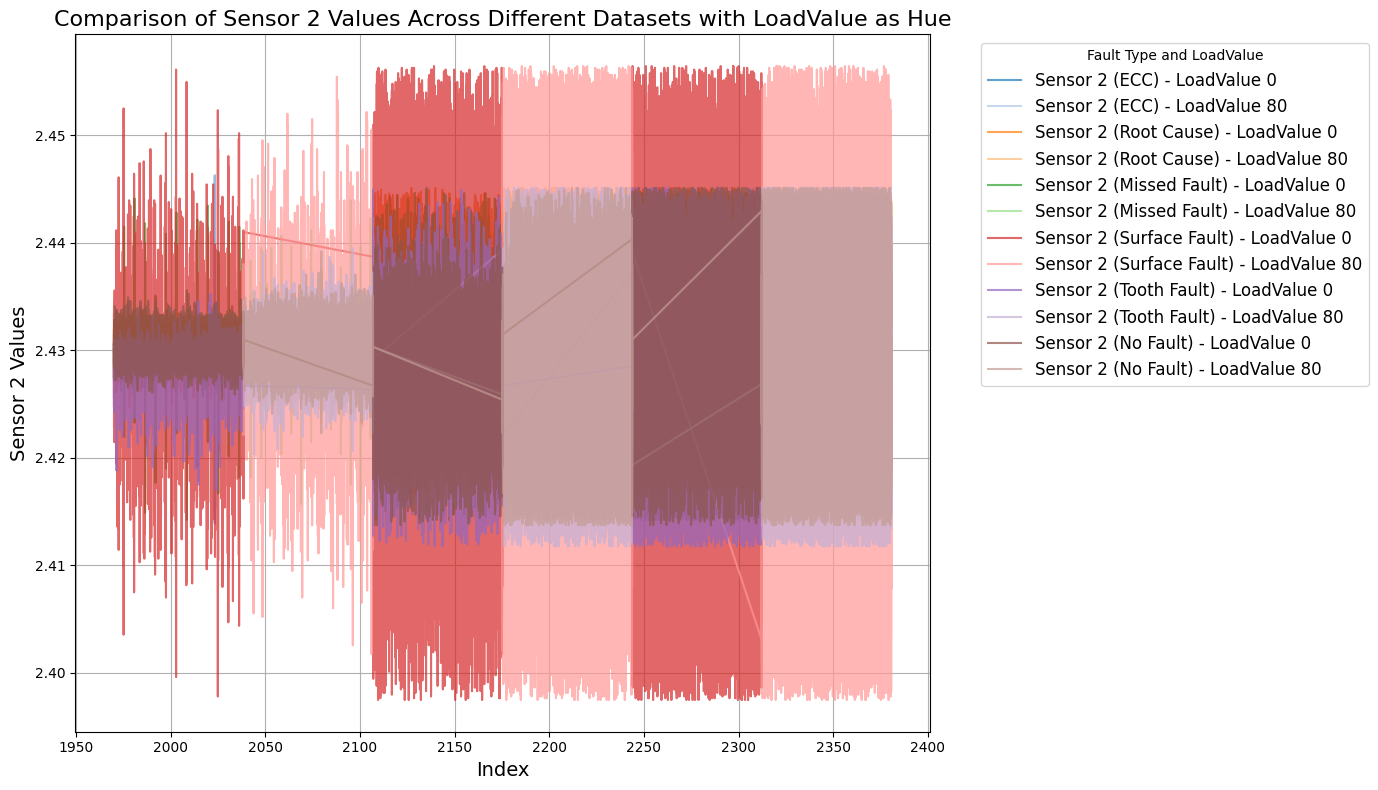

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a unique color palette with 18 colors (6 fault types * 3 load_values)
load_value_values = cleaned_df_no['load_value'].unique()  # Assuming 'load_value' is the column you're interested in
datasets = ['ecc', 'root', 'miss', 'sur', 'tooth', 'no']
colors = sns.color_palette("tab20", n_colors=len(datasets) * len(load_value_values))  # Using a color palette with 20 colors

# Create a dictionary to map fault types and load_values to specific colors
color_map = {}
for idx, fault in enumerate(datasets):
    for jdx, load_value in enumerate(load_value_values):
        color_map[f"{fault}_{load_value}"] = colors[idx * len(load_value_values) + jdx]

# Plot sensor2 from multiple datasets for comparison with hue as load_value
plt.figure(figsize=(14, 8))

# Plot sensor2 from cleaned_df_ecc
for idx, load_value in enumerate(load_value_values):
    subset = cleaned_df_ecc[cleaned_df_ecc['load_value'] == load_value]
    plt.plot(subset.index, subset['sensor2'], label=f'Sensor 2 (ECC) - LoadValue {load_value}',
             color=color_map[f'ecc_{load_value}'], alpha=0.7)

# Plot sensor2 from cleaned_df_root
for idx, load_value in enumerate(load_value_values):
    subset = cleaned_df_root[cleaned_df_root['load_value'] == load_value]
    plt.plot(subset.index, subset['sensor2'], label=f'Sensor 2 (Root Cause) - LoadValue {load_value}',
             color=color_map[f'root_{load_value}'], alpha=0.7)

# Plot sensor2 from cleaned_df_miss
for idx, load_value in enumerate(load_value_values):
    subset = cleaned_df_miss[cleaned_df_miss['load_value'] == load_value]
    plt.plot(subset.index, subset['sensor2'], label=f'Sensor 2 (Missed Fault) - LoadValue {load_value}',
             color=color_map[f'miss_{load_value}'], alpha=0.7)

# Plot sensor2 from cleaned_df_sur
for idx, load_value in enumerate(load_value_values):
    subset = cleaned_df_sur[cleaned_df_sur['load_value'] == load_value]
    plt.plot(subset.index, subset['sensor2'], label=f'Sensor 2 (Surface Fault) - LoadValue {load_value}',
             color=color_map[f'sur_{load_value}'], alpha=0.7)

# Plot sensor2 from cleaned_df_tooth
for idx, load_value in enumerate(load_value_values):
    subset = cleaned_df_tooth[cleaned_df_tooth['load_value'] == load_value]
    plt.plot(subset.index, subset['sensor2'], label=f'Sensor 2 (Tooth Fault) - LoadValue {load_value}',
             color=color_map[f'tooth_{load_value}'], alpha=0.7)

# Plot sensor2 from cleaned_df_no
for idx, load_value in enumerate(load_value_values):
    subset = cleaned_df_no[cleaned_df_no['load_value'] == load_value]
    plt.plot(subset.index, subset['sensor2'], label=f'Sensor 2 (No Fault) - LoadValue {load_value}',
             color=color_map[f'no_{load_value}'], alpha=0.7)

# Add labels and title
plt.title('Comparison of Sensor 2 Values Across Different Datasets with LoadValue as Hue', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Sensor 2 Values', fontsize=14)

# Adjust legend to be outside the plot
plt.legend(title='Fault Type and LoadValue', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

# Display the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()


# Modeling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming you already have the cleaned datasets
# Combine all datasets into one, adding a 'fault_type' column for labeling

# Create a function to add fault_type labels to each dataset
def add_fault_label(df, fault_name):
    df['fault_type'] = fault_name
    return df

# Add labels for each dataset
cleaned_df_ecc = add_fault_label(cleaned_df_ecc, 'ECC')
cleaned_df_root = add_fault_label(cleaned_df_root, 'Root Cause')
cleaned_df_miss = add_fault_label(cleaned_df_miss, 'Missed Fault')
cleaned_df_sur = add_fault_label(cleaned_df_sur, 'Surface Fault')
cleaned_df_tooth = add_fault_label(cleaned_df_tooth, 'Tooth Fault')
cleaned_df_no = add_fault_label(cleaned_df_no, 'No Fault')

# Merge all datasets into one DataFrame
merged_df = pd.concat([cleaned_df_ecc, cleaned_df_root, cleaned_df_miss, cleaned_df_sur, cleaned_df_tooth, cleaned_df_no])

# Drop any rows with missing values in sensor1, sensor2, or fault_type
merged_df.dropna(subset=['sensor1', 'sensor2', 'fault_type'], inplace=True)

# Display the merged DataFrame
print(merged_df.head())


    sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.522315  2.431974  2023-05-03 20:31:39.000000  8.332031           0   
1  2.523629  2.431317  2023-05-03 20:31:39.000200  8.332031           0   
2  2.522644  2.428032  2023-05-03 20:31:39.000400  8.332031           0   
3  2.521987  2.430660  2023-05-03 20:31:39.000600  8.332031           0   
4  2.522808  2.430168  2023-05-03 20:31:39.000800  8.332031           0   

  gear_fault_desc fault_type  sensor1_rolling_avg  sensor2_rolling_avg  
0    eccentricity        ECC                  NaN                  NaN  
1    eccentricity        ECC                  NaN                  NaN  
2    eccentricity        ECC                  NaN                  NaN  
3    eccentricity        ECC                  NaN                  NaN  
4    eccentricity        ECC                  NaN                  NaN  


In [ ]:
# Feature and target variable
X = merged_df[['sensor1', 'sensor2']]
y = merged_df['fault_type']

# Encode the categorical target variable using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Display the first few rows of the train and test sets
print(X_train.head())


         sensor1   sensor2
70133   2.517059  2.427868
94846   2.528064  2.418013
104733  2.513281  2.427704
102495  2.518209  2.440844
15844   2.521658  2.429018


In [ ]:
# Instantiate the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)


Classification Report:
                precision    recall  f1-score   support

          ECC       0.33      0.39      0.36     27923
 Missed Fault       0.27      0.29      0.28     26523
     No Fault       0.23      0.19      0.21     27338
   Root Cause       0.28      0.30      0.29     27101
Surface Fault       0.41      0.30      0.35     24681
  Tooth Fault       0.29      0.31      0.30     27282

     accuracy                           0.30    160848
    macro avg       0.30      0.30      0.30    160848
 weighted avg       0.30      0.30      0.30    160848

Confusion Matrix:
 [[11010  3308  4191  4148  1752  3514]
 [ 4311  7678  3444  4851  2030  4209]
 [ 6429  4238  5239  5157  2145  4130]
 [ 5174  5007  4081  8066  1619  3154]
 [ 2344  3361  2536  2823  7407  6210]
 [ 3664  4694  3374  3703  3296  8551]]


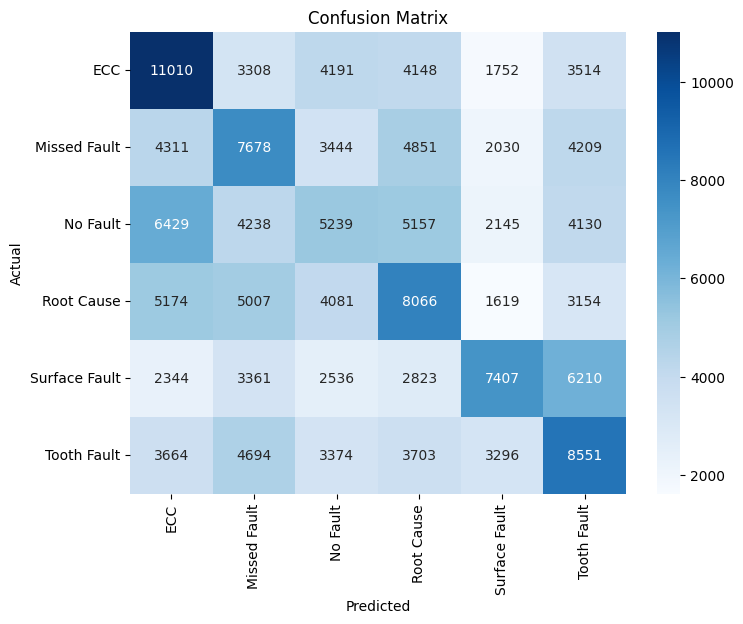

In [ ]:
# Evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Plot the confusion matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# import pandas as pd

# # Assuming merged_df is already defined
# merged_df = pd.DataFrame({'fault_type': ['ECC', 'No Fault', 'Tooth Fault', 'Root Cause', 'Missed Fault', 'Surface Fault']})

# # One-Hot Encoding
# one_hot_encoded_df = pd.get_dummies(merged_df, columns=['fault_type'])

# print(one_hot_encoded_df)


In [ ]:
#merged_df.head()

# Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming you already have the cleaned datasets
# Combine all datasets into one, adding a 'fault_type' column for labeling

# Create a function to add fault_type labels to each dataset
def add_fault_label(df, fault_name):
    df['fault_type'] = fault_name
    return df

# Add labels for each dataset
cleaned_df_ecc = add_fault_label(cleaned_df_ecc, 'ECC')
cleaned_df_root = add_fault_label(cleaned_df_root, 'Root Cause')
cleaned_df_miss = add_fault_label(cleaned_df_miss, 'Missed Fault')
cleaned_df_sur = add_fault_label(cleaned_df_sur, 'Surface Fault')
cleaned_df_tooth = add_fault_label(cleaned_df_tooth, 'Tooth Fault')
cleaned_df_no = add_fault_label(cleaned_df_no, 'No Fault')

# Merge all datasets into one DataFrame
merged_df = pd.concat([cleaned_df_ecc, cleaned_df_root, cleaned_df_miss, cleaned_df_sur, cleaned_df_tooth, cleaned_df_no])

# Drop any rows with missing values in sensor1, sensor2, or fault_type
merged_df.dropna(subset=['sensor1', 'sensor2', 'fault_type'], inplace=True)

# Display the merged DataFrame
print(merged_df.head())



    sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.522315  2.431974  2023-05-03 20:31:39.000000  8.332031           0   
1  2.523629  2.431317  2023-05-03 20:31:39.000200  8.332031           0   
2  2.522644  2.428032  2023-05-03 20:31:39.000400  8.332031           0   
3  2.521987  2.430660  2023-05-03 20:31:39.000600  8.332031           0   
4  2.522808  2.430168  2023-05-03 20:31:39.000800  8.332031           0   

  gear_fault_desc fault_type  
0    eccentricity        ECC  
1    eccentricity        ECC  
2    eccentricity        ECC  
3    eccentricity        ECC  
4    eccentricity        ECC  


In [ ]:
merged_df.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.522315  2.431974  2023-05-03 20:31:39.000000  8.332031           0   
1  2.523629  2.431317  2023-05-03 20:31:39.000200  8.332031           0   
2  2.522644  2.428032  2023-05-03 20:31:39.000400  8.332031           0   
3  2.521987  2.430660  2023-05-03 20:31:39.000600  8.332031           0   
4  2.522808  2.430168  2023-05-03 20:31:39.000800  8.332031           0   

  gear_fault_desc fault_type  
0    eccentricity        ECC  
1    eccentricity        ECC  
2    eccentricity        ECC  
3    eccentricity        ECC  
4    eccentricity        ECC

In [ ]:
merged_df = merged_df.drop(['sensor1_rolling_avg', 'sensor2_rolling_avg'], axis=1)

In [ ]:
merged_df.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.522315  2.431974  2023-05-03 20:31:39.000000  8.332031           0   
1  2.523629  2.431317  2023-05-03 20:31:39.000200  8.332031           0   
2  2.522644  2.428032  2023-05-03 20:31:39.000400  8.332031           0   
3  2.521987  2.430660  2023-05-03 20:31:39.000600  8.332031           0   
4  2.522808  2.430168  2023-05-03 20:31:39.000800  8.332031           0   

  gear_fault_desc fault_type  
0    eccentricity        ECC  
1    eccentricity        ECC  
2    eccentricity        ECC  
3    eccentricity        ECC  
4    eccentricity        ECC

# One - Hot Encoding

In [ ]:
# Perform one-hot encoding for the 'fault_type' column
merged_df_one_hot = pd.get_dummies(merged_df, columns=['fault_type'], prefix='fault')

# Display the first few rows of the updated DataFrame
print(merged_df_one_hot.head())

# Check the shape to confirm the new columns
print("Shape after one-hot encoding:", merged_df_one_hot.shape)



    sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.522315  2.431974  2023-05-03 20:31:39.000000  8.332031           0   
1  2.523629  2.431317  2023-05-03 20:31:39.000200  8.332031           0   
2  2.522644  2.428032  2023-05-03 20:31:39.000400  8.332031           0   
3  2.521987  2.430660  2023-05-03 20:31:39.000600  8.332031           0   
4  2.522808  2.430168  2023-05-03 20:31:39.000800  8.332031           0   

  gear_fault_desc  fault_ECC  fault_Missed Fault  fault_No Fault  \
0    eccentricity       True               False           False   
1    eccentricity       True               False           False   
2    eccentricity       True               False           False   
3    eccentricity       True               False           False   
4    eccentricity       True               False           False   

   fault_Root Cause  fault_Surface Fault  fault_Tooth Fault  
0             False                False              False  
1             Fa

In [ ]:
merged_df_one_hot.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.522315  2.431974  2023-05-03 20:31:39.000000  8.332031           0   
1  2.523629  2.431317  2023-05-03 20:31:39.000200  8.332031           0   
2  2.522644  2.428032  2023-05-03 20:31:39.000400  8.332031           0   
3  2.521987  2.430660  2023-05-03 20:31:39.000600  8.332031           0   
4  2.522808  2.430168  2023-05-03 20:31:39.000800  8.332031           0   

  gear_fault_desc  fault_ECC  fault_Missed Fault  fault_No Fault  \
0    eccentricity       True               False           False   
1    eccentricity       True               False           False   
2    eccentricity       True               False           False   
3    eccentricity       True               False           False   
4    eccentricity       True               False           False   

   fault_Root Cause  fault_Surface Fault  fault_Tooth Fault  
0             False                False              False  
1             False                False              False  
2             False                False              False  
3             False                False              False  
4             False                False              False

In [ ]:
merged_df_one_hot.drop('gear_fault_desc', axis=1, inplace=True)

In [ ]:
merged_df_one_hot.head(10)

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.522315  2.431974  2023-05-03 20:31:39.000000  8.332031           0   
1  2.523629  2.431317  2023-05-03 20:31:39.000200  8.332031           0   
2  2.522644  2.428032  2023-05-03 20:31:39.000400  8.332031           0   
3  2.521987  2.430660  2023-05-03 20:31:39.000600  8.332031           0   
4  2.522808  2.430168  2023-05-03 20:31:39.000800  8.332031           0   
5  2.523136  2.431974  2023-05-03 20:31:39.001000  8.332031           0   
6  2.522151  2.429182  2023-05-03 20:31:39.001200  8.332031           0   
7  2.519851  2.431153  2023-05-03 20:31:39.001400  8.332031           0   
8  2.522479  2.430496  2023-05-03 20:31:39.001600  8.332031           0   
9  2.523301  2.432960  2023-05-03 20:31:39.001800  8.332031           0   

   fault_ECC  fault_Missed Fault  fault_No Fault  fault_Root Cause  \
0       True               False           False             False   
1       True               False           False             False   
2       True               False           False             False   
3       True               False           False             False   
4       True               False           False             False   
5       True               False           False             False   
6       True               False           False             False   
7       True               False           False             False   
8       True               False           False             False   
9       True               False           False             False   

   fault_Surface Fault  fault_Tooth Fault  
0                False              False  
1                False              False  
2                False              False  
3                False              False  
4                False              False  
5                False              False  
6                False              False  
7                False              False  
8                False              False  
9                False              False

In [ ]:
merged_df_one_hot.tail(10)

sensor1   sensor2                      time_x  speedSet  load_value  \
149973  2.507532  2.429675  2023-05-03 22:06:06.994600      40.0          80   
149974  2.519194  2.430660  2023-05-03 22:06:06.994800      40.0          80   
149976  2.518044  2.420476  2023-05-03 22:06:06.995200      40.0          80   
149981  2.516402  2.426225  2023-05-03 22:06:06.996200      40.0          80   
149983  2.519194  2.432303  2023-05-03 22:06:06.996600      40.0          80   
149986  2.503097  2.439859  2023-05-03 22:06:06.997200      40.0          80   
149988  2.528885  2.419984  2023-05-03 22:06:06.997600      40.0          80   
149990  2.531842  2.422119  2023-05-03 22:06:06.998000      40.0          80   
149997  2.520837  2.418505  2023-05-03 22:06:06.999400      40.0          80   
149999  2.515088  2.419984  2023-05-03 22:06:06.999800      40.0          80   

        fault_ECC  fault_Missed Fault  fault_No Fault  fault_Root Cause  \
149973      False               False            True             False   
149974      False               False            True             False   
149976      False               False            True             False   
149981      False               False            True             False   
149983      False               False            True             False   
149986      False               False            True             False   
149988      False               False            True             False   
149990      False               False            True             False   
149997      False               False            True             False   
149999      False               False            True             False   

        fault_Surface Fault  fault_Tooth Fault  
149973                False              False  
149974                False              False  
149976                False              False  
149981                False              False  
149983                False              False  
149986                False              False  
149988                False              False  
149990                False              False  
149997                False              False  
149999                False              False

In [ ]:
merged_df_one_hot.shape

(804237, 11)

# CSV FILE TO EXCEL

In [ ]:
# import pandas as pd

# # Assuming merged_df_one_hot is already defined
# file_name = 'merged_df_one_hot_full.xlsx'
# merged_df_one_hot.to_excel(file_name, index=False)


In [ ]:
# from google.colab import files
# files.download(file_name)


In [ ]:
merged_df_one_hot.describe()

sensor1        sensor2       speedSet     load_value
count  804237.000000  804237.000000  804237.000000  804237.000000
mean        2.519928       2.429389      22.981446      36.371866
std         0.006038       0.005860      12.746989      39.835143
min         2.488478       2.397481       8.332031       0.000000
25%         2.517387       2.426882       8.332031       0.000000
50%         2.520180       2.429839      25.000000       0.000000
75%         2.522644       2.431974      40.000000      80.000000
max         2.547446       2.456448      40.000000      80.000000

In [ ]:
merged_df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804237 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sensor1              804237 non-null  float64
 1   sensor2              804237 non-null  float64
 2   time_x               804237 non-null  object 
 3   speedSet             804237 non-null  float64
 4   load_value           804237 non-null  int64  
 5   fault_ECC            804237 non-null  bool   
 6   fault_Missed Fault   804237 non-null  bool   
 7   fault_No Fault       804237 non-null  bool   
 8   fault_Root Cause     804237 non-null  bool   
 9   fault_Surface Fault  804237 non-null  bool   
 10  fault_Tooth Fault    804237 non-null  bool   
dtypes: bool(6), float64(3), int64(1), object(1)
memory usage: 41.4+ MB




```
# This is formatted as code
```

# Convert object to datetime formate

In [ ]:
merged_df_one_hot['time_x'] = pd.to_datetime(merged_df_one_hot['time_x'])


In [ ]:
merged_df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804237 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   sensor1              804237 non-null  float64       
 1   sensor2              804237 non-null  float64       
 2   time_x               804237 non-null  datetime64[ns]
 3   speedSet             804237 non-null  float64       
 4   load_value           804237 non-null  int64         
 5   fault_ECC            804237 non-null  bool          
 6   fault_Missed Fault   804237 non-null  bool          
 7   fault_No Fault       804237 non-null  bool          
 8   fault_Root Cause     804237 non-null  bool          
 9   fault_Surface Fault  804237 non-null  bool          
 10  fault_Tooth Fault    804237 non-null  bool          
dtypes: bool(6), datetime64[ns](1), float64(3), int64(1)
memory usage: 41.4 MB


In [ ]:
# Extract additional features from 'time_x'
# merged_df_one_hot['hour'] = merged_df_one_hot['time_x'].dt.hour
# merged_df_one_hot['minute'] = merged_df_one_hot['time_x'].dt.minute
# merged_df_one_hot['second'] = merged_df_one_hot['time_x'].dt.second
merged_df_one_hot['microsecond'] = merged_df_one_hot['time_x'].dt.microsecond

In [ ]:
merged_df_one_hot.head()

sensor1   sensor2                     time_x  speedSet  load_value  \
0  2.522315  2.431974 2023-05-03 20:31:39.000000  8.332031           0   
1  2.523629  2.431317 2023-05-03 20:31:39.000200  8.332031           0   
2  2.522644  2.428032 2023-05-03 20:31:39.000400  8.332031           0   
3  2.521987  2.430660 2023-05-03 20:31:39.000600  8.332031           0   
4  2.522808  2.430168 2023-05-03 20:31:39.000800  8.332031           0   

   fault_ECC  fault_Missed Fault  fault_No Fault  fault_Root Cause  \
0       True               False           False             False   
1       True               False           False             False   
2       True               False           False             False   
3       True               False           False             False   
4       True               False           False             False   

   fault_Surface Fault  fault_Tooth Fault  microsecond  
0                False              False            0  
1                False              False          200  
2                False              False          400  
3                False              False          600  
4                False              False          800

In [ ]:
# Now, you can drop the columns
merged_df_one_hot = merged_df_one_hot.drop(['time_x'], axis=1)
merged_df_one_hot.head()



sensor1   sensor2  speedSet  load_value  fault_ECC  fault_Missed Fault  \
0  2.522315  2.431974  8.332031           0       True               False   
1  2.523629  2.431317  8.332031           0       True               False   
2  2.522644  2.428032  8.332031           0       True               False   
3  2.521987  2.430660  8.332031           0       True               False   
4  2.522808  2.430168  8.332031           0       True               False   

   fault_No Fault  fault_Root Cause  fault_Surface Fault  fault_Tooth Fault  \
0           False             False                False              False   
1           False             False                False              False   
2           False             False                False              False   
3           False             False                False              False   
4           False             False                False              False   

   microsecond  
0            0  
1          200  
2          400  
3          600  
4          800

In [ ]:
merged_df_one_hot.tail()

sensor1   sensor2  speedSet  load_value  fault_ECC  \
149986  2.503097  2.439859      40.0          80      False   
149988  2.528885  2.419984      40.0          80      False   
149990  2.531842  2.422119      40.0          80      False   
149997  2.520837  2.418505      40.0          80      False   
149999  2.515088  2.419984      40.0          80      False   

        fault_Missed Fault  fault_No Fault  fault_Root Cause  \
149986               False            True             False   
149988               False            True             False   
149990               False            True             False   
149997               False            True             False   
149999               False            True             False   

        fault_Surface Fault  fault_Tooth Fault  microsecond  
149986                False              False       997200  
149988                False              False       997600  
149990                False              False       998000  
149997                False              False       999400  
149999                False              False       999800

In [ ]:
merged_df_one_hot.shape


(804237, 11)

In [ ]:
merged_df_one_hot.head(25002)

sensor1   sensor2  speedSet  load_value  fault_ECC  \
0      2.522315  2.431974  8.332031           0       True   
1      2.523629  2.431317  8.332031           0       True   
2      2.522644  2.428032  8.332031           0       True   
3      2.521987  2.430660  8.332031           0       True   
4      2.522808  2.430168  8.332031           0       True   
...         ...       ...       ...         ...        ...   
24997  2.522644  2.427704  8.332031           0       True   
24998  2.524286  2.430496  8.332031           0       True   
24999  2.520673  2.430989  8.332031           0       True   
25000  2.523958  2.433617  8.332031          80       True   
25001  2.522808  2.433945  8.332031          80       True   

       fault_Missed Fault  fault_No Fault  fault_Root Cause  \
0                   False           False             False   
1                   False           False             False   
2                   False           False             False   
3                   False           False             False   
4                   False           False             False   
...                   ...             ...               ...   
24997               False           False             False   
24998               False           False             False   
24999               False           False             False   
25000               False           False             False   
25001               False           False             False   

       fault_Surface Fault  fault_Tooth Fault  microsecond  
0                    False              False            0  
1                    False              False          200  
2                    False              False          400  
3                    False              False          600  
4                    False              False          800  
...                    ...                ...          ...  
24997                False              False       999400  
24998                False              False       999600  
24999                False              False       999800  
25000                False              False            0  
25001                False              False          200  

[25002 rows x 11 columns]

In [ ]:
std_deviation = merged_df_one_hot.std()
print(std_deviation)


sensor1                     0.006038
sensor2                     0.005860
speedSet                   12.746989
load_value                 39.835143
fault_ECC                   0.379270
fault_Missed Fault          0.372475
fault_No Fault              0.376628
fault_Root Cause            0.373710
fault_Surface Fault         0.359021
fault_Tooth Fault           0.374234
microsecond            288813.858637
dtype: float64


# CSV FILE TO EXCEL

Rey

In [ ]:
cleaned_df_merged.head()

NameError: name 'cleaned_df_merged' is not defined

Fin

In [ ]:
# Save the entire dataset to an Excel file
file_path = 'merged_df_one_hot.xlsx'
merged_df_one_hot.to_excel(file_path, index=False)

# Confirm the file was saved
print(f"Dataset saved successfully to {file_path}")


Dataset saved successfully to merged_df_one_hot.xlsx


In [ ]:
from google.colab import files
files.download('merged_df_one_hot.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merged_df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804237 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sensor1              804237 non-null  float64
 1   sensor2              804237 non-null  float64
 2   speedSet             804237 non-null  float64
 3   load_value           804237 non-null  int64  
 4   fault_ECC            804237 non-null  bool   
 5   fault_Missed Fault   804237 non-null  bool   
 6   fault_No Fault       804237 non-null  bool   
 7   fault_Root Cause     804237 non-null  bool   
 8   fault_Surface Fault  804237 non-null  bool   
 9   fault_Tooth Fault    804237 non-null  bool   
 10  microsecond          804237 non-null  int32  
dtypes: bool(6), float64(3), int32(1), int64(1)
memory usage: 38.3 MB


In [ ]:
merged_df_one_hot.describe()

sensor1        sensor2       speedSet     load_value  \
count  804237.000000  804237.000000  804237.000000  804237.000000   
mean        2.519928       2.429389      22.981446      36.371866   
std         0.006038       0.005860      12.746989      39.835143   
min         2.488478       2.397481       8.332031       0.000000   
25%         2.517387       2.426882       8.332031       0.000000   
50%         2.520180       2.429839      25.000000       0.000000   
75%         2.522644       2.431974      40.000000      80.000000   
max         2.547446       2.456448      40.000000      80.000000   

         microsecond  
count  804237.000000  
mean   499172.742115  
std    288813.858637  
min         0.000000  
25%    248800.000000  
50%    498800.000000  
75%    749200.000000  
max    999800.000000

# Data Visualization

<Axes: xlabel='microsecond', ylabel='sensor1'>

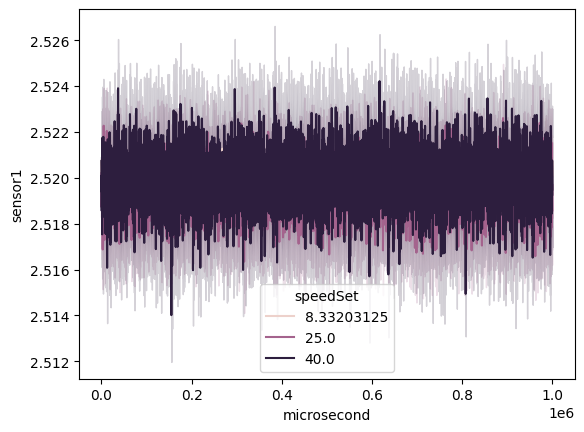

In [ ]:
sns.lineplot(x='microsecond', y='sensor1', hue='speedSet', data=merged_df_one_hot)

<Axes: xlabel='microsecond', ylabel='sensor2'>

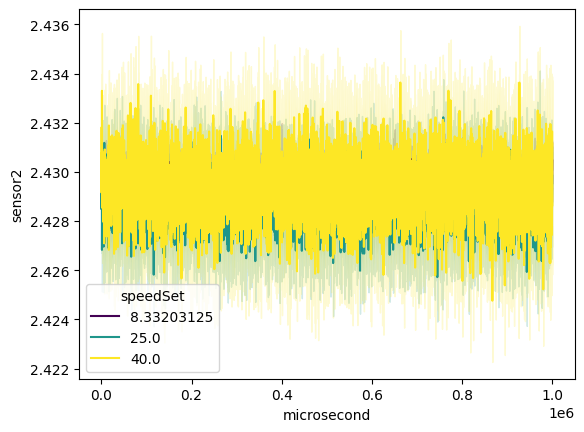

In [ ]:
sns.lineplot(x='microsecond', y='sensor2', hue='speedSet', data=merged_df_one_hot,
             palette='viridis')

<Axes: xlabel='microsecond', ylabel='sensor1'>

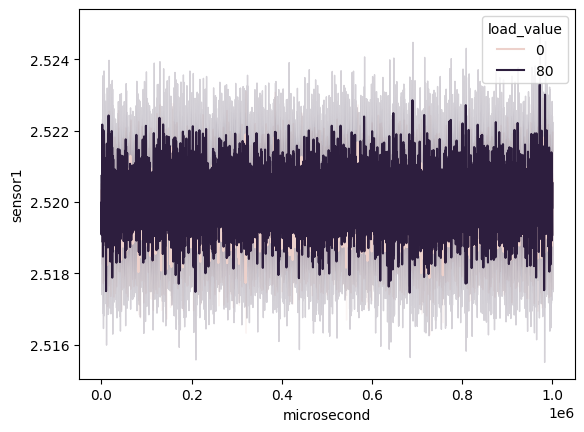

In [ ]:
sns.lineplot(x='microsecond', y='sensor1', hue='load_value', data=merged_df_one_hot)

<Axes: xlabel='microsecond', ylabel='sensor2'>

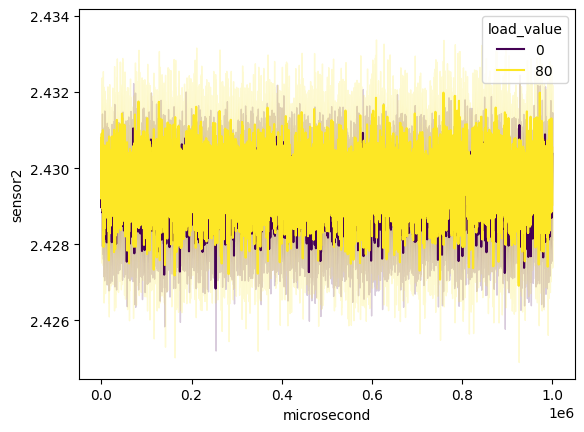

In [ ]:
sns.lineplot(x='microsecond', y='sensor2', hue='load_value', data=merged_df_one_hot,
             palette='viridis')

<Axes: xlabel='microsecond', ylabel='sensor1'>

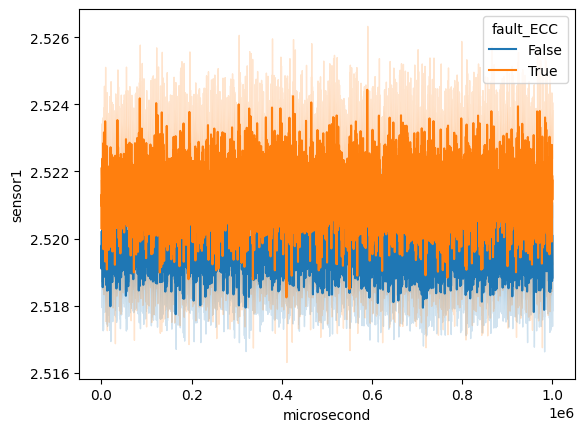

In [ ]:
sns.lineplot(x='microsecond', y='sensor1', hue='fault_ECC', data=merged_df_one_hot)

<Axes: xlabel='microsecond', ylabel='sensor2'>

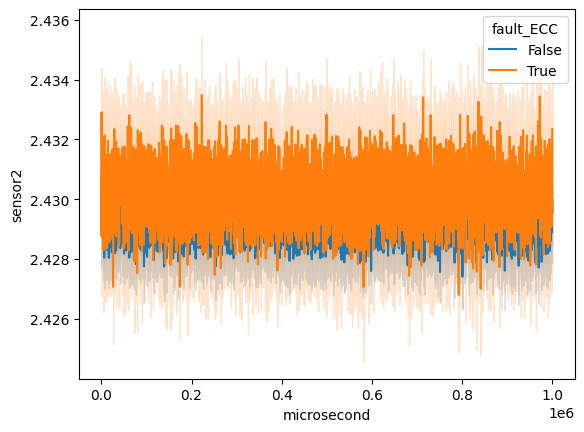

In [ ]:
sns.lineplot(x='microsecond', y='sensor2', hue='fault_ECC', data=merged_df_one_hot)

# Splitting in Train-Test data

What Should You Do?
For time-independent datasets (e.g., shuffled, non-sequential data):

Perform standardization and cyclical transformations before splitting.
For time-series datasets (e.g., ordered, sequential data):

Perform transformations after splitting, using only the training data to fit the transformations.


In [ ]:
# # Define features and target
# X = merged_df_one_hot[['sensor1', 'sensor2', 'speedSet', 'load_value', 'microsecond']]
# y = merged_df_one_hot[['fault_ECC', 'fault_Missed Fault', 'fault_No Fault', 'fault_Root Cause', 'fault_Surface Fault', 'fault_Tooth Fault']]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False, random_state=42)         #stratify = for equal split of 0 & 1   and  shuffle does not shuffel useful for timeseries

# # Print shapes to verify
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)


In [ ]:
# Define features and target
X = merged_df_one_hot[['sensor1', 'sensor2', 'speedSet', 'load_value', 'microsecond']].copy()  # Explicitly create a copy
y = merged_df_one_hot[['fault_ECC', 'fault_Missed Fault', 'fault_No Fault', 'fault_Root Cause', 'fault_Surface Fault', 'fault_Tooth Fault']]

# Cyclical feature transformation for 'microsecond'
X['microsecond_sin'] = np.sin(2 * np.pi * X['microsecond'] / 1_000_000)
X['microsecond_cos'] = np.cos(2 * np.pi * X['microsecond'] / 1_000_000)

# Drop the original 'microsecond' column
X = X.drop(columns=['microsecond'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize all features
X = pd.DataFrame(X_scaled, columns=X.columns)  # Convert back to DataFrame for clarity

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Optional: Preview the transformed datasets
print("Sample X_train:")
print(X_train.head())
print("\nSample y_train:")
print(y_train.head())

X_train shape: (643389, 6)
X_test shape: (160848, 6)
y_train shape: (643389, 6)
y_test shape: (160848, 6)
Sample X_train:
    sensor1   sensor2  speedSet  load_value  microsecond_sin  microsecond_cos
0  0.395426  0.441097 -1.149246    -0.91306        -0.001891         1.413089
1  0.613070  0.328985 -1.149246    -0.91306        -0.000113         1.413088
2  0.449837 -0.231577 -1.149246    -0.91306         0.001664         1.413085
3  0.341014  0.216873 -1.149246    -0.91306         0.003441         1.413079
4  0.477042  0.132788 -1.149246    -0.91306         0.005219         1.413072

Sample y_train:
   fault_ECC  fault_Missed Fault  fault_No Fault  fault_Root Cause  \
0       True               False           False             False   
1       True               False           False             False   
2       True               False           False             False   
3       True               False           False             False   
4       True               False           

# Model Training

In [ ]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=ce034e8dfba9c2d0a99ef309af23b38857c6b8405231a06c44e6b4eba25a3ce9
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
# Start H2O server
# h2o.init()

# # Use the already preprocessed and split data
# # Assuming `X_train`, `X_test`, `y_train`, and `y_test` are already defined and processed

# # Combine X_train and y_train for H2O AutoML
# train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
# test = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)

# # Convert data to H2OFrame
# train_h2o = h2o.H2OFrame(train)
# test_h2o = h2o.H2OFrame(test)

# # Define feature names and target names
# feature_names = X_train.columns.tolist()
# target_names = y_train.columns.tolist()

# # Train H2O AutoML
# aml = H2OAutoML(max_models=20, seed=42, balance_classes=True, sort_metric="AUTO")
# aml.train(x=feature_names, y=target_names[0], training_frame=train_h2o)

# # View leaderboard
# lb = aml.leaderboard
# print(lb)



# # Make predictions on test data
# predictions = aml.leader.predict(test_h2o[feature_names])
# print(predictions)

In [ ]:


# Start H2O server
h2o.init()

# Reset index of X_train and y_train before concatenating
X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# Combine X_train and y_train for H2O AutoML
train = pd.concat([X_train_reset, y_train_reset], axis=1)
test = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Convert data to H2OFrame
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

# Define feature names and target names
feature_names = X_train.columns.tolist()
target_names = y_train.columns.tolist()

# Train H2O AutoML
aml = H2OAutoML(max_models=20, seed=42, balance_classes=True, sort_metric="AUTO")
aml.train(x=feature_names, y=target_names[0], training_frame=train_h2o)

# View leaderboard
lb = aml.leaderboard
print(lb)

# Make predictions on test data
predictions = aml.leader.predict(test_h2o[feature_names])
print(predictions)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         2 mins 12 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    1 month and 26 days
H2O_cluster_name:           H2O_from_python_unknownUser_xdx8db
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20241228_93740     0.808281   0.393186  0.573272                0.285051  0.35874   0.128694
StackedEnsemble_BestOfFamily_1_AutoML_1_20241228_93740  0.807954   0.39351   0.572665                0.289504  0.358881  0.128796
GBM_5_AutoML_1_20241228_93740                           0.807759   0.394517  0.571998                0.286302  0.359135  0.128978
GBM_2_AutoML_1_20241228_93740                           0.807678   0.39454   0.572453                0.287279  0.35911   0.12896
GBM_grid_1_AutoML_1_20241228_93740_model_1              0.807401  

# 2nd attempt

In [ ]:


# Start H2O server
h2o.init()

# Reset index of X_train and y_train before concatenating
X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# Combine X_train and y_train for H2O AutoML
train = pd.concat([X_train_reset, y_train_reset], axis=1)
test = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Convert data to H2OFrame
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

# Define feature names and target names
feature_names = X_train.columns.tolist()
target_names = y_train.columns.tolist()

# Train H2O AutoML
aml = H2OAutoML(max_models=10, seed=42, balance_classes=True, sort_metric="AUTO")
aml.train(x=feature_names, y=target_names[0], training_frame=train_h2o)

# View leaderboard
lb = aml.leaderboard
print(lb)

# Make predictions on test data
predictions = aml.leader.predict(test_h2o[feature_names])
print(predictions)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpo6jj69ca
  JVM stdout: /tmp/tmpo6jj69ca/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpo6jj69ca/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    2 months
H2O_cluster_name:           H2O_from_python_unknownUser_xc9tjq
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
GBM_2_AutoML_1_20250103_33645                           0.807678   0.39454   0.572453                0.287279  0.35911   0.12896
StackedEnsemble_BestOfFamily_1_AutoML_1_20250103_33645  0.807535   0.393832  0.571797                0.288242  0.359042  0.128911
StackedEnsemble_AllModels_1_AutoML_1_20250103_33645     0.807494   0.393765  0.571872                0.287588  0.359015  0.128892
GBM_3_AutoML_1_20250103_33645                           0.807225   0.394721  0.571791                0.289111  0.359206  0.129029
XGBoost_3_AutoML_1_20250103_33645                       0.805915  

In [ ]:
lb.head()

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
GBM_2_AutoML_1_20250103_33645                           0.807678   0.39454   0.572453                0.287279  0.35911   0.12896
StackedEnsemble_BestOfFamily_1_AutoML_1_20250103_33645  0.807535   0.393832  0.571797                0.288242  0.359042  0.128911
StackedEnsemble_AllModels_1_AutoML_1_20250103_33645     0.807494   0.393765  0.571872                0.287588  0.359015  0.128892
GBM_3_AutoML_1_20250103_33645                           0.807225   0.394721  0.571791                0.289111  0.359206  0.129029
XGBoost_3_AutoML_1_20250103_33645                       0.805915   0.51393   0.568875                0.293289  0.426579  0.18197
GBM_4_AutoML_1_20250103_33645                           0.803248   0.397565  0.56568                 0.291274  0.360559  0.130003
XGBoost_2_AutoML_1_20250103_33645                       0.800416   0.511721  0.561854                0.294391  0.425501  0.181051
GBM_1_AutoML_1_20250103_33645                           0.798999   0.401323  0.559582                0.298315  0.362271  0.13124
XRT_1_AutoML_1_20250103_33645                           0.79305    0.421311  0.54592                 0.29904   0.370802  0.137494
DRF_1_AutoML_1_20250103_33645                           0.789797   0.422733  0.538834                0.30087   0.370836  0.137519
[10 rows x 7 columns]

In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  ---------------
GBM_2_AutoML_1_20250103_33645                           0.807678   0.39454   0.572453                0.287279  0.35911   0.12896                72675                   0.024295  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20250103_33645  0.807535   0.393832  0.571797                0.288242  0.359042  0.128911              314172                   0.105331  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20250103_33645     0.807494   0.393765  0.571872                0.287588  0.359015  0.128892              377598                   0.116489  StackedEnsemble
GBM_3_AutoML_1_20250103_33645                           0.807225   0.394721  0.571791                0.289111  0.359206  0.129029               72593                   0.024776  GBM
XGBoost_3_AutoML_1_20250103_33645                       0.805915   0.51393   0.568875                0.293289  0.426579  0.18197                67569                   0.006178  XGBoost
GBM_4_AutoML_1_20250103_33645                           0.803248   0.397565  0.56568                 0.291274  0.360559  0.130003               87522                   0.030579  GBM
XGBoost_2_AutoML_1_20250103_33645                       0.800416   0.511721  0.561854                0.294391  0.425501  0.181051               64040                   0.007944  XGBoost
GBM_1_AutoML_1_20250103_33645                           0.798999   0.401323  0.559582                0.298315  0.362271  0.13124                97675                   0.029554  GBM
XRT_1_AutoML_1_20250103_33645                           0.79305    0.421311  0.54592                 0.29904   0.370802  0.137494              190161                   0.035649  DRF
DRF_1_AutoML_1_20250103_33645                           0.789797   0.422733  0.538834                0.30087   0.370836  0.137519              133612                   0.029797  DRF
[12 rows x 10 columns]

model_id                                auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
---------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  -------
GBM_2_AutoML_1_20250103_33645      0.807678   0.39454   0.572453                0.287279  0.35911   0.12896                72675                   0.024295  GBM
XGBoost_3_AutoML_1_20250103_33645  0.805915   0.51393   0.568875                0.293289  0.426579  0.18197                67569                   0.006178  XGBoost
GLM_1_AutoML_1_20250103_33645      0.657855   0.510852  0.283253                0.343566  0.408777  0.167099                9947                   0.000905  GLM
[3 rows x 10 columns]

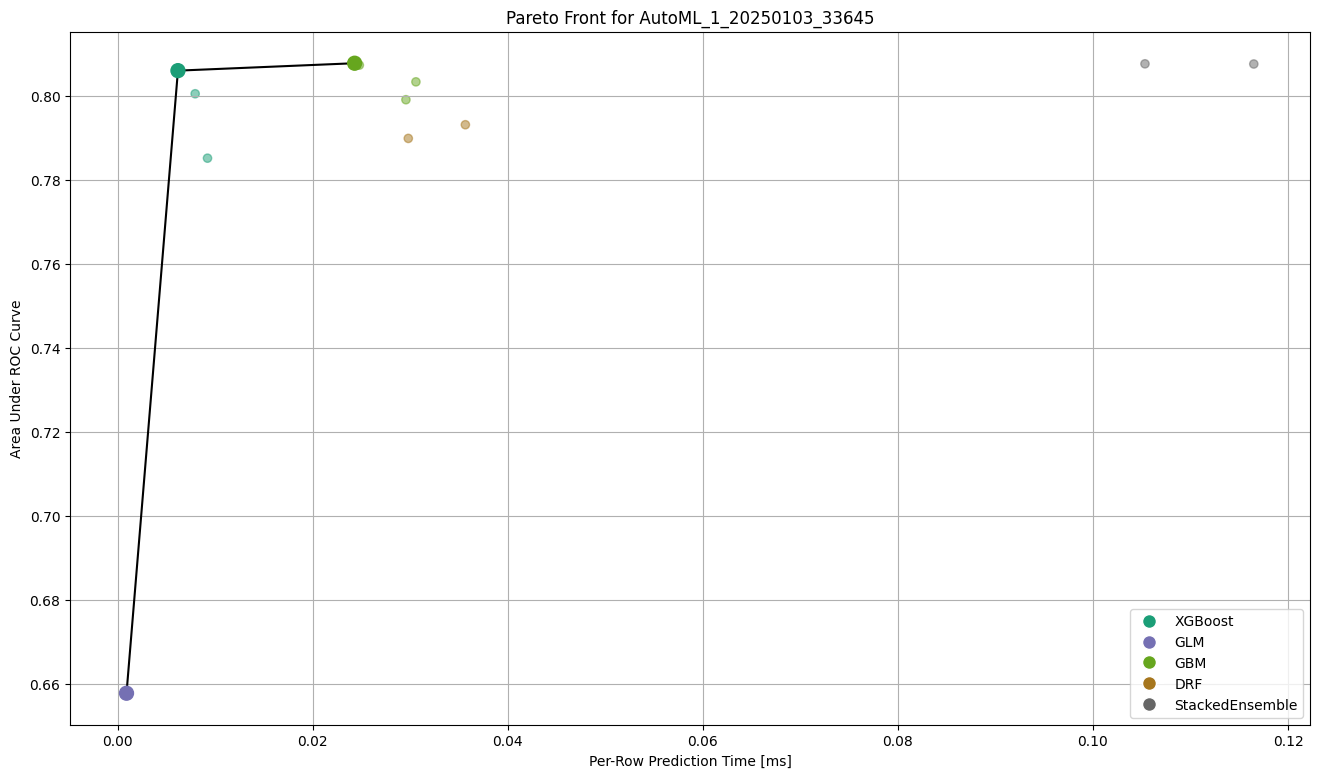

In [ ]:
pf = aml.pareto_front()
pf.figure()
pf

In [ ]:
m = aml.get_best_model()


In [ ]:
print(m)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20250103_33645


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    93                 93                          114758                 0            7            5.41936       1             128           93.6452

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.23195401564748835
RMSE: 0.4816160458783411
LogLoss: 0.6429817335279205
Mean Per-Class Error: 0.2903626137258407
AUC: 0.8126410894814162
AUCPR: 0.8060982253635165
Gini: 0.6252821789628324

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15105715835096029
       False    True    Error    Rate
-----  -------  ------  -------  -------------

Feature Importance (Top 10):
          variable  relative_importance  scaled_importance  percentage
0          sensor1        162603.062500           1.000000    0.456591
1         speedSet         90795.414062           0.558387    0.254954
2          sensor2         85717.734375           0.527159    0.240696
3       load_value         14179.783203           0.087205    0.039817
4  microsecond_sin          1543.514526           0.009493    0.004334
5  microsecond_cos          1284.671143           0.007901    0.003607


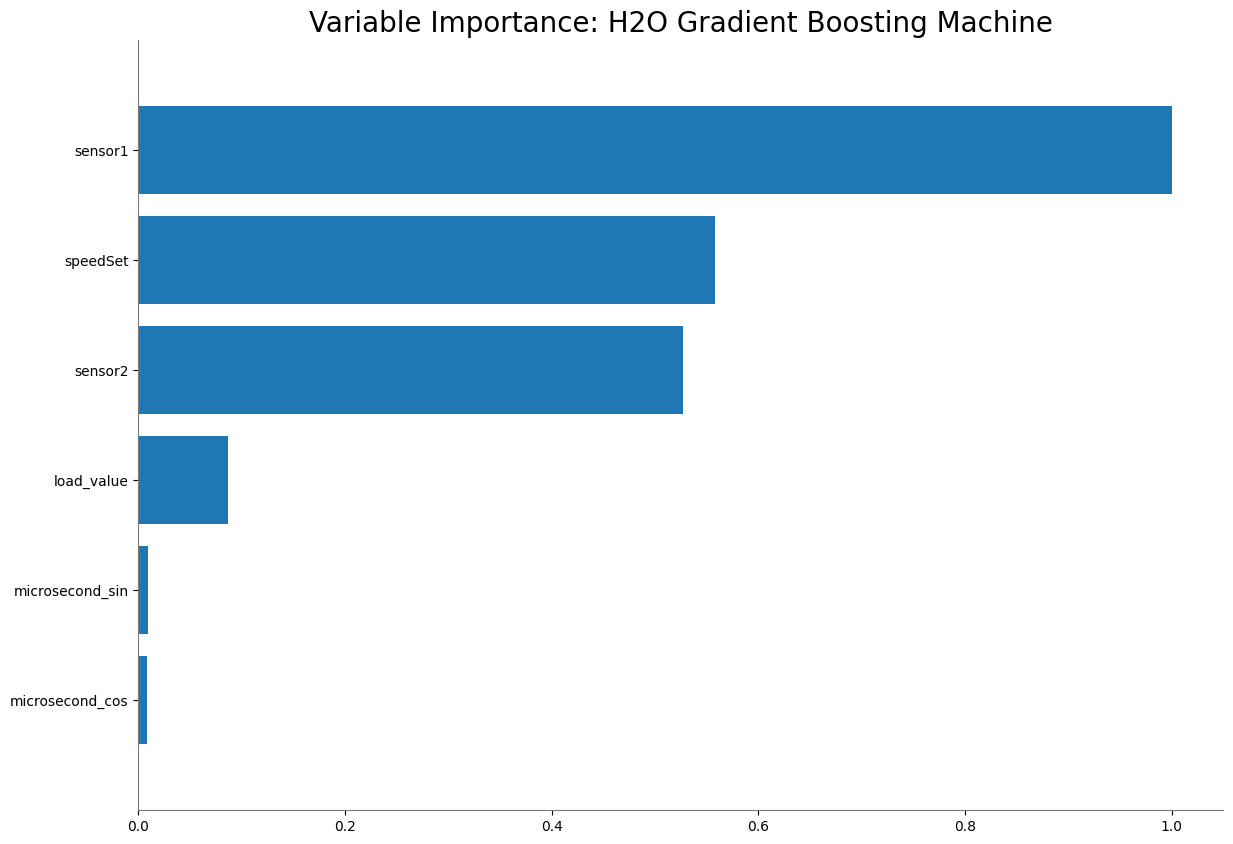

<Figure size 640x480 with 0 Axes>

In [ ]:
# Extract the best model from the AutoML leaderboard
best_model = aml.leader  # 'aml' is your AutoML object

# Feature Importance Analysis
if hasattr(best_model, 'varimp'):
    # Extract and print feature importance
    feature_importance = best_model.varimp(use_pandas=True)
    print("Feature Importance (Top 10):")
    print(feature_importance.head(10))  # Display top 10 features

    # Plot feature importance
    best_model.varimp_plot(num_of_features=10)
else:
    print("Feature importance is not available for the selected model.")


In [ ]:
# from h2o.grid.grid_search import H2OGridSearch

# # Hyperparameter Tuning for GBM (Gradient Boosting Machine)
# # Define hyperparameters grid for Grid Search
# hyper_parameters = {
#     'max_depth': [3, 5, 7, 9],  # Tree depth values
#     'learn_rate': [0.01, 0.05, 0.1],  # Learning rates
#     'ntrees': [50, 100, 150],  # Number of trees
#     'min_rows': [10, 20, 30]  # Minimum rows per split
# }

# # Create the model object for Grid Search
# gbm_grid = H2OGridSearch(
#     model=h2o.estimators.H2OGradientBoostingEstimator,
#     hyper_params=hyper_parameters,
#     grid_id="gbm_grid"
# )

# # Train grid search on your data
# gbm_grid.train(x=feature_names, y=target_names[0], training_frame=train_h2o)

# # View grid results
# grid_results = gbm_grid.get_grid(sort_by="auc", decreasing=True)
# print("Best Model Hyperparameters:", grid_results[0].params)
# print("\nTop Grid Search Results:")
# print(grid_results.head())


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Best Model Hyperparameters: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid_model_47', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid_model_47'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'Key_Frame__upload_a150cc9edabb5ec2e1b1e27d94de4e7c.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/Key_Frame__upload_a150cc9edabb5ec2e1b1e27d94de4e7c.hex'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'Key_Frame__upload_a150cc9edabb5ec2e1b1e27d94de4e7c.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/Key_Frame__upload_a150cc9edabb5ec2e1b1e27d94de4e7c.hex'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 

AttributeError: type object 'H2OGridSearch' has no attribute 'head'

In [ ]:
from h2o.grid.grid_search import H2OGridSearch
import h2o

# Define hyperparameters grid for Grid Search
hyper_parameters = {
    'max_depth': [3, 5, 7, 9],  # Tree depth values
    'learn_rate': [0.01, 0.05, 0.1],  # Learning rates
    'ntrees': [50, 100, 150],  # Number of trees
    'min_rows': [10, 20, 30]  # Minimum rows per split
}

# Create the model object for Grid Search
gbm_grid = H2OGridSearch(
    model=h2o.estimators.H2OGradientBoostingEstimator,
    hyper_params=hyper_parameters,
    grid_id="gbm_grid"
)

# Assuming 'feature_names' and 'target_names' are already defined from the previous code
# Train grid search on your data
gbm_grid.train(x=feature_names, y=target_names[0], training_frame=train_h2o)




gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing logloss
     learn_rate    max_depth    min_rows    ntrees    model_ids          logloss
---  ------------  -----------  ----------  --------  -----------------  -------------------
     0.05          9.0          10.0        91.0      gbm_grid_model_47  0.3875649809638428
     0.05          9.0          10.0        91.0      gbm_grid_model_83  0.3875649809638428
     0.1           9.0          10.0        45.0      gbm_grid_model_12  0.38781173603599817
     0.1           9.0          10.0        45.0      gbm_grid_model_48  0.38781173603599817
     0.1           9.0          10.0        45.0      gbm_grid_model_84  0.38781173603599817
     0.05          9.0          20.0        90.0      gbm_grid_model_59  0.3881064331170752
     0.05          9.0          20.0        90.0      gbm_grid_model_95  0.3881064331170752
     0.1           9.0          20.0        45.0      gbm_grid_model_24  0.38810702058613744
     0.1           9.0          20.0        45.0      gbm_grid_model_60  0.38810702058613744
     0.1           9.0          20.0        45.0      gbm_grid_model_96  0.38810702058613744
---  ---           ---          ---         ---       ---                ---
     0.01          9.0          30.0        50.0      gbm_grid_model_34  0.4522312233852053
     0.01          7.0          10.0        50.0      gbm_grid_model_7   0.4549035282142017
     0.01          7.0          20.0        50.0      gbm_grid_model_19  0.4549129134702115
     0.01          7.0          30.0        50.0      gbm_grid_model_31  0.4549152471756377
     0.01          5.0          20.0        50.0      gbm_grid_model_16  0.4616230216830735
     0.01          5.0          30.0        50.0      gbm_grid_model_28  0.4616230216830735
     0.01          5.0          10.0        50.0      gbm_grid_model_4   0.4616230216830735
     0.01          3.0          10.0        50.0      gbm_grid_model_1   0.4730065364771379
     0.01          3.0          20.0        50.0      gbm_grid_model_13  0.4730065364771379
     0.01          3.0          30.0        50.0      gbm_grid_model_25  0.4730065364771379
[108 rows x 7 columns]

In [ ]:
# # View grid results
# grid_results = gbm_grid.get_grid(sort_by="auc", decreasing=True)

# # Since grid_results is an H2OFrame, we can convert it to a pandas DataFrame for easier handling
# grid_results_df = grid_results.as_data_frame()

# # Print best model's hyperparameters (first row, as the results are sorted by AUC)
# print("Best Model Hyperparameters:")
# print(grid_results_df.iloc[0])  # Accessing the top row which corresponds to the best model

# # Print the top 5 grid search results
# print("\nTop Grid Search Results:")
# print(grid_results_df.head())  # Using pandas .head() to display the top 5 results

In [ ]:
# View grid results
grid_results = gbm_grid.get_grid(sort_by="auc", decreasing=True)

# Get the sorted grid (H2OFrame) from the grid search results
sorted_grid = grid_results.sorted_metric_table()

# sorted_grid is already a pandas DataFrame, so no need to call as_data_frame()
grid_results_df = sorted_grid # Assign directly

# Print best model's hyperparameters (first row, as the results are sorted by AUC)
print("Best Model Hyperparameters:")
print(grid_results_df.iloc[0])

# Print the top 5 grid search results
print("\nTop Grid Search Results:")
print(grid_results_df.head())


Best Model Hyperparameters:
                               
learn_rate                 0.05
max_depth                   9.0
min_rows                   10.0
ntrees                     91.0
model_ids     gbm_grid_model_47
auc                    0.816965
Name: 0, dtype: object

Top Grid Search Results:
     learn_rate  max_depth  min_rows  ntrees          model_ids       auc
0          0.05        9.0      10.0    91.0  gbm_grid_model_47  0.816965
1          0.05        9.0      10.0    91.0  gbm_grid_model_83  0.816965
2          0.10        9.0      10.0    45.0  gbm_grid_model_12  0.816379
3          0.10        9.0      10.0    45.0  gbm_grid_model_48  0.816379
4          0.10        9.0      10.0    45.0  gbm_grid_model_84  0.816379


# Saving the model

In [ ]:
# Save the best model
model_path = h2o.save_model(model=aml.leader, path="models/", force=True)
print(f"Model saved at: {model_path}")


Model saved at: /content/models/GBM_2_AutoML_1_20250103_33645


# Test the Model

In [ ]:
# Load the saved model
loaded_model = h2o.load_model(model_path)

# Test the loaded model with some sample data (e.g., first 5 rows of test data)
sample_data = test_h2o[:5]  # Take the first 5 rows from your test dataset
predictions = loaded_model.predict(sample_data)

# Print predictions
print("Predictions from the loaded model:")
print(predictions)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Predictions from the loaded model:
predict       False       True
True       0.687993  0.312007
False      0.9632    0.0368003
True       0.668238  0.331762
True       0.725275  0.274725
True       0.749003  0.250997
True       0.805983  0.194017
False      0.874898  0.125102
True       0.729109  0.270891
True       0.692107  0.307893
True       0.759864  0.240136
[160848 rows x 3 columns]



/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'microsecond_cos': substituting in a column of NaN
  warnings.warn(w)


In [ ]:
print(y_train.columns)


Index(['fault_ECC', 'fault_Missed Fault', 'fault_No Fault', 'fault_Root Cause',
       'fault_Surface Fault', 'fault_Tooth Fault'],
      dtype='object')


# 3rd attempt

In [ ]:
# Cyclical feature transformation for 'microsecond'
X['microsecond_sin'] = np.sin(2 * np.pi * X['microsecond'] / 1_000_000)
X['microsecond_cos'] = np.cos(2 * np.pi * X['microsecond'] / 1_000_000)

# Drop the original 'microsecond' column
X = X.drop(columns=['microsecond'])


KeyError: 'microsecond'

In [ ]:
print(merged_df_one_hot.columns)


Index(['sensor1', 'sensor2', 'speedSet', 'load_value', 'fault_ECC',
       'fault_Missed Fault', 'fault_No Fault', 'fault_Root Cause',
       'fault_Surface Fault', 'fault_Tooth Fault', 'microsecond'],
      dtype='object')


In [ ]:
# Define features and target
X = merged_df_one_hot[['sensor1', 'sensor2', 'speedSet', 'load_value', 'microsecond']].copy()  # Explicitly create a copy
y = merged_df_one_hot[['fault_ECC', 'fault_Missed Fault', 'fault_No Fault', 'fault_Root Cause', 'fault_Surface Fault', 'fault_Tooth Fault']]

# Cyclical feature transformation for 'microsecond'
X['microsecond_sin'] = np.sin(2 * np.pi * X['microsecond'] / 1_000_000)
X['microsecond_cos'] = np.cos(2 * np.pi * X['microsecond'] / 1_000_000)

# Drop the original 'microsecond' column
X = X.drop(columns=['microsecond'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize all features
X = pd.DataFrame(X_scaled, columns=X.columns)  # Convert back to DataFrame for clarity

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Optional: Preview the transformed datasets
print("Sample X_train:")
print(X_train.head())
print("\nSample y_train:")
print(y_train.head())


X_train shape: (643389, 6)
X_test shape: (160848, 6)
y_train shape: (643389, 6)
y_test shape: (160848, 6)
Sample X_train:
    sensor1   sensor2  speedSet  load_value  microsecond_sin  microsecond_cos
0  0.395426  0.441097 -1.149246    -0.91306        -0.001891         1.413089
1  0.613070  0.328985 -1.149246    -0.91306        -0.000113         1.413088
2  0.449837 -0.231577 -1.149246    -0.91306         0.001664         1.413085
3  0.341014  0.216873 -1.149246    -0.91306         0.003441         1.413079
4  0.477042  0.132788 -1.149246    -0.91306         0.005219         1.413072

Sample y_train:
   fault_ECC  fault_Missed Fault  fault_No Fault  fault_Root Cause  \
0       True               False           False             False   
1       True               False           False             False   
2       True               False           False             False   
3       True               False           False             False   
4       True               False           

In [ ]:
# Make predictions with the AutoML model
predictions = aml.leader.predict(test_h2o[feature_names])

# Convert predictions to a pandas DataFrame (for easier processing)
predictions_df = predictions.as_data_frame()

# Get the predicted fault type by finding the class with the highest probability
predicted_faults = predictions_df.idxmax(axis=1)

# Print the predicted fault types
print("Predicted Fault Types:")
print(predicted_faults.head())  # Display the top 5 predicted fault types


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Predicted Fault Types:
0    predict
1      False
2    predict
3    predict
4    predict
dtype: object


In [ ]:
# Check the prediction DataFrame
print(predictions_df.head())


   predict     False      True
0     True  0.688743  0.311257
1    False  0.962507  0.037493
2     True  0.670864  0.329136
3     True  0.731605  0.268395
4     True  0.756829  0.243171


In [ ]:
# Get the predicted fault type by finding the class with the highest probability
predicted_faults = predictions_df[fault_columns].idxmax(axis=1)

# Print the predicted fault types
print("Predicted Fault Types:")
print(predicted_faults.head())


NameError: name 'fault_columns' is not defined

In [ ]:
# Get the column names representing fault types (exclude the 'predict' column)
fault_columns = predictions_df.columns[1:]  # Skip the 'predict' column if it's present

# Get the predicted fault type by finding the class with the highest probability
predicted_faults = predictions_df[fault_columns].idxmax(axis=1)

# Print the predicted fault types
print("Predicted Fault Types:")
print(predicted_faults.head())



Predicted Fault Types:
0    False
1    False
2    False
3    False
4    False
dtype: object
